# Поиск стабильных тем

In [2]:
%cd /home/skoltsov/Neural_Topic_Models

/home/skoltsov/Neural_Topic_Models


In [3]:
import os
import pickle
import pandas as pd
import numpy as np
import pickle
import torch
import time
from scipy.stats import entropy
from matplotlib import pyplot as plt
from dataset import DocDataset

# Подготовка

In [4]:
def stablize(df, sh=0.001): ###убираем слова с низкой вероятностью для всех тем
    ind = []
    for i in range(len(df)):
        if np.all(df.iloc[i,:] < sh):
            ind.append(False)
        else: ind.append(True)
    return(df.loc[ind,:])

def KLB(df_1, df_2): #получаем матрицу с сравнениями тем
    col_num = len(df_1.columns)
    KLB_mat = np.zeros(shape=(col_num, col_num))
    for i in range(col_num):
        p = df_1.iloc[:, i]
        for j in range(col_num):
            q = df_2.iloc[:, j]
            KLB_mat[i, j] = ((entropy(p, q) + entropy(q, p)) / 2)
    KLB_mat = KLB_mat/np.max(KLB_mat)
    KLB_mat = (1-KLB_mat)*100
    return(KLB_mat)

def equalize(df, topics, sh): #для уравнения матриц
    words = list(df.index)
    for j in unique_words:
        if j not in words:
            df.loc[j] = np.repeat(sh, topics)            
    df.sort_index(inplace=True)
    df[df < sh] = sh
    return df
    

def jaccard(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return(len(s1.intersection(s2)) / len(s1.union(s2)))

def get_similar_topic(n, KLB_fresh = 90, jac_fresh=0.8): #здесь из мариц KLB создаётся мтарица которая содержит пары
    dictionary_with_similar_topics = {} # похожих тем и jaccard для пар
    final = []
    for i in range(n): 
        for j in range(n):        
            #if j == i or i>j: ### если не нужна последняя матрица
            if j==i:
                continue
            else:
                df = dictionary_with_KLB[(i, j)]         
            
            jac_list=[]
            for k in range(len(df)):
                for l in range(len(df)):
                    if df[k, l] >= KLB_fresh:
                    #if df[k,l] <= 0.5:
                    
                        prob = dictionary[i].iloc[:, k]
                        klb = df[k, l]
                        sorted_words_1 = [x for _,x in reversed(sorted(zip(prob, unique_words)))]
                        
                        prob = dictionary[j].iloc[:, l]
                        sorted_words_2 = [x for _,x in reversed(sorted(zip(prob, unique_words)))]
                        jac = jaccard(sorted_words_1[0:100], sorted_words_2[0:100])
                        
                        if jac>jac_fresh:
                            jac_list.append(jac)    
                            final.append((i, j, k, l, klb, jac))
            if j>i:
                print(taskname)
                print('------')
                print('Количетсво тем:', topic)
                print('------')
                print('Решения:' , (i,j))
                print('------')
                print('Jaccar')
                print('------')
                plt.figure()
                plt.hist(jac_list)
                plt.show()
                print('------')
                print('KLB')
                print('------')
                plt.figure()
                plt.hist(df[np.triu_indices_from(df)])
                plt.show()
                print('------')

    final = pd.DataFrame(final, columns=['First_solution', 'Second_solution', 'topic_from_first', 'topic_from_second', 'KLB', 'Jaccard_index'])
    return(final)

def get_stable_matrix(final_cutted, sh): #здесь создается финальная матрица
    spisok = []
    check = []
    for i in range(len(final_cutted)):
    
            solution = final_cutted.iloc[i, 0]
            topic = final_cutted.iloc[i, 2]      
            number_of_non_zero = np.sum(dictionary[solution].iloc[:,topic]!=sh)
            stroka = str(solution) + ':' + str(topic)
        
            if stroka not in check:       
                check.append(stroka)
                stroka = stroka + '__' + str(final_cutted.iloc[i, 1])+ ':' + str(final_cutted.iloc[i, 3])
                condition = (final_cutted.iloc[i+1:, 0] == solution) & \
                    (final_cutted.iloc[i+1:,2] == topic)
                temp_df = final_cutted.iloc[i+1:, 1::2].loc[condition] 
                same = len(temp_df)

                for j in range(same):
                    stroka = stroka + '__' + str(temp_df.iloc[j,0]) + ':' + str(temp_df.iloc[j,1])

                spisok.append((stroka, same+2, number_of_non_zero))

    spisok = list(set(spisok)) 
    super_final = pd.DataFrame(spisok, columns=['Solution:Topic', 'Count', 'None_zero_words_in_first_topic'])
    return(super_final)

# Цикл с графиками

Processed 17300 documents.
lenta_lem_1
------
Количетсво тем: 2
------
Решения: (0, 1)
------
Jaccar
------


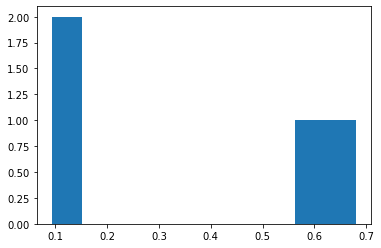

------
KLB
------


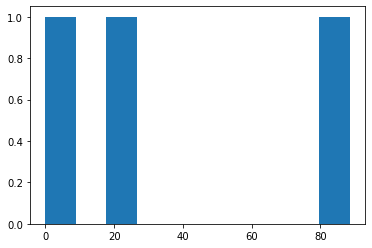

------
lenta_lem_1
------
Количетсво тем: 2
------
Решения: (0, 2)
------
Jaccar
------


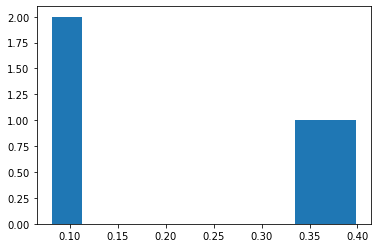

------
KLB
------


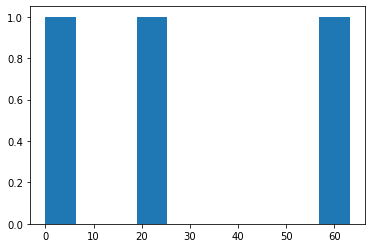

------
lenta_lem_1
------
Количетсво тем: 2
------
Решения: (1, 2)
------
Jaccar
------


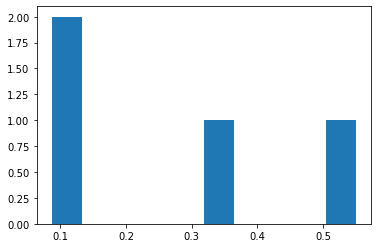

------
KLB
------


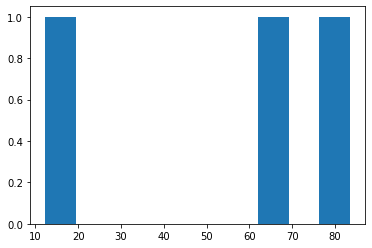

------
lenta_lem_1
------
Количетсво тем: 4
------
Решения: (0, 1)
------
Jaccar
------


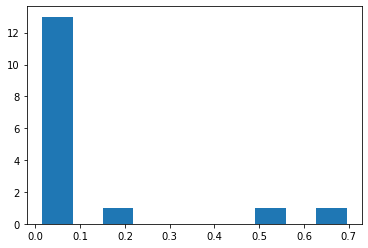

------
KLB
------


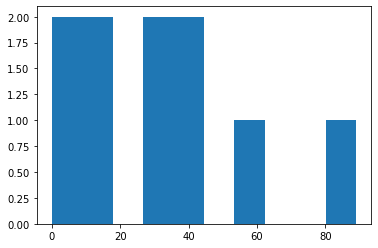

------
lenta_lem_1
------
Количетсво тем: 4
------
Решения: (0, 2)
------
Jaccar
------


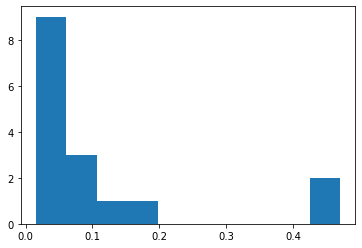

------
KLB
------


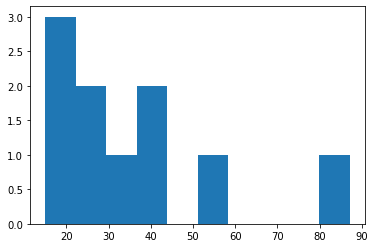

------
lenta_lem_1
------
Количетсво тем: 4
------
Решения: (1, 2)
------
Jaccar
------


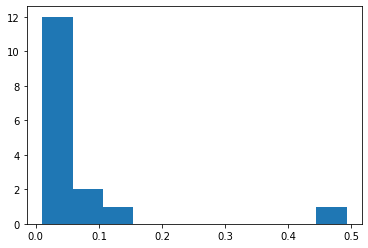

------
KLB
------


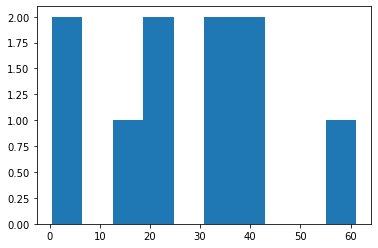

------
lenta_lem_1
------
Количетсво тем: 6
------
Решения: (0, 1)
------
Jaccar
------


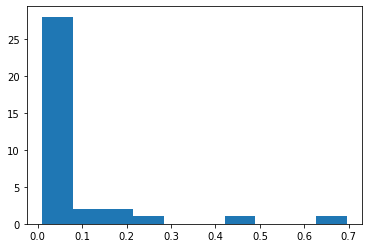

------
KLB
------


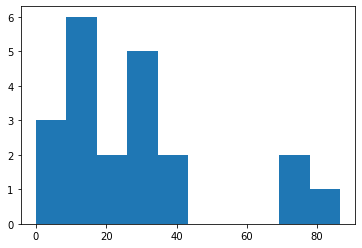

------
lenta_lem_1
------
Количетсво тем: 6
------
Решения: (0, 2)
------
Jaccar
------


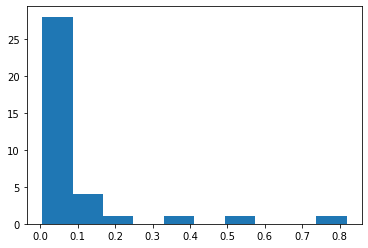

------
KLB
------


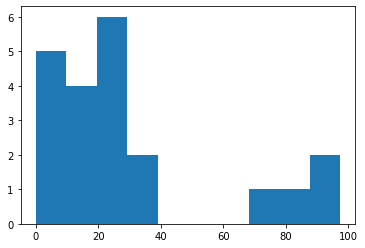

------
lenta_lem_1
------
Количетсво тем: 6
------
Решения: (1, 2)
------
Jaccar
------


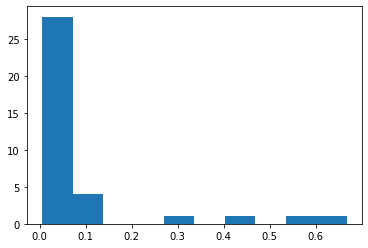

------
KLB
------


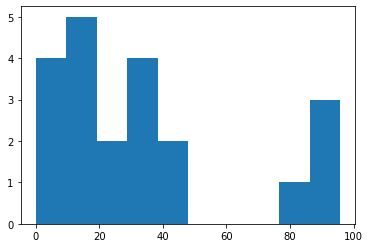

------
lenta_lem_1
------
Количетсво тем: 8
------
Решения: (0, 1)
------
Jaccar
------


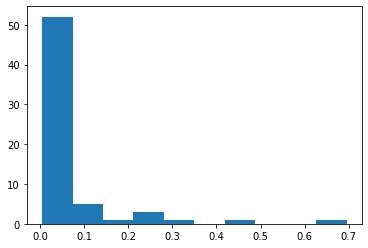

------
KLB
------


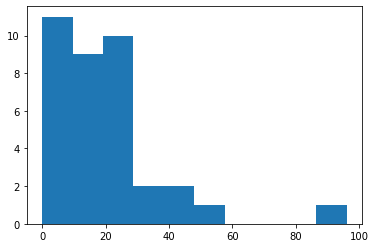

------
lenta_lem_1
------
Количетсво тем: 8
------
Решения: (0, 2)
------
Jaccar
------


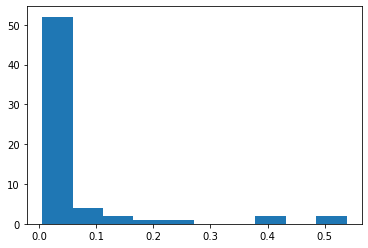

------
KLB
------


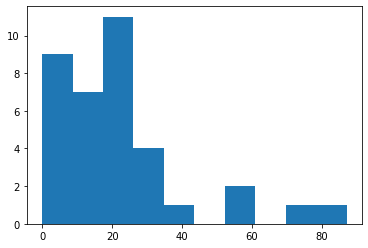

------
lenta_lem_1
------
Количетсво тем: 8
------
Решения: (1, 2)
------
Jaccar
------


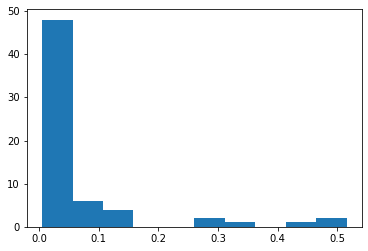

------
KLB
------


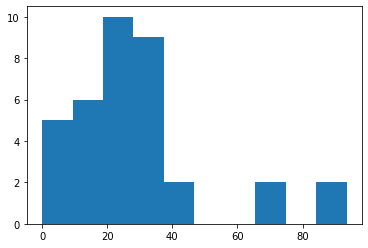

------
lenta_lem_1
------
Количетсво тем: 10
------
Решения: (0, 1)
------
Jaccar
------


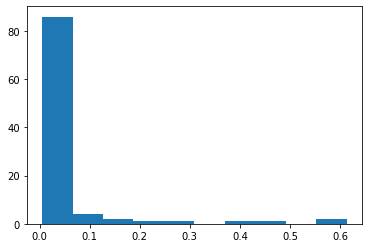

------
KLB
------


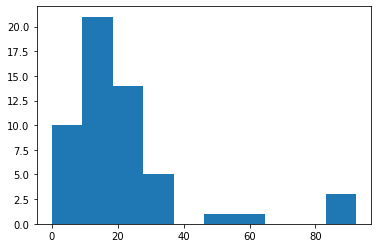

------
lenta_lem_1
------
Количетсво тем: 10
------
Решения: (0, 2)
------
Jaccar
------


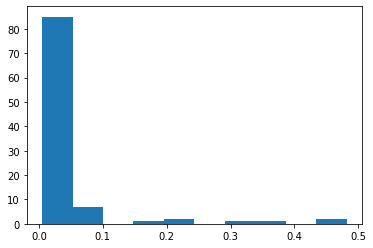

------
KLB
------


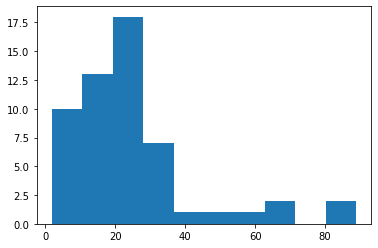

------
lenta_lem_1
------
Количетсво тем: 10
------
Решения: (1, 2)
------
Jaccar
------


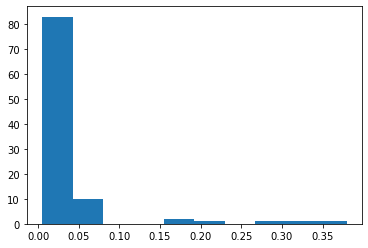

------
KLB
------


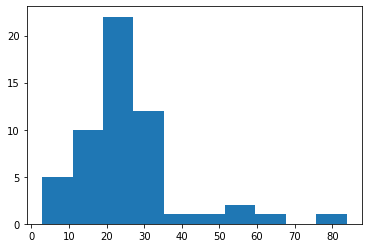

------
lenta_lem_1
------
Количетсво тем: 12
------
Решения: (0, 1)
------
Jaccar
------


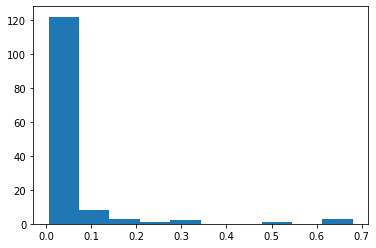

------
KLB
------


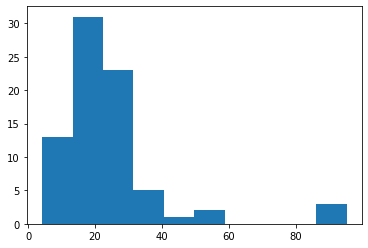

------
lenta_lem_1
------
Количетсво тем: 12
------
Решения: (0, 2)
------
Jaccar
------


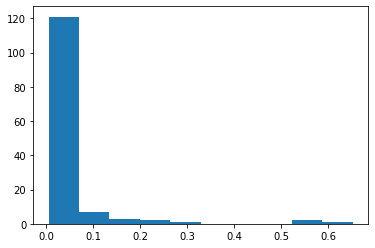

------
KLB
------


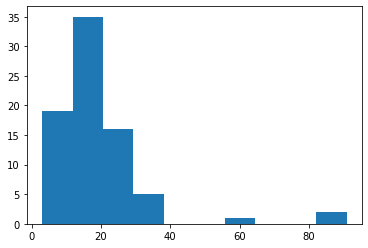

------
lenta_lem_1
------
Количетсво тем: 12
------
Решения: (1, 2)
------
Jaccar
------


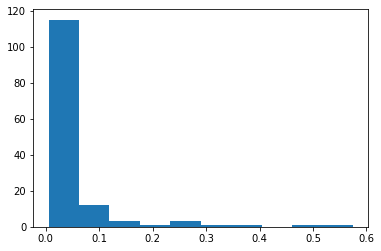

------
KLB
------


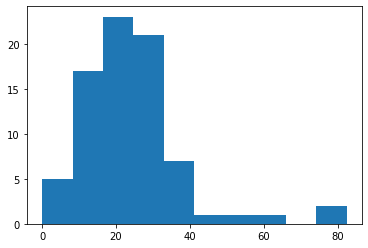

------
lenta_lem_1
------
Количетсво тем: 14
------
Решения: (0, 1)
------
Jaccar
------


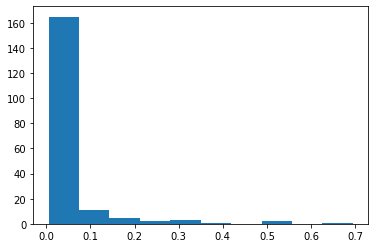

------
KLB
------


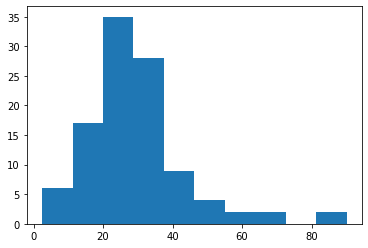

------
lenta_lem_1
------
Количетсво тем: 14
------
Решения: (0, 2)
------
Jaccar
------


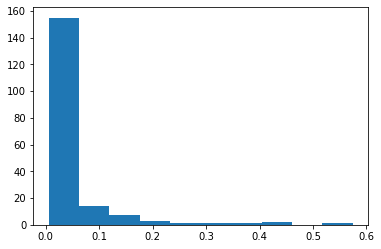

------
KLB
------


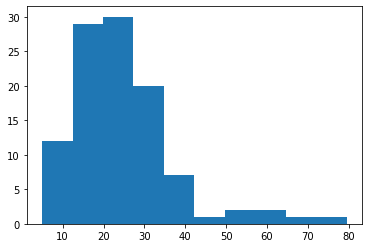

------
lenta_lem_1
------
Количетсво тем: 14
------
Решения: (1, 2)
------
Jaccar
------


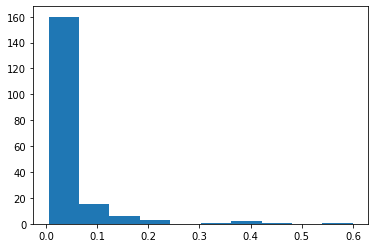

------
KLB
------


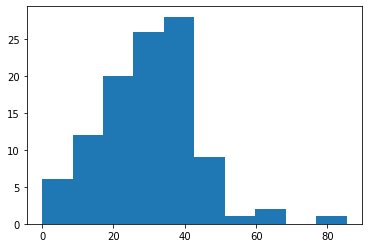

------
lenta_lem_1
------
Количетсво тем: 16
------
Решения: (0, 1)
------
Jaccar
------


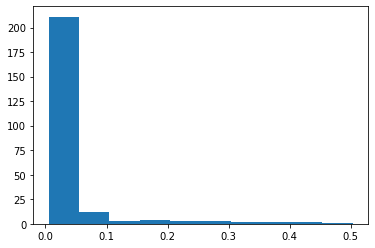

------
KLB
------


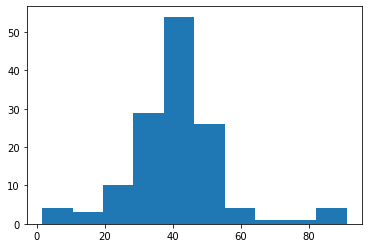

------
lenta_lem_1
------
Количетсво тем: 16
------
Решения: (0, 2)
------
Jaccar
------


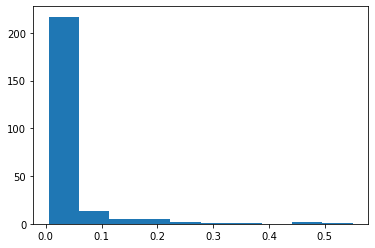

------
KLB
------


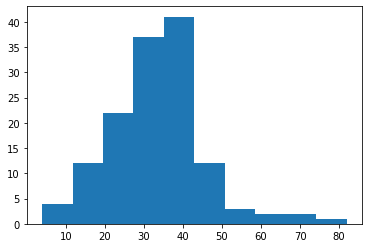

------
lenta_lem_1
------
Количетсво тем: 16
------
Решения: (1, 2)
------
Jaccar
------


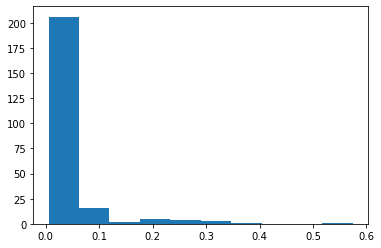

------
KLB
------


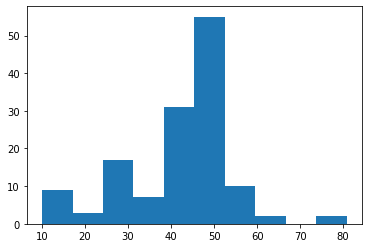

------
lenta_lem_1
------
Количетсво тем: 18
------
Решения: (0, 1)
------
Jaccar
------


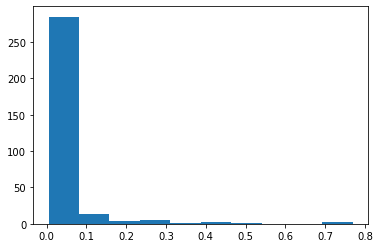

------
KLB
------


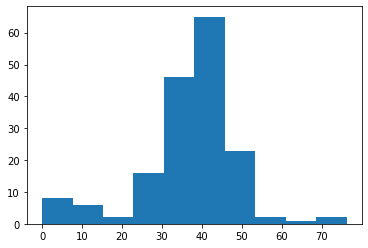

------
lenta_lem_1
------
Количетсво тем: 18
------
Решения: (0, 2)
------
Jaccar
------


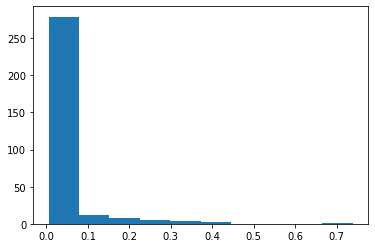

------
KLB
------


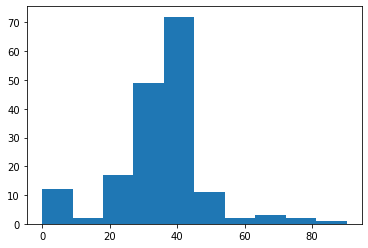

------
lenta_lem_1
------
Количетсво тем: 18
------
Решения: (1, 2)
------
Jaccar
------


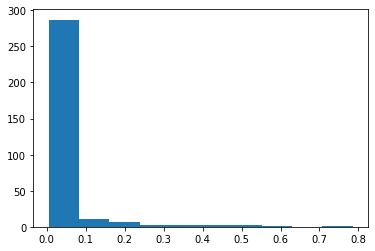

------
KLB
------


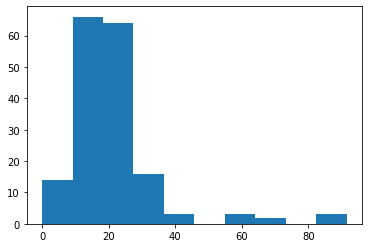

------
lenta_lem_1
------
Количетсво тем: 20
------
Решения: (0, 1)
------
Jaccar
------


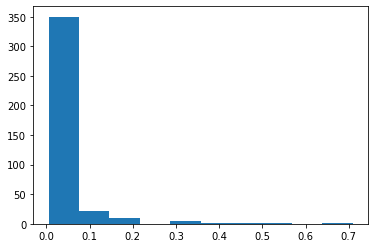

------
KLB
------


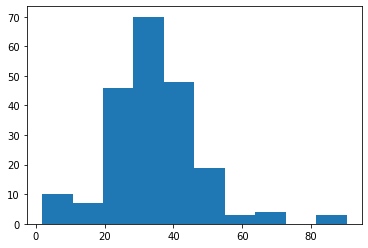

------
lenta_lem_1
------
Количетсво тем: 20
------
Решения: (0, 2)
------
Jaccar
------


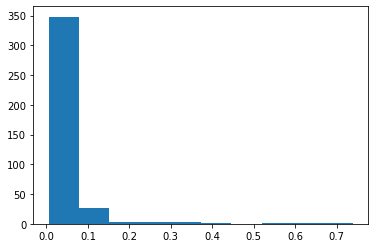

------
KLB
------


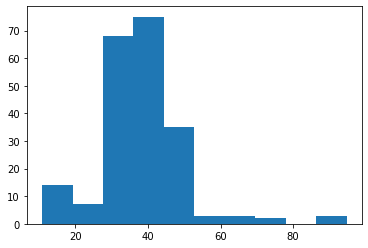

------
lenta_lem_1
------
Количетсво тем: 20
------
Решения: (1, 2)
------
Jaccar
------


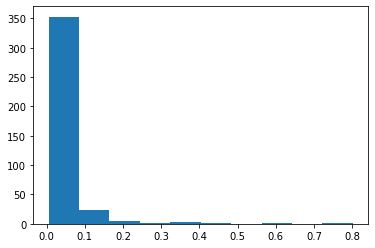

------
KLB
------


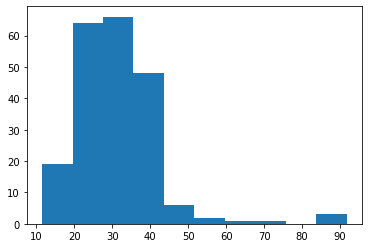

------
lenta_lem_1
------
Количетсво тем: 22
------
Решения: (0, 1)
------
Jaccar
------


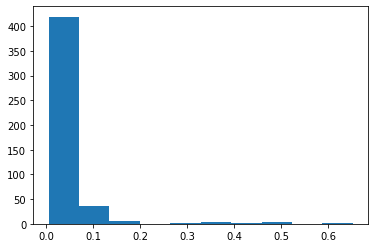

------
KLB
------


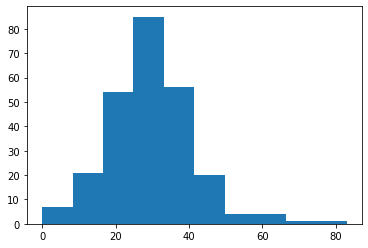

------
lenta_lem_1
------
Количетсво тем: 22
------
Решения: (0, 2)
------
Jaccar
------


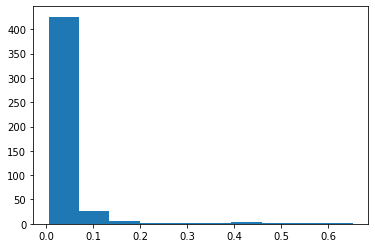

------
KLB
------


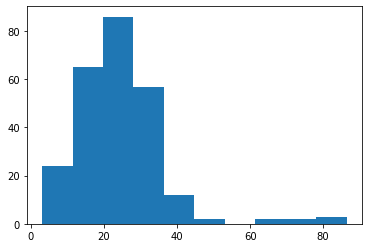

------
lenta_lem_1
------
Количетсво тем: 22
------
Решения: (1, 2)
------
Jaccar
------


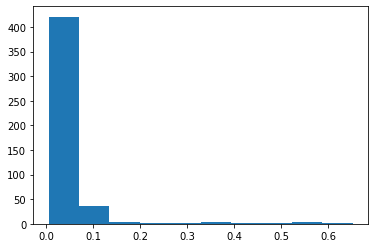

------
KLB
------


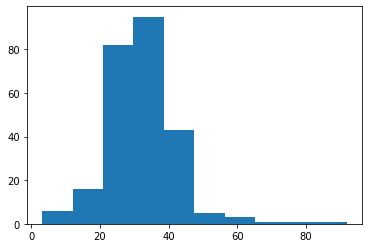

------
lenta_lem_1
------
Количетсво тем: 24
------
Решения: (0, 1)
------
Jaccar
------


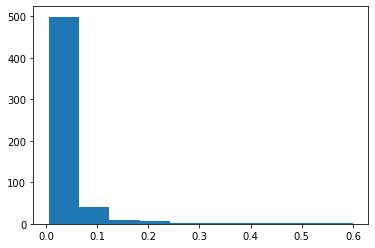

------
KLB
------


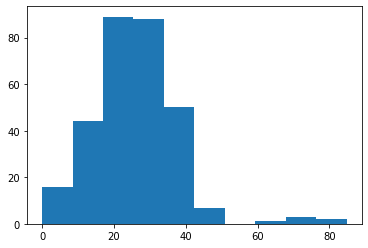

------
lenta_lem_1
------
Количетсво тем: 24
------
Решения: (0, 2)
------
Jaccar
------


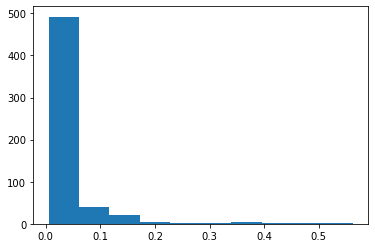

------
KLB
------


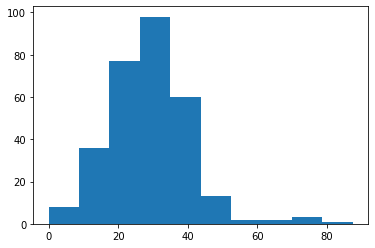

------
lenta_lem_1
------
Количетсво тем: 24
------
Решения: (1, 2)
------
Jaccar
------


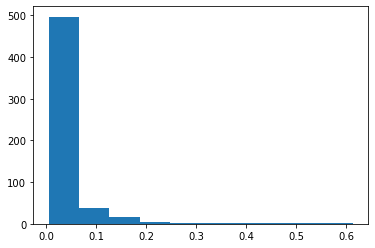

------
KLB
------


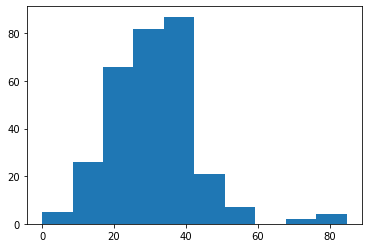

------
lenta_lem_1
------
Количетсво тем: 26
------
Решения: (0, 1)
------
Jaccar
------


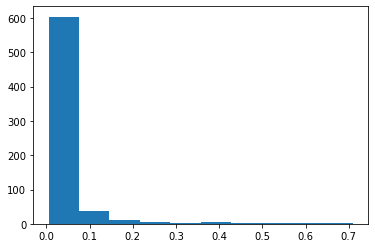

------
KLB
------


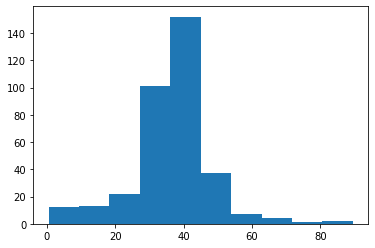

------
lenta_lem_1
------
Количетсво тем: 26
------
Решения: (0, 2)
------
Jaccar
------


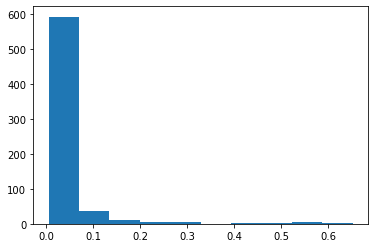

------
KLB
------


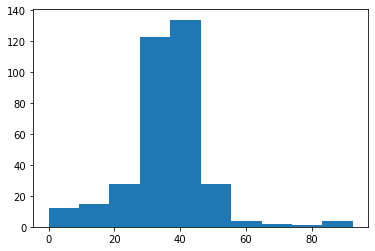

------
lenta_lem_1
------
Количетсво тем: 26
------
Решения: (1, 2)
------
Jaccar
------


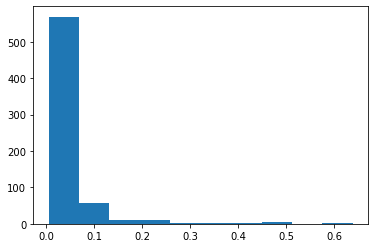

------
KLB
------


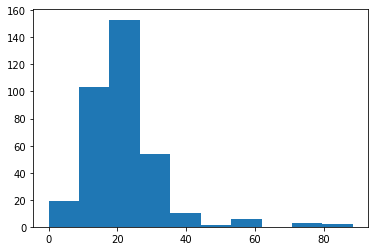

------
lenta_lem_1
------
Количетсво тем: 28
------
Решения: (0, 1)
------
Jaccar
------


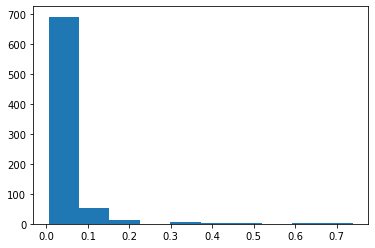

------
KLB
------


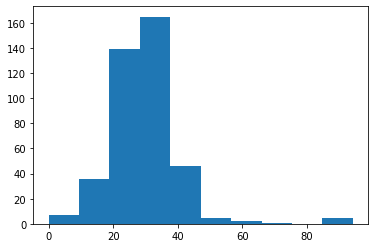

------
lenta_lem_1
------
Количетсво тем: 28
------
Решения: (0, 2)
------
Jaccar
------


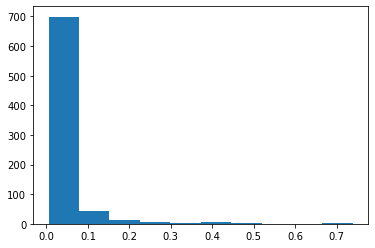

------
KLB
------


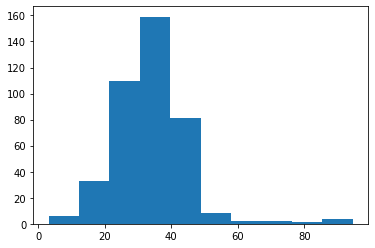

------
lenta_lem_1
------
Количетсво тем: 28
------
Решения: (1, 2)
------
Jaccar
------


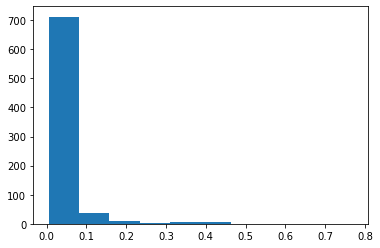

------
KLB
------


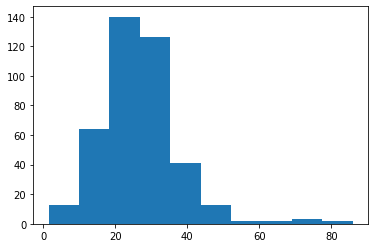

------
lenta_lem_1
------
Количетсво тем: 30
------
Решения: (0, 1)
------
Jaccar
------


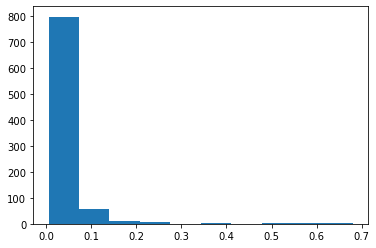

------
KLB
------


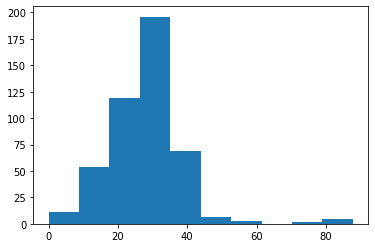

------
lenta_lem_1
------
Количетсво тем: 30
------
Решения: (0, 2)
------
Jaccar
------


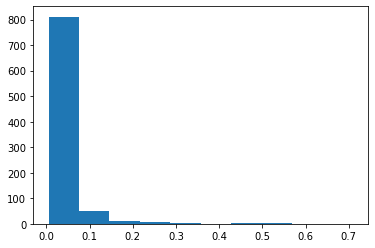

------
KLB
------


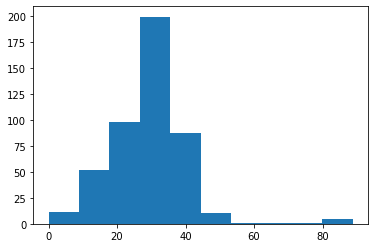

------
lenta_lem_1
------
Количетсво тем: 30
------
Решения: (1, 2)
------
Jaccar
------


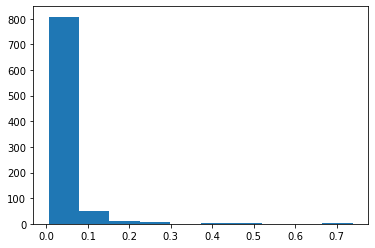

------
KLB
------


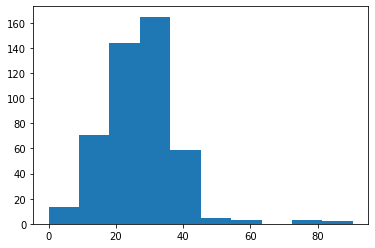

------
lenta_lem_1
------
Количетсво тем: 32
------
Решения: (0, 1)
------
Jaccar
------


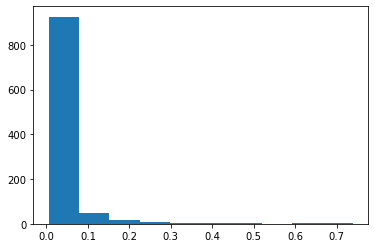

------
KLB
------


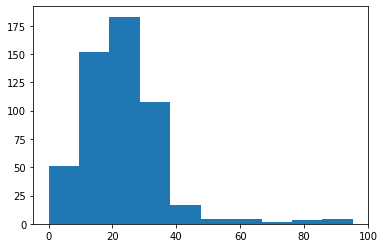

------
lenta_lem_1
------
Количетсво тем: 32
------
Решения: (0, 2)
------
Jaccar
------


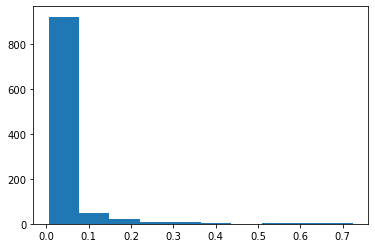

------
KLB
------


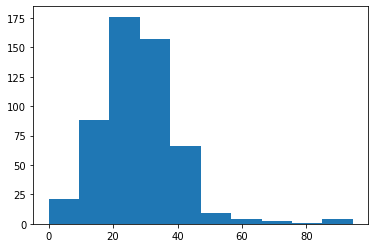

------
lenta_lem_1
------
Количетсво тем: 32
------
Решения: (1, 2)
------
Jaccar
------


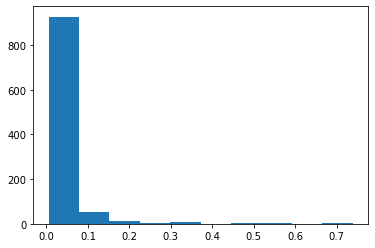

------
KLB
------


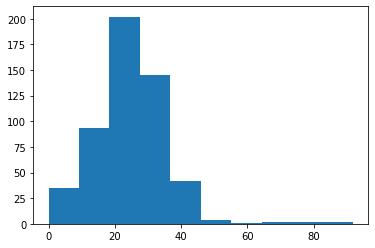

------
lenta_lem_1
------
Количетсво тем: 34
------
Решения: (0, 1)
------
Jaccar
------


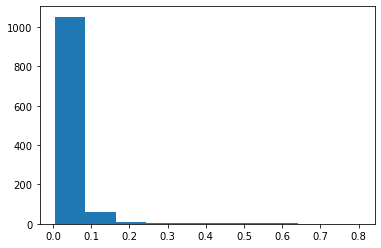

------
KLB
------


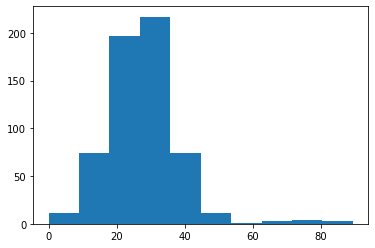

------
lenta_lem_1
------
Количетсво тем: 34
------
Решения: (0, 2)
------
Jaccar
------


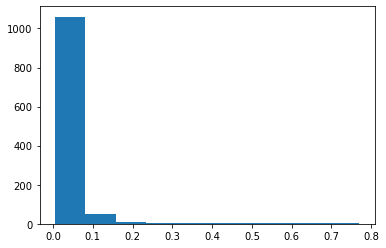

------
KLB
------


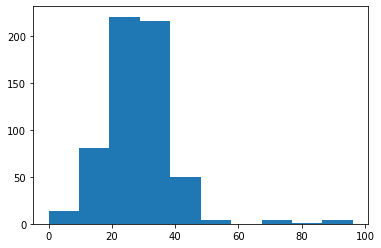

------
lenta_lem_1
------
Количетсво тем: 34
------
Решения: (1, 2)
------
Jaccar
------


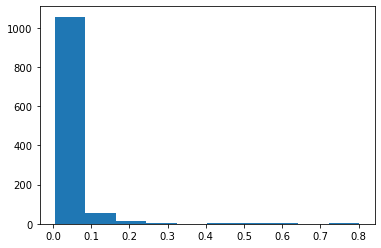

------
KLB
------


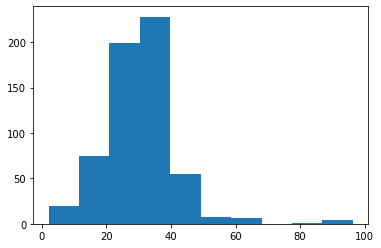

------
lenta_lem_1
------
Количетсво тем: 36
------
Решения: (0, 1)
------
Jaccar
------


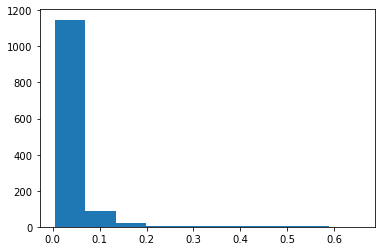

------
KLB
------


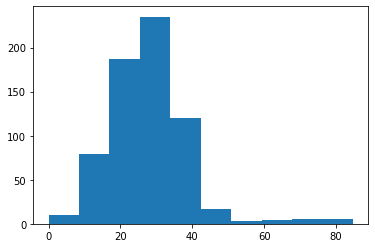

------
lenta_lem_1
------
Количетсво тем: 36
------
Решения: (0, 2)
------
Jaccar
------


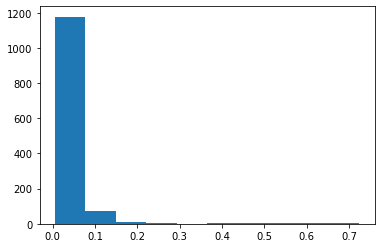

------
KLB
------


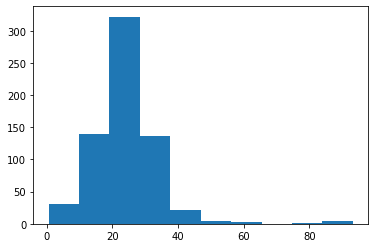

------
lenta_lem_1
------
Количетсво тем: 36
------
Решения: (1, 2)
------
Jaccar
------


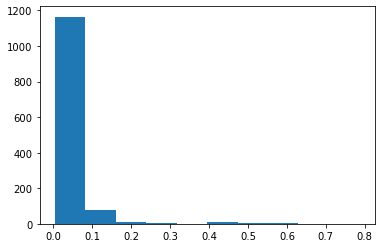

------
KLB
------


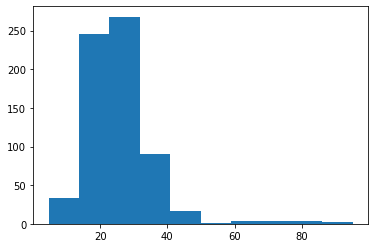

------
lenta_lem_1
------
Количетсво тем: 38
------
Решения: (0, 1)
------
Jaccar
------


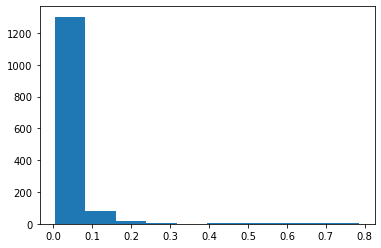

------
KLB
------


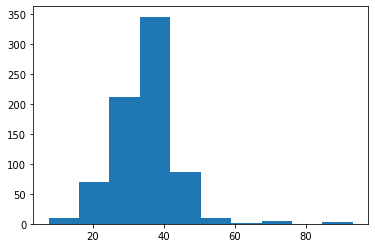

------
lenta_lem_1
------
Количетсво тем: 38
------
Решения: (0, 2)
------
Jaccar
------


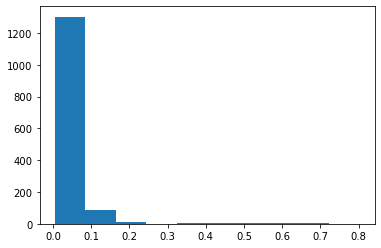

------
KLB
------


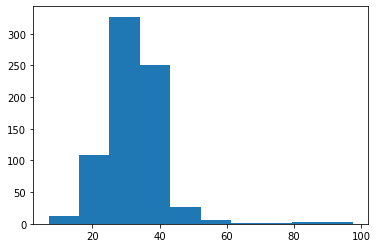

------
lenta_lem_1
------
Количетсво тем: 38
------
Решения: (1, 2)
------
Jaccar
------


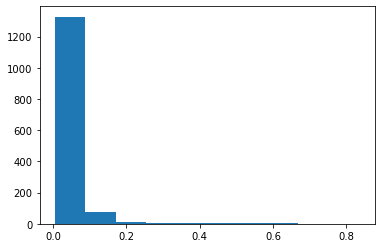

------
KLB
------


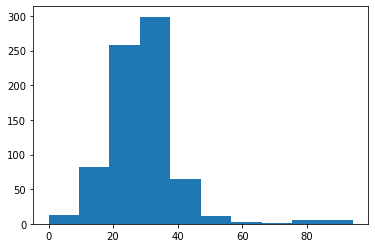

------
lenta_lem_1
------
Количетсво тем: 40
------
Решения: (0, 1)
------
Jaccar
------


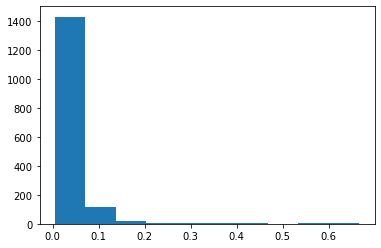

------
KLB
------


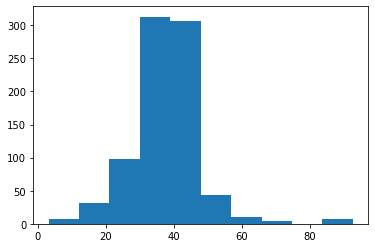

------
lenta_lem_1
------
Количетсво тем: 40
------
Решения: (0, 2)
------
Jaccar
------


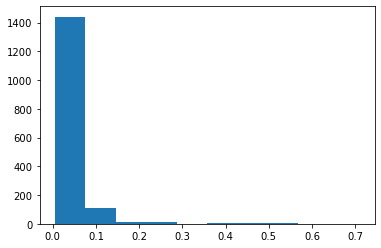

------
KLB
------


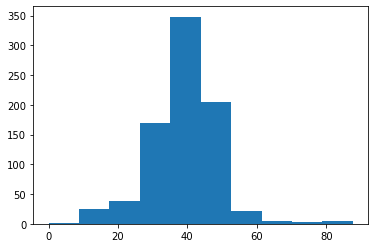

------
lenta_lem_1
------
Количетсво тем: 40
------
Решения: (1, 2)
------
Jaccar
------


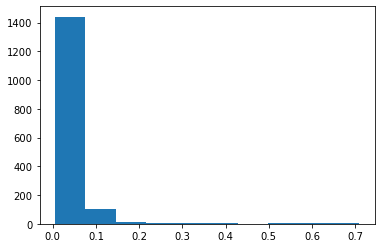

------
KLB
------


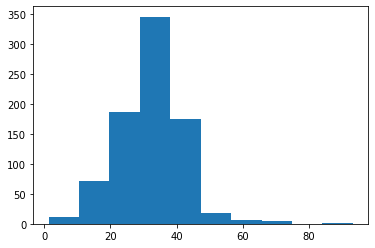

------
lenta_lem_1
------
Количетсво тем: 42
------
Решения: (0, 1)
------
Jaccar
------


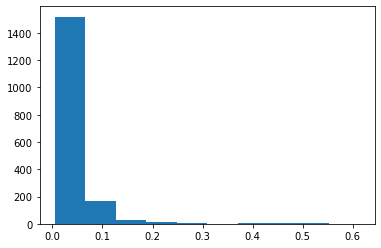

------
KLB
------


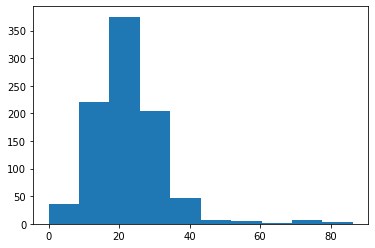

------
lenta_lem_1
------
Количетсво тем: 42
------
Решения: (0, 2)
------
Jaccar
------


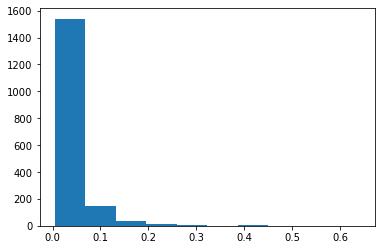

------
KLB
------


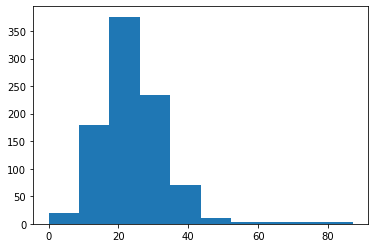

------
lenta_lem_1
------
Количетсво тем: 42
------
Решения: (1, 2)
------
Jaccar
------


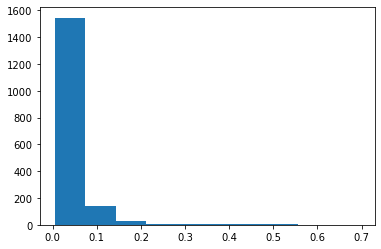

------
KLB
------


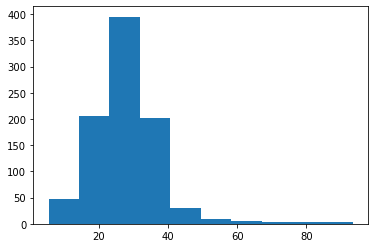

------
lenta_lem_1
------
Количетсво тем: 44
------
Решения: (0, 1)
------
Jaccar
------


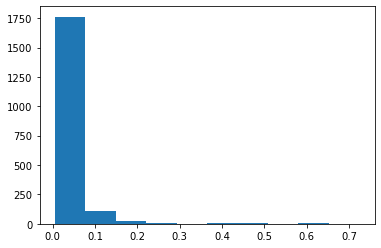

------
KLB
------


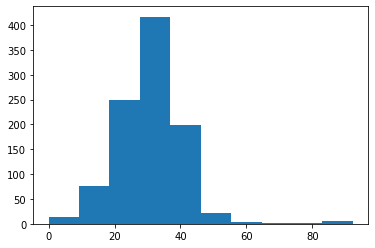

------
lenta_lem_1
------
Количетсво тем: 44
------
Решения: (0, 2)
------
Jaccar
------


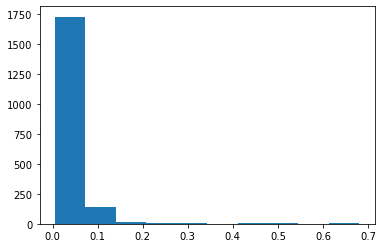

------
KLB
------


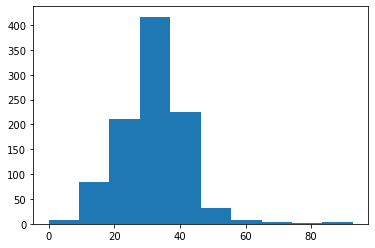

------
lenta_lem_1
------
Количетсво тем: 44
------
Решения: (1, 2)
------
Jaccar
------


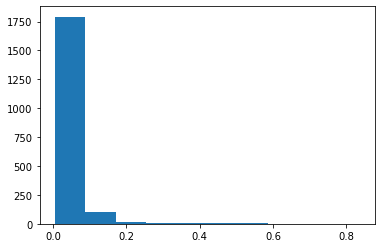

------
KLB
------


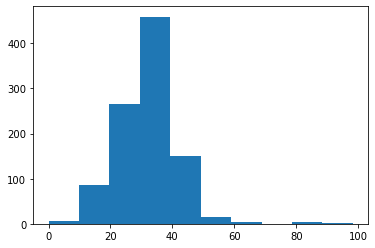

------
lenta_lem_1
------
Количетсво тем: 46
------
Решения: (0, 1)
------
Jaccar
------


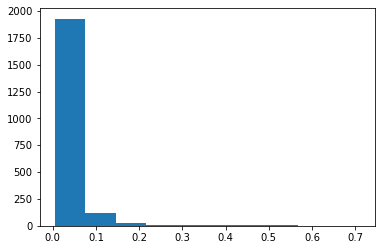

------
KLB
------


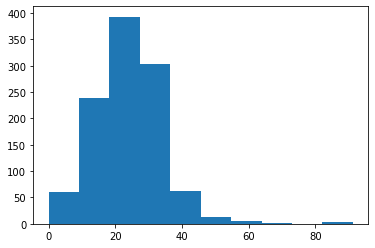

------
lenta_lem_1
------
Количетсво тем: 46
------
Решения: (0, 2)
------
Jaccar
------


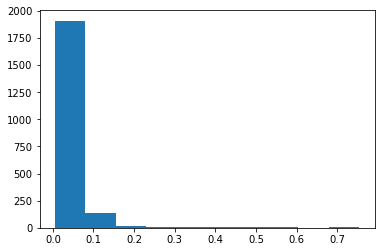

------
KLB
------


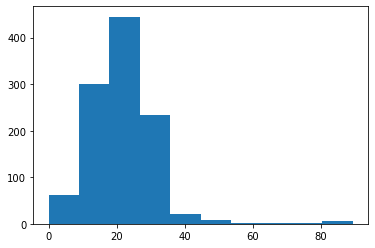

------
lenta_lem_1
------
Количетсво тем: 46
------
Решения: (1, 2)
------
Jaccar
------


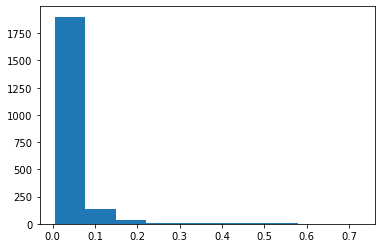

------
KLB
------


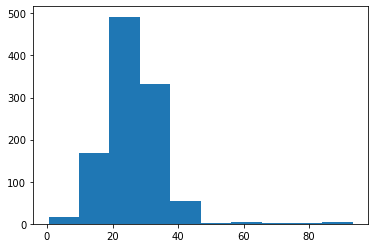

------
lenta_lem_1
------
Количетсво тем: 48
------
Решения: (0, 1)
------
Jaccar
------


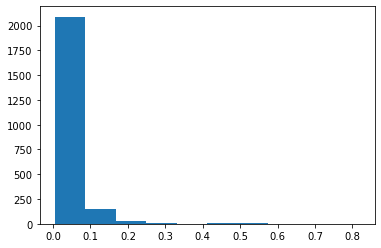

------
KLB
------


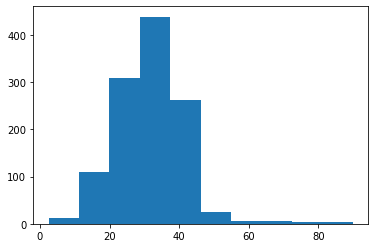

------
lenta_lem_1
------
Количетсво тем: 48
------
Решения: (0, 2)
------
Jaccar
------


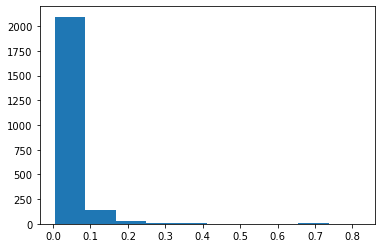

------
KLB
------


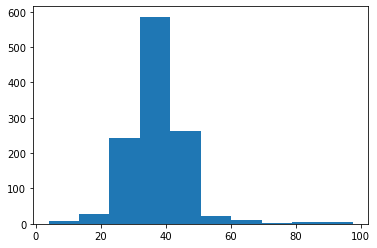

------
lenta_lem_1
------
Количетсво тем: 48
------
Решения: (1, 2)
------
Jaccar
------


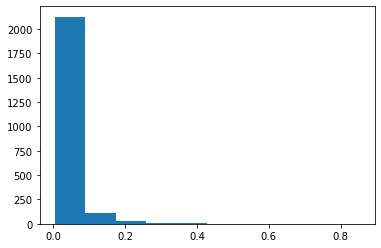

------
KLB
------


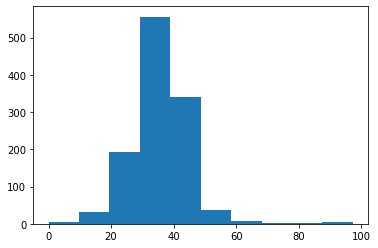

------
Processed 17300 documents.
lenta_lem_2
------
Количетсво тем: 2
------
Решения: (0, 1)
------
Jaccar
------


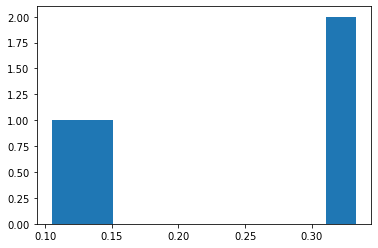

------
KLB
------


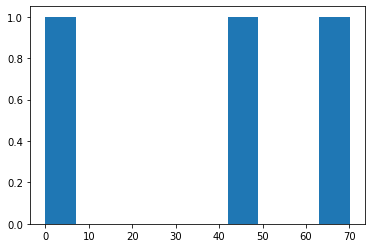

------
lenta_lem_2
------
Количетсво тем: 2
------
Решения: (0, 2)
------
Jaccar
------


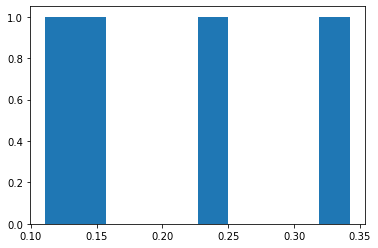

------
KLB
------


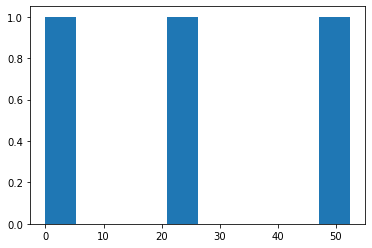

------
lenta_lem_2
------
Количетсво тем: 2
------
Решения: (1, 2)
------
Jaccar
------


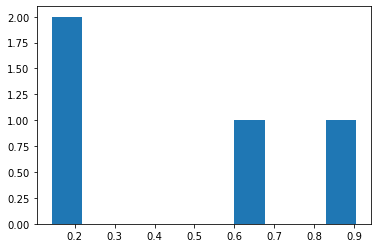

------
KLB
------


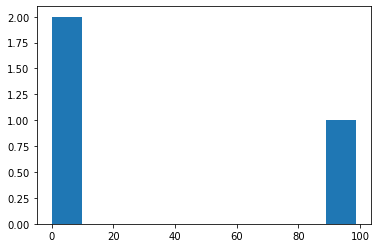

------
lenta_lem_2
------
Количетсво тем: 4
------
Решения: (0, 1)
------
Jaccar
------


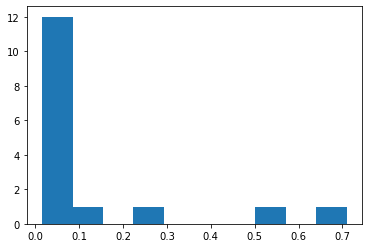

------
KLB
------


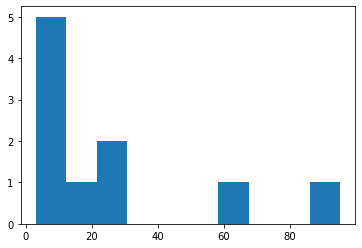

------
lenta_lem_2
------
Количетсво тем: 4
------
Решения: (0, 2)
------
Jaccar
------


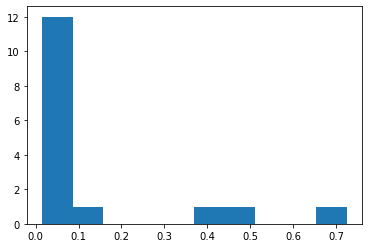

------
KLB
------


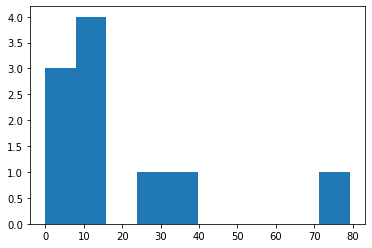

------
lenta_lem_2
------
Количетсво тем: 4
------
Решения: (1, 2)
------
Jaccar
------


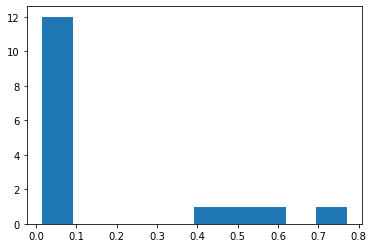

------
KLB
------


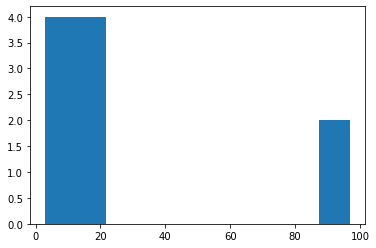

------
lenta_lem_2
------
Количетсво тем: 6
------
Решения: (0, 1)
------
Jaccar
------


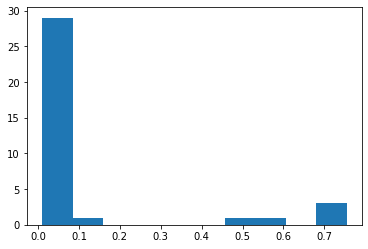

------
KLB
------


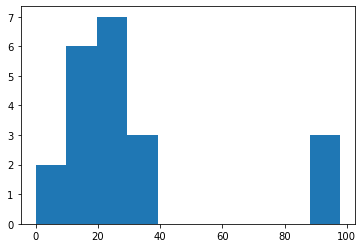

------
lenta_lem_2
------
Количетсво тем: 6
------
Решения: (0, 2)
------
Jaccar
------


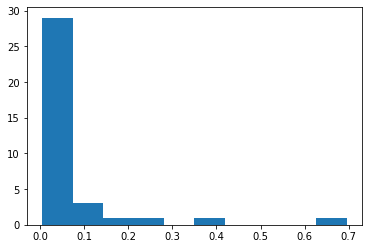

------
KLB
------


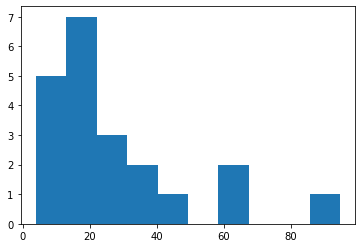

------
lenta_lem_2
------
Количетсво тем: 6
------
Решения: (1, 2)
------
Jaccar
------


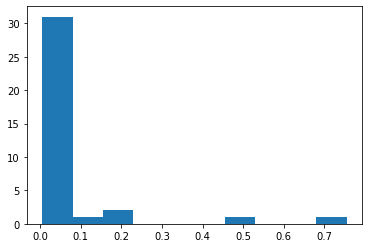

------
KLB
------


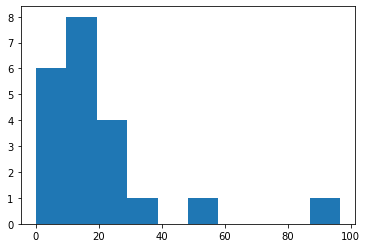

------
lenta_lem_2
------
Количетсво тем: 8
------
Решения: (0, 1)
------
Jaccar
------


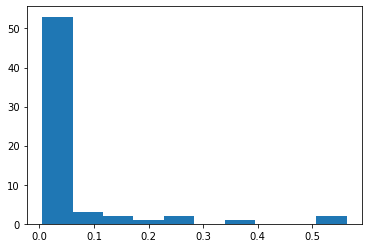

------
KLB
------


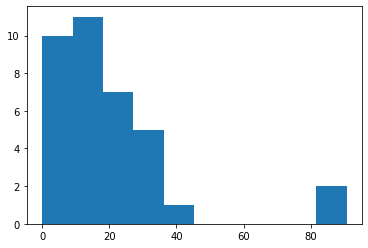

------
lenta_lem_2
------
Количетсво тем: 8
------
Решения: (0, 2)
------
Jaccar
------


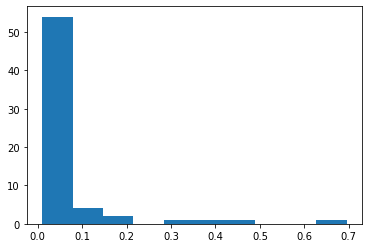

------
KLB
------


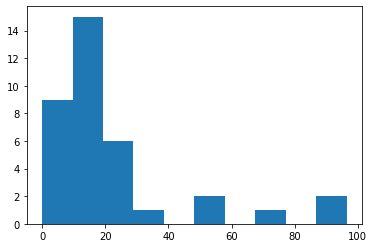

------
lenta_lem_2
------
Количетсво тем: 8
------
Решения: (1, 2)
------
Jaccar
------


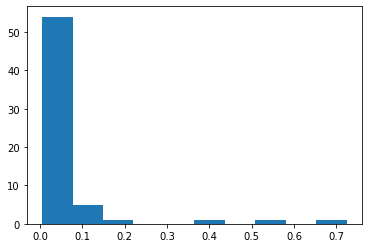

------
KLB
------


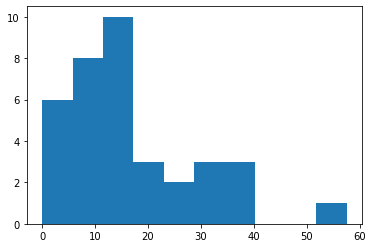

------
lenta_lem_2
------
Количетсво тем: 10
------
Решения: (0, 1)
------
Jaccar
------


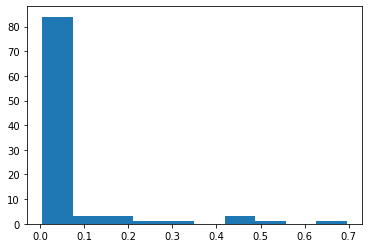

------
KLB
------


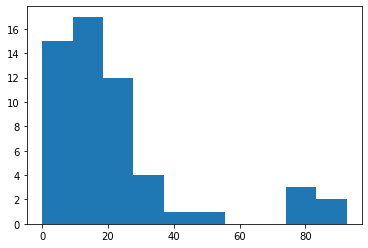

------
lenta_lem_2
------
Количетсво тем: 10
------
Решения: (0, 2)
------
Jaccar
------


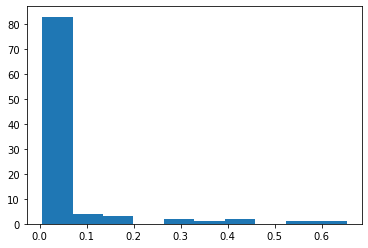

------
KLB
------


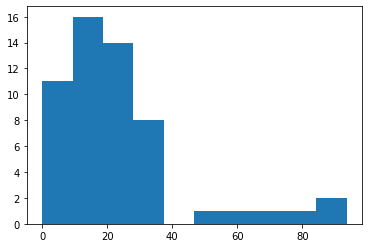

------
lenta_lem_2
------
Количетсво тем: 10
------
Решения: (1, 2)
------
Jaccar
------


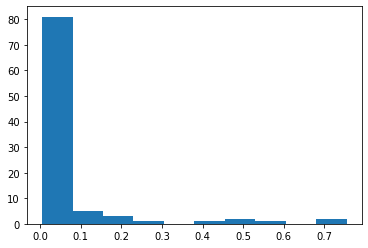

------
KLB
------


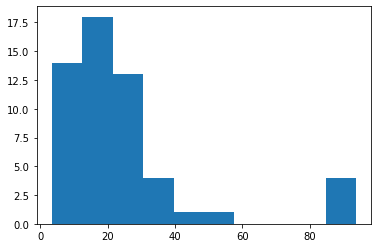

------
lenta_lem_2
------
Количетсво тем: 12
------
Решения: (0, 1)
------
Jaccar
------


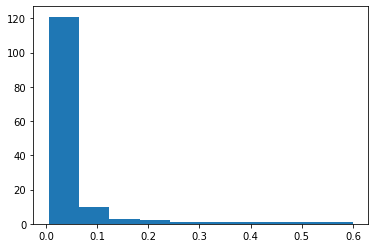

------
KLB
------


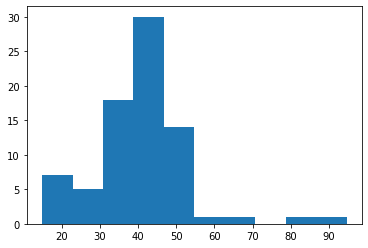

------
lenta_lem_2
------
Количетсво тем: 12
------
Решения: (0, 2)
------
Jaccar
------


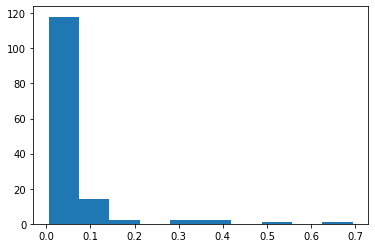

------
KLB
------


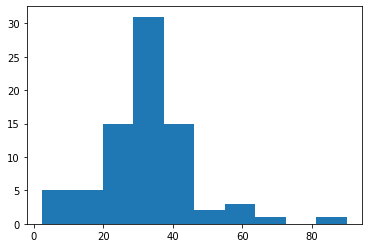

------
lenta_lem_2
------
Количетсво тем: 12
------
Решения: (1, 2)
------
Jaccar
------


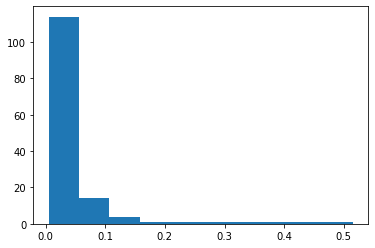

------
KLB
------


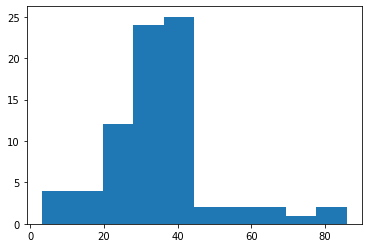

------
lenta_lem_2
------
Количетсво тем: 14
------
Решения: (0, 1)
------
Jaccar
------


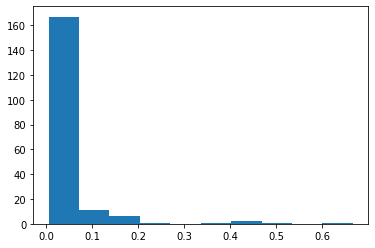

------
KLB
------


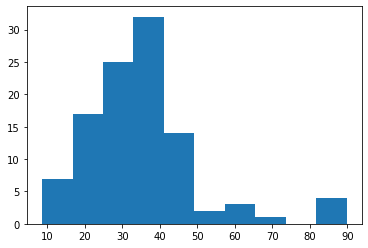

------
lenta_lem_2
------
Количетсво тем: 14
------
Решения: (0, 2)
------
Jaccar
------


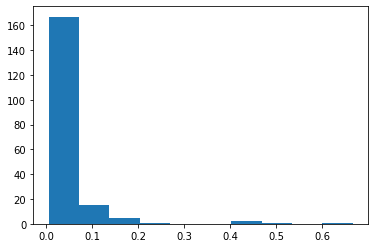

------
KLB
------


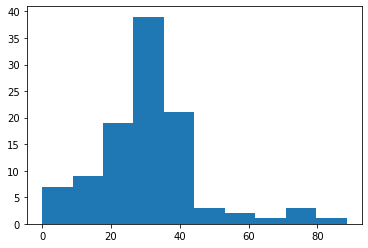

------
lenta_lem_2
------
Количетсво тем: 14
------
Решения: (1, 2)
------
Jaccar
------


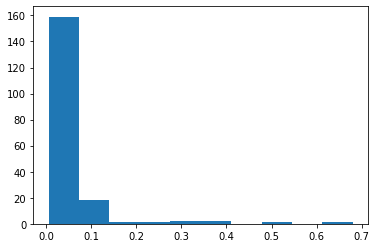

------
KLB
------


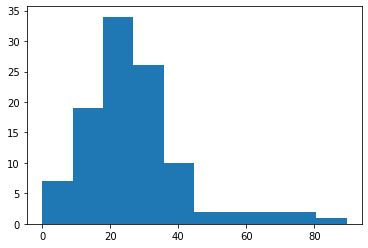

------
lenta_lem_2
------
Количетсво тем: 16
------
Решения: (0, 1)
------
Jaccar
------


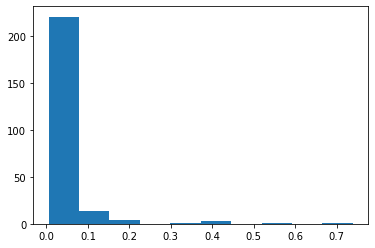

------
KLB
------


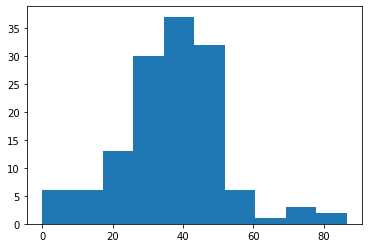

------
lenta_lem_2
------
Количетсво тем: 16
------
Решения: (0, 2)
------
Jaccar
------


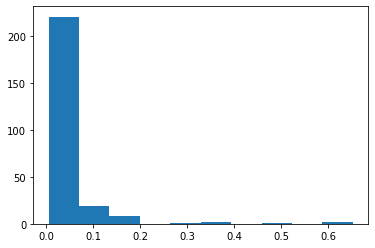

------
KLB
------


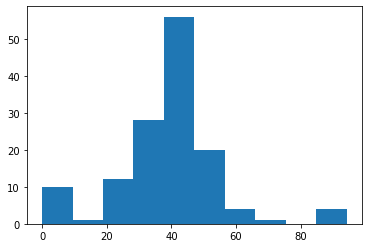

------
lenta_lem_2
------
Количетсво тем: 16
------
Решения: (1, 2)
------
Jaccar
------


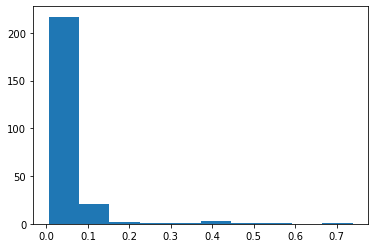

------
KLB
------


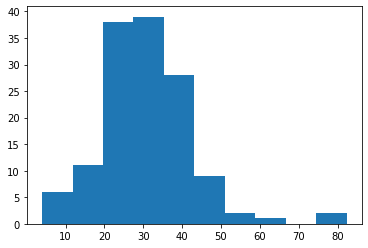

------
lenta_lem_2
------
Количетсво тем: 18
------
Решения: (0, 1)
------
Jaccar
------


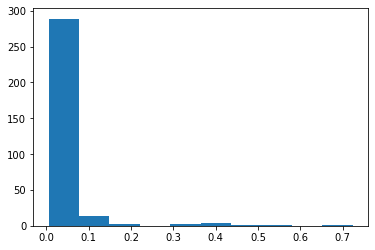

------
KLB
------


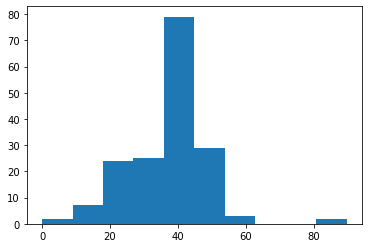

------
lenta_lem_2
------
Количетсво тем: 18
------
Решения: (0, 2)
------
Jaccar
------


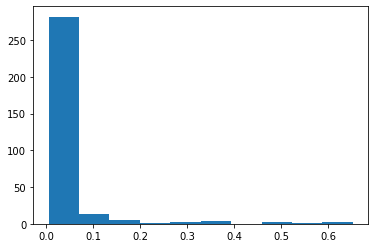

------
KLB
------


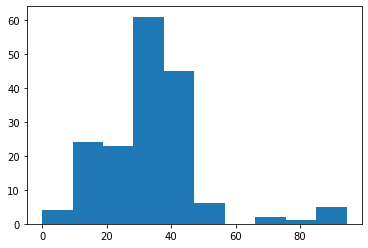

------
lenta_lem_2
------
Количетсво тем: 18
------
Решения: (1, 2)
------
Jaccar
------


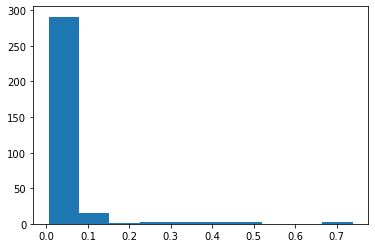

------
KLB
------


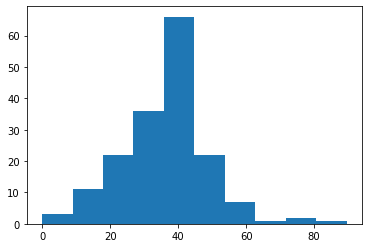

------
lenta_lem_2
------
Количетсво тем: 20
------
Решения: (0, 1)
------
Jaccar
------


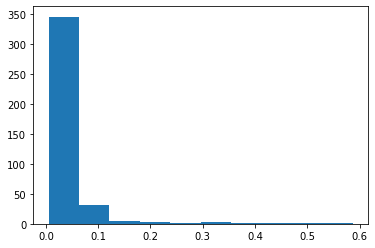

------
KLB
------


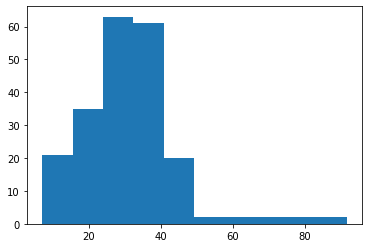

------
lenta_lem_2
------
Количетсво тем: 20
------
Решения: (0, 2)
------
Jaccar
------


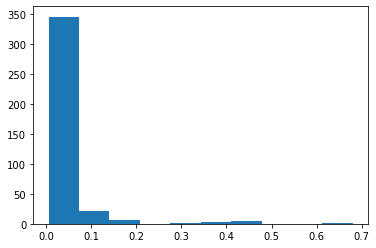

------
KLB
------


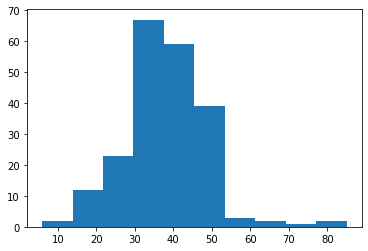

------
lenta_lem_2
------
Количетсво тем: 20
------
Решения: (1, 2)
------
Jaccar
------


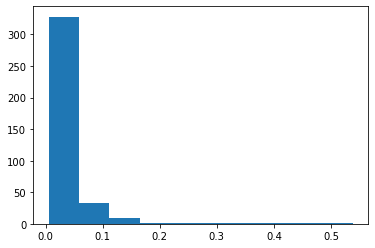

------
KLB
------


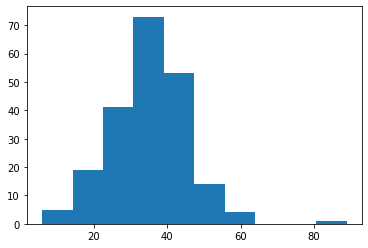

------
lenta_lem_2
------
Количетсво тем: 22
------
Решения: (0, 1)
------
Jaccar
------


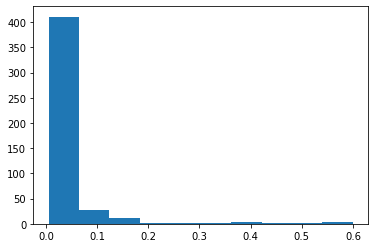

------
KLB
------


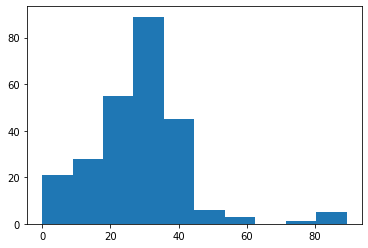

------
lenta_lem_2
------
Количетсво тем: 22
------
Решения: (0, 2)
------
Jaccar
------


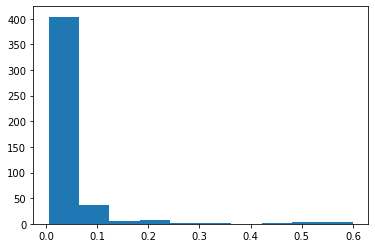

------
KLB
------


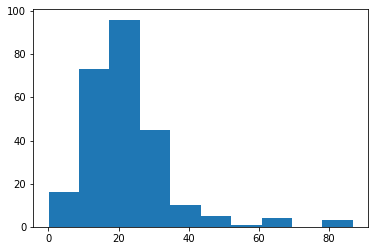

------
lenta_lem_2
------
Количетсво тем: 22
------
Решения: (1, 2)
------
Jaccar
------


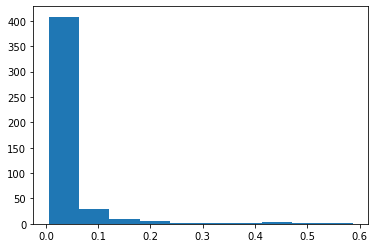

------
KLB
------


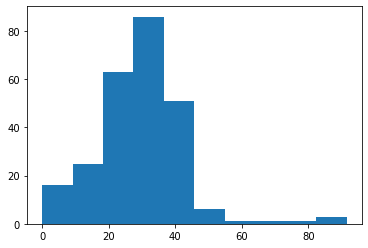

------
lenta_lem_2
------
Количетсво тем: 24
------
Решения: (0, 1)
------
Jaccar
------


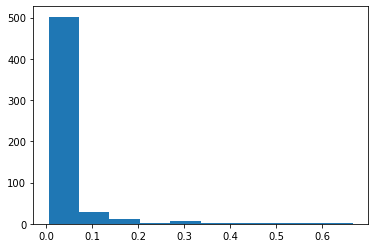

------
KLB
------


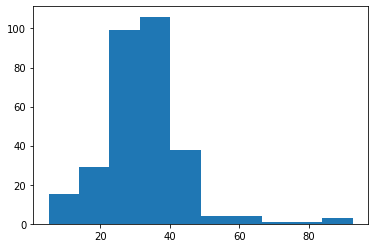

------
lenta_lem_2
------
Количетсво тем: 24
------
Решения: (0, 2)
------
Jaccar
------


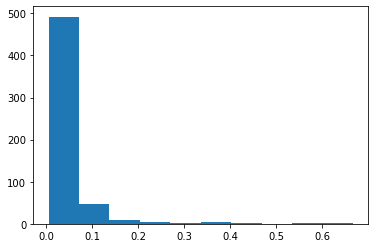

------
KLB
------


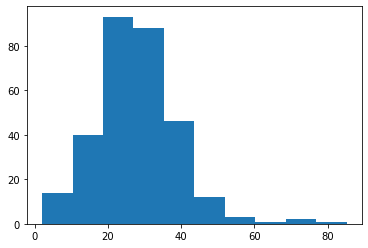

------
lenta_lem_2
------
Количетсво тем: 24
------
Решения: (1, 2)
------
Jaccar
------


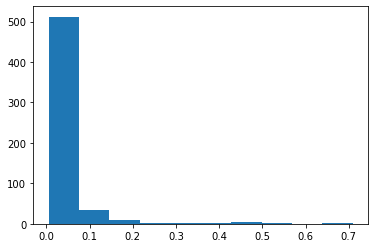

------
KLB
------


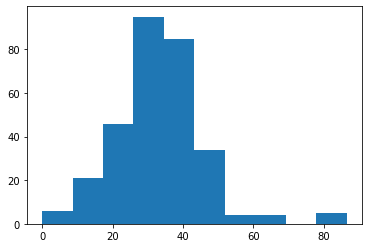

------
lenta_lem_2
------
Количетсво тем: 26
------
Решения: (0, 1)
------
Jaccar
------


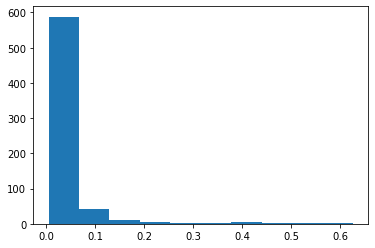

------
KLB
------


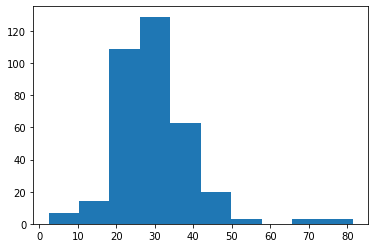

------
lenta_lem_2
------
Количетсво тем: 26
------
Решения: (0, 2)
------
Jaccar
------


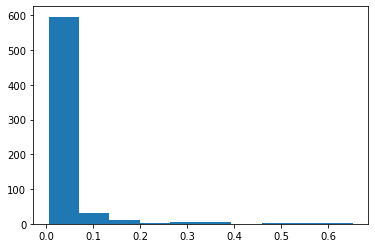

------
KLB
------


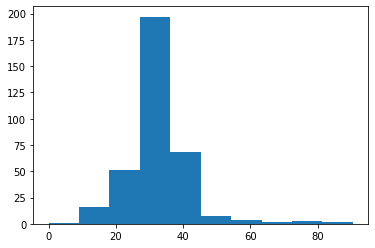

------
lenta_lem_2
------
Количетсво тем: 26
------
Решения: (1, 2)
------
Jaccar
------


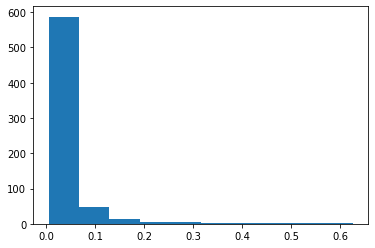

------
KLB
------


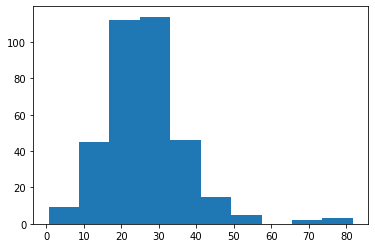

------
lenta_lem_2
------
Количетсво тем: 28
------
Решения: (0, 1)
------
Jaccar
------


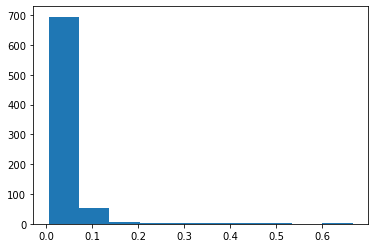

------
KLB
------


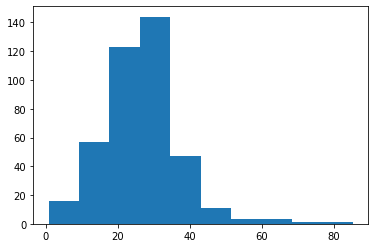

------
lenta_lem_2
------
Количетсво тем: 28
------
Решения: (0, 2)
------
Jaccar
------


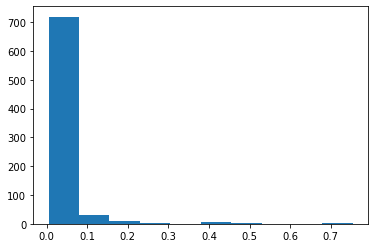

------
KLB
------


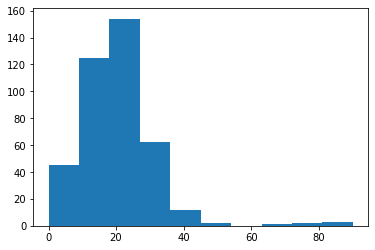

------
lenta_lem_2
------
Количетсво тем: 28
------
Решения: (1, 2)
------
Jaccar
------


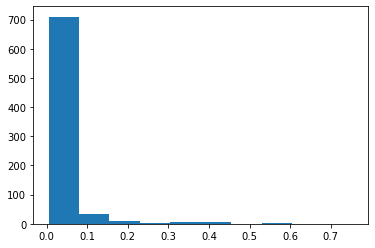

------
KLB
------


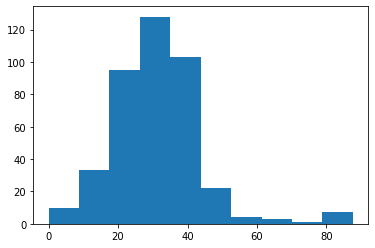

------
lenta_lem_2
------
Количетсво тем: 30
------
Решения: (0, 1)
------
Jaccar
------


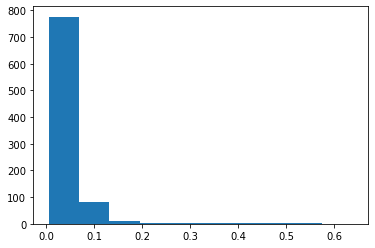

------
KLB
------


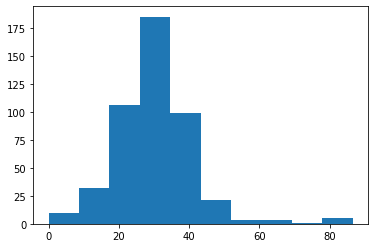

------
lenta_lem_2
------
Количетсво тем: 30
------
Решения: (0, 2)
------
Jaccar
------


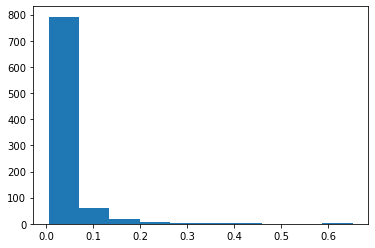

------
KLB
------


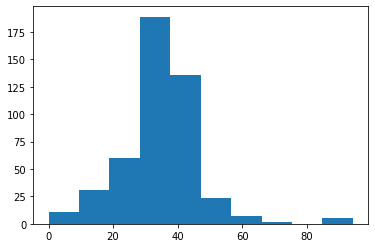

------
lenta_lem_2
------
Количетсво тем: 30
------
Решения: (1, 2)
------
Jaccar
------


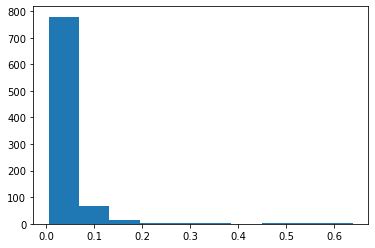

------
KLB
------


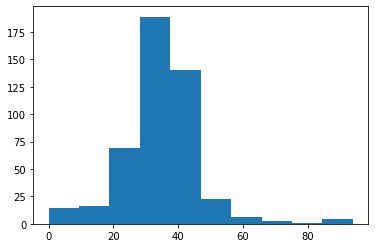

------
lenta_lem_2
------
Количетсво тем: 32
------
Решения: (0, 1)
------
Jaccar
------


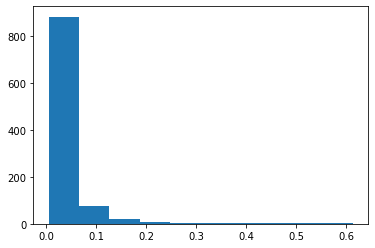

------
KLB
------


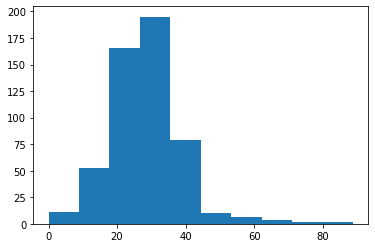

------
lenta_lem_2
------
Количетсво тем: 32
------
Решения: (0, 2)
------
Jaccar
------


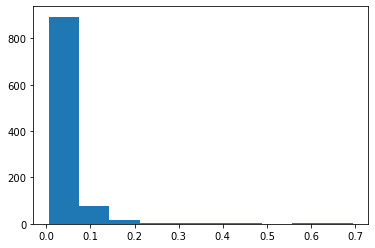

------
KLB
------


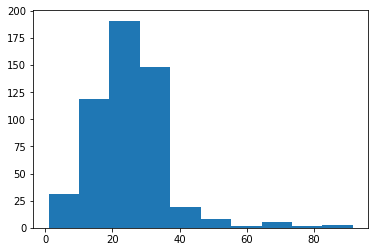

------
lenta_lem_2
------
Количетсво тем: 32
------
Решения: (1, 2)
------
Jaccar
------


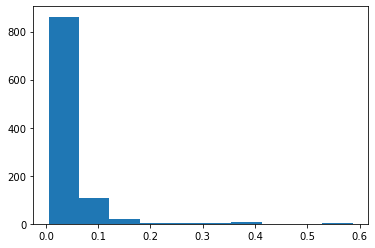

------
KLB
------


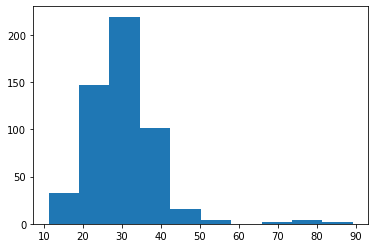

------
lenta_lem_2
------
Количетсво тем: 34
------
Решения: (0, 1)
------
Jaccar
------


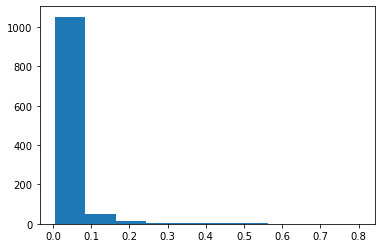

------
KLB
------


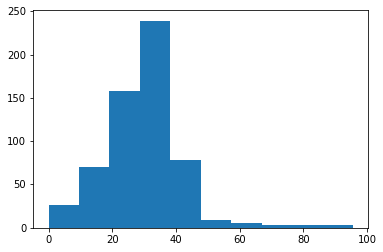

------
lenta_lem_2
------
Количетсво тем: 34
------
Решения: (0, 2)
------
Jaccar
------


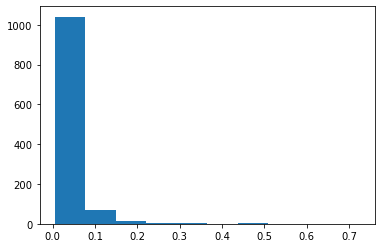

------
KLB
------


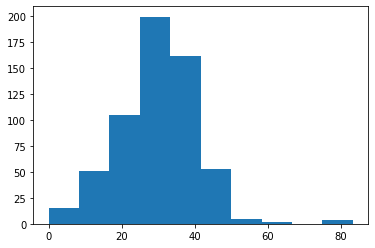

------
lenta_lem_2
------
Количетсво тем: 34
------
Решения: (1, 2)
------
Jaccar
------


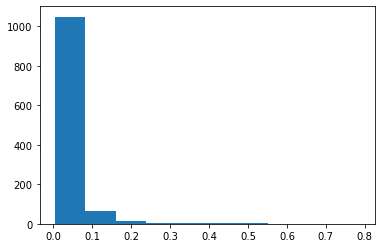

------
KLB
------


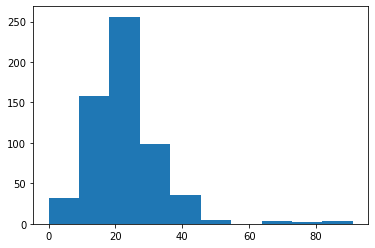

------
lenta_lem_2
------
Количетсво тем: 36
------
Решения: (0, 1)
------
Jaccar
------


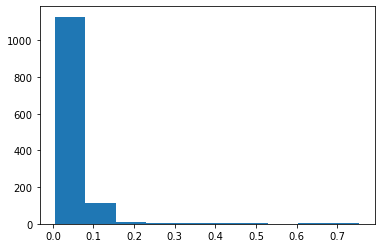

------
KLB
------


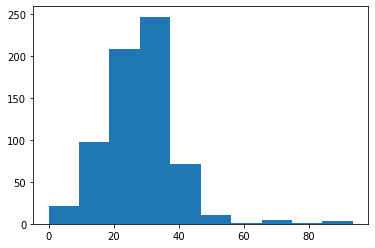

------
lenta_lem_2
------
Количетсво тем: 36
------
Решения: (0, 2)
------
Jaccar
------


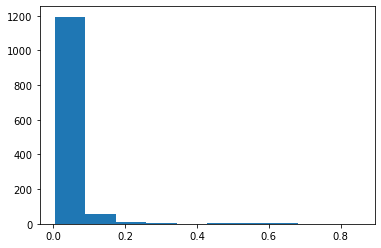

------
KLB
------


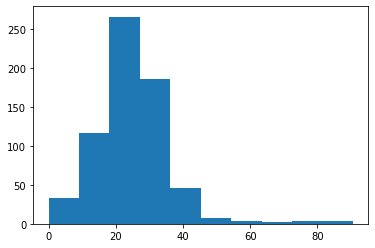

------
lenta_lem_2
------
Количетсво тем: 36
------
Решения: (1, 2)
------
Jaccar
------


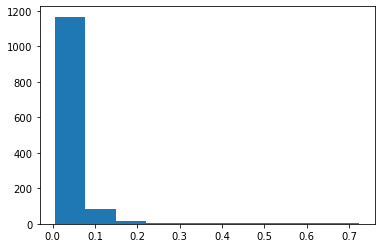

------
KLB
------


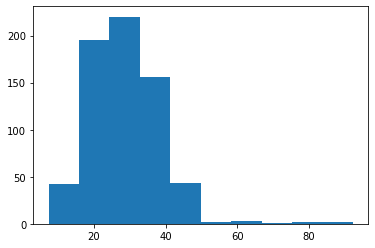

------
lenta_lem_2
------
Количетсво тем: 38
------
Решения: (0, 1)
------
Jaccar
------


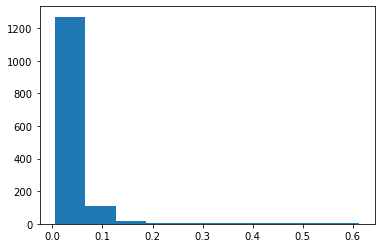

------
KLB
------


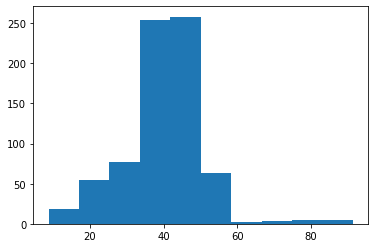

------
lenta_lem_2
------
Количетсво тем: 38
------
Решения: (0, 2)
------
Jaccar
------


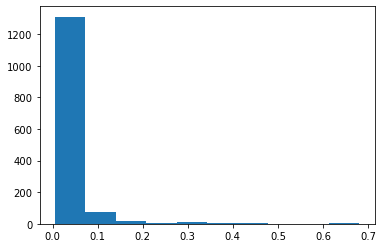

------
KLB
------


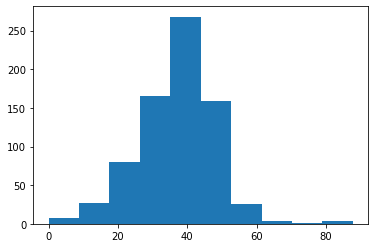

------
lenta_lem_2
------
Количетсво тем: 38
------
Решения: (1, 2)
------
Jaccar
------


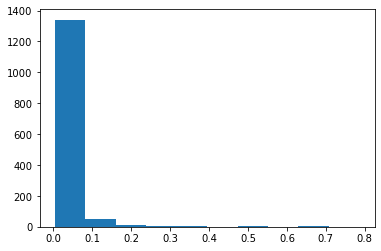

------
KLB
------


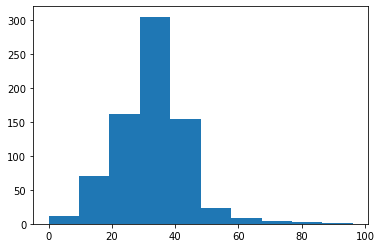

------
lenta_lem_2
------
Количетсво тем: 40
------
Решения: (0, 1)
------
Jaccar
------


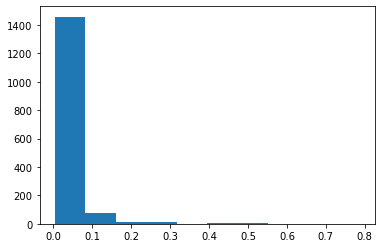

------
KLB
------


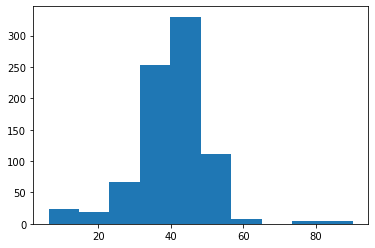

------
lenta_lem_2
------
Количетсво тем: 40
------
Решения: (0, 2)
------
Jaccar
------


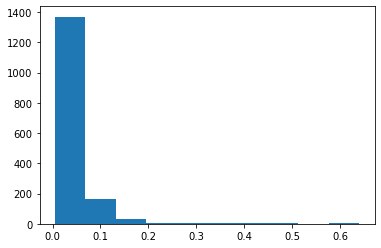

------
KLB
------


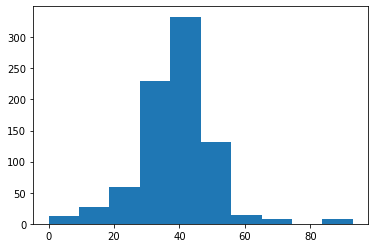

------
lenta_lem_2
------
Количетсво тем: 40
------
Решения: (1, 2)
------
Jaccar
------


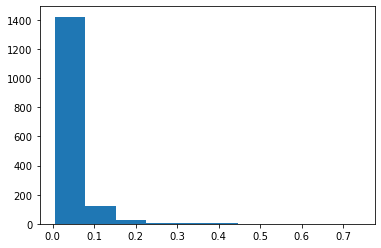

------
KLB
------


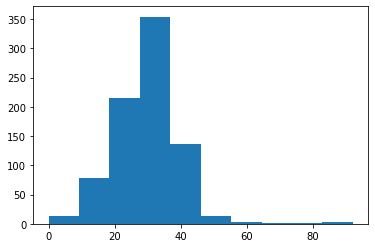

------
lenta_lem_2
------
Количетсво тем: 42
------
Решения: (0, 1)
------
Jaccar
------


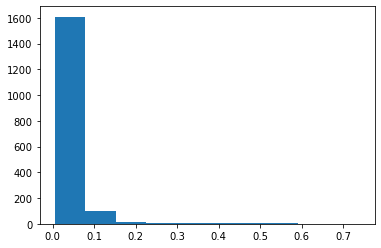

------
KLB
------


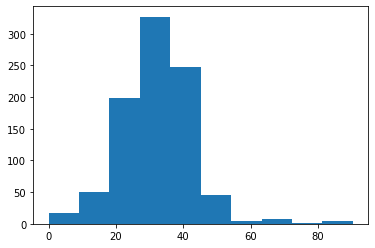

------
lenta_lem_2
------
Количетсво тем: 42
------
Решения: (0, 2)
------
Jaccar
------


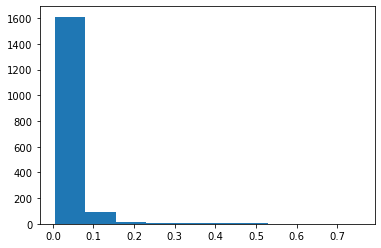

------
KLB
------


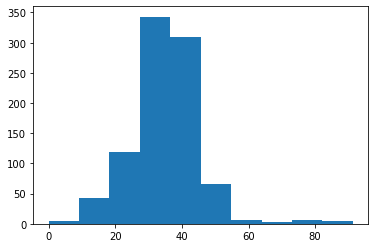

------
lenta_lem_2
------
Количетсво тем: 42
------
Решения: (1, 2)
------
Jaccar
------


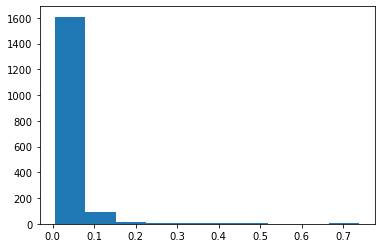

------
KLB
------


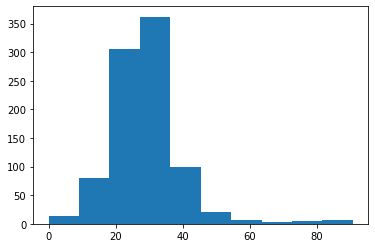

------
lenta_lem_2
------
Количетсво тем: 44
------
Решения: (0, 1)
------
Jaccar
------


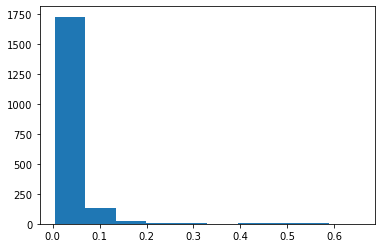

------
KLB
------


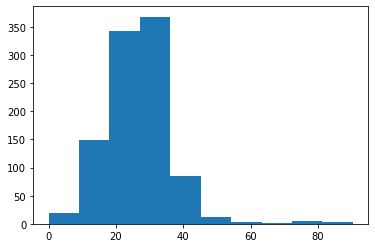

------
lenta_lem_2
------
Количетсво тем: 44
------
Решения: (0, 2)
------
Jaccar
------


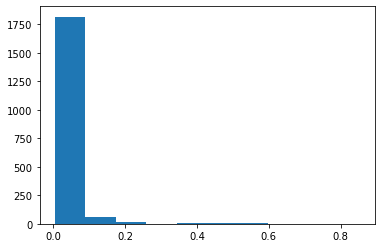

------
KLB
------


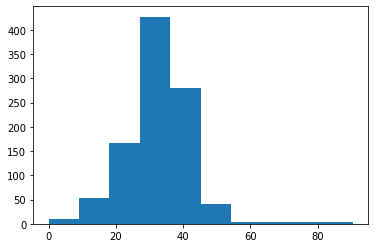

------
lenta_lem_2
------
Количетсво тем: 44
------
Решения: (1, 2)
------
Jaccar
------


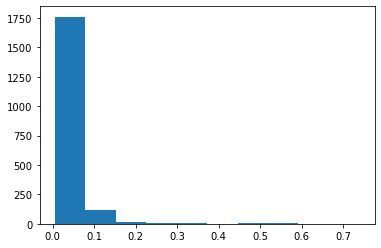

------
KLB
------


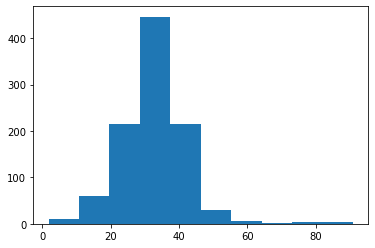

------
lenta_lem_2
------
Количетсво тем: 46
------
Решения: (0, 1)
------
Jaccar
------


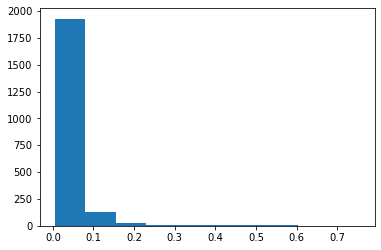

------
KLB
------


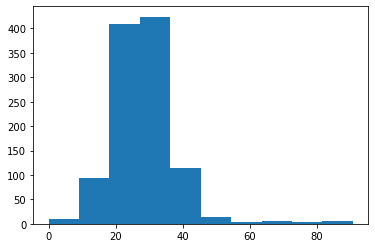

------
lenta_lem_2
------
Количетсво тем: 46
------
Решения: (0, 2)
------
Jaccar
------


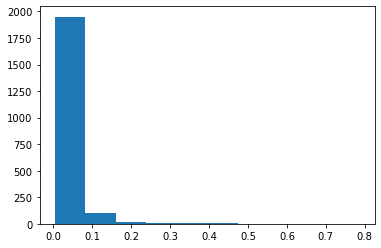

------
KLB
------


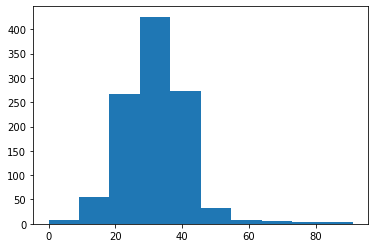

------
lenta_lem_2
------
Количетсво тем: 46
------
Решения: (1, 2)
------
Jaccar
------


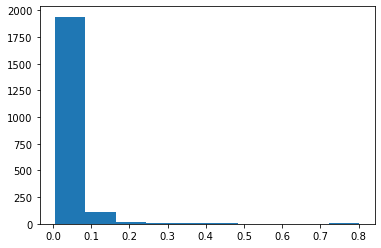

------
KLB
------


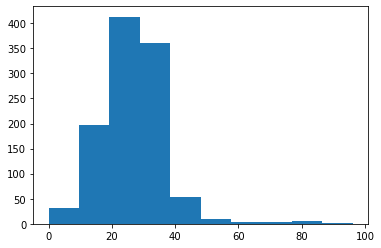

------
lenta_lem_2
------
Количетсво тем: 48
------
Решения: (0, 1)
------
Jaccar
------


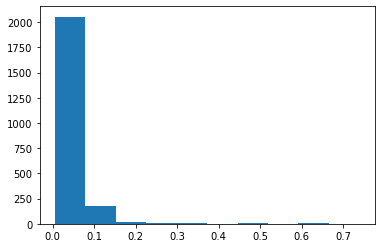

------
KLB
------


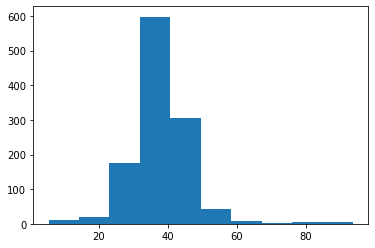

------
lenta_lem_2
------
Количетсво тем: 48
------
Решения: (0, 2)
------
Jaccar
------


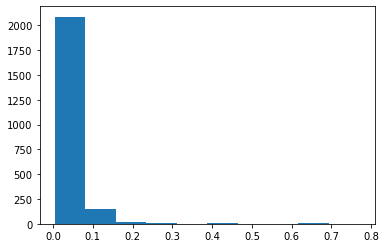

------
KLB
------


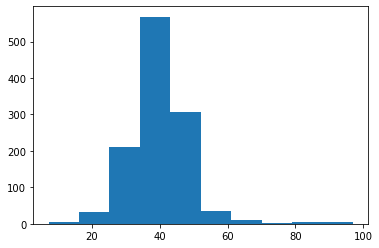

------
lenta_lem_2
------
Количетсво тем: 48
------
Решения: (1, 2)
------
Jaccar
------


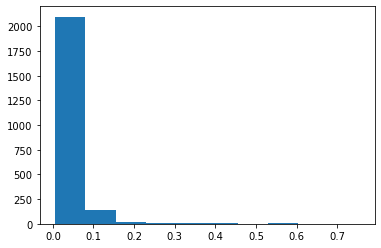

------
KLB
------


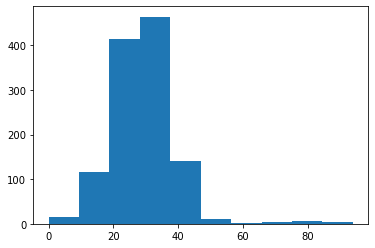

------
Processed 15423 documents.
20topicsnews_lem_1
------
Количетсво тем: 2
------
Решения: (0, 1)
------
Jaccar
------


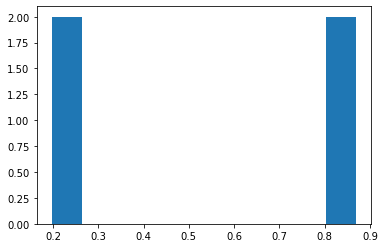

------
KLB
------


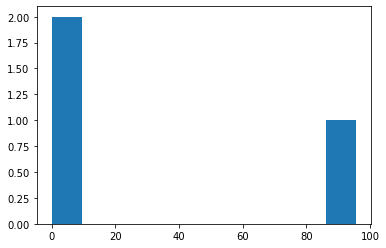

------
20topicsnews_lem_1
------
Количетсво тем: 2
------
Решения: (0, 2)
------
Jaccar
------


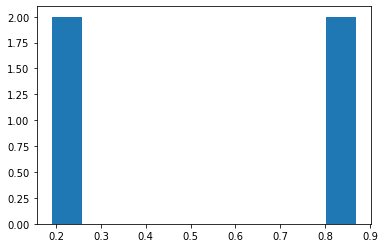

------
KLB
------


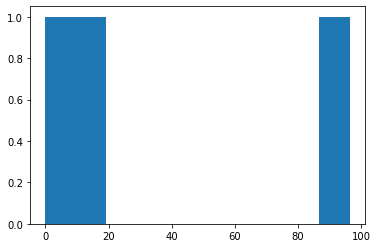

------
20topicsnews_lem_1
------
Количетсво тем: 2
------
Решения: (1, 2)
------
Jaccar
------


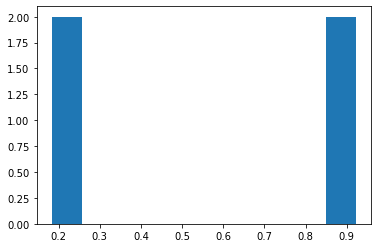

------
KLB
------


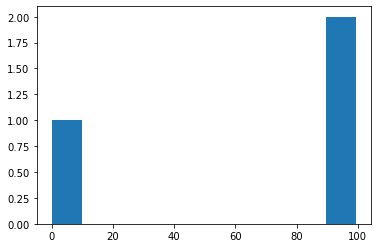

------
20topicsnews_lem_1
------
Количетсво тем: 4
------
Решения: (0, 1)
------
Jaccar
------


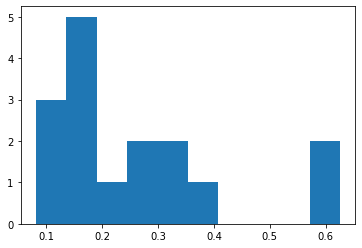

------
KLB
------


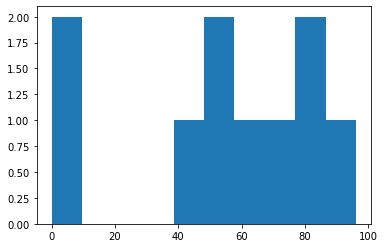

------
20topicsnews_lem_1
------
Количетсво тем: 4
------
Решения: (0, 2)
------
Jaccar
------


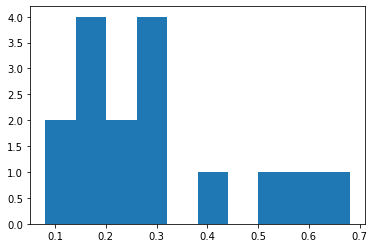

------
KLB
------


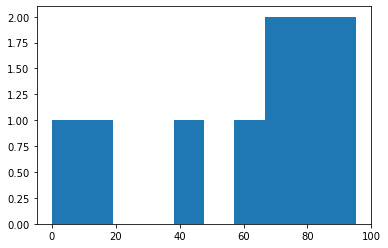

------
20topicsnews_lem_1
------
Количетсво тем: 4
------
Решения: (1, 2)
------
Jaccar
------


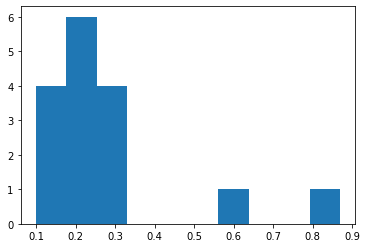

------
KLB
------


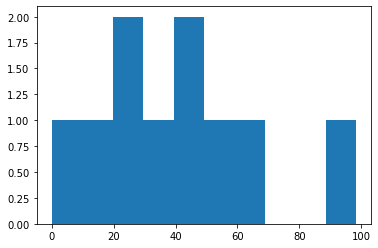

------
20topicsnews_lem_1
------
Количетсво тем: 6
------
Решения: (0, 1)
------
Jaccar
------


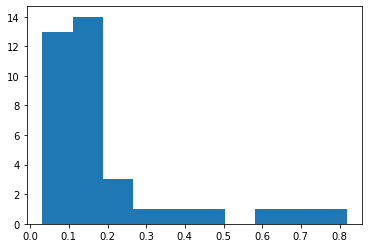

------
KLB
------


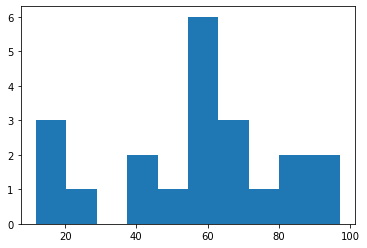

------
20topicsnews_lem_1
------
Количетсво тем: 6
------
Решения: (0, 2)
------
Jaccar
------


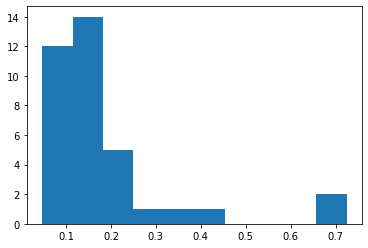

------
KLB
------


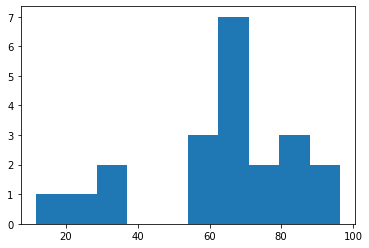

------
20topicsnews_lem_1
------
Количетсво тем: 6
------
Решения: (1, 2)
------
Jaccar
------


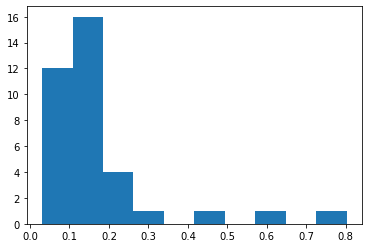

------
KLB
------


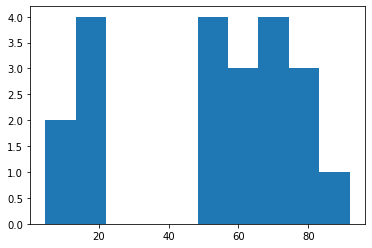

------
20topicsnews_lem_1
------
Количетсво тем: 8
------
Решения: (0, 1)
------
Jaccar
------


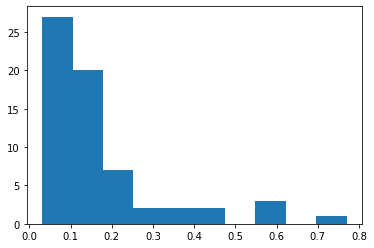

------
KLB
------


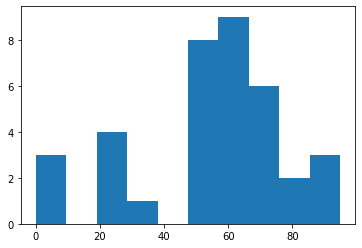

------
20topicsnews_lem_1
------
Количетсво тем: 8
------
Решения: (0, 2)
------
Jaccar
------


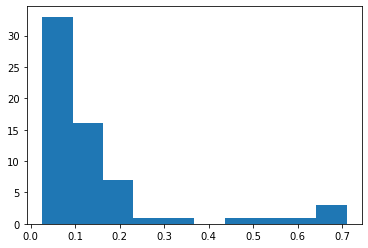

------
KLB
------


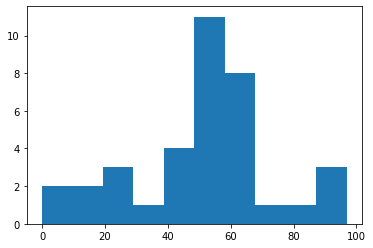

------
20topicsnews_lem_1
------
Количетсво тем: 8
------
Решения: (1, 2)
------
Jaccar
------


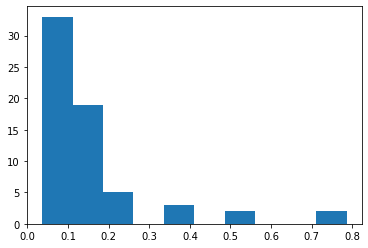

------
KLB
------


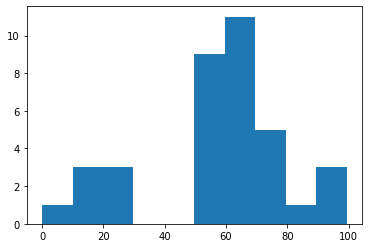

------
20topicsnews_lem_1
------
Количетсво тем: 10
------
Решения: (0, 1)
------
Jaccar
------


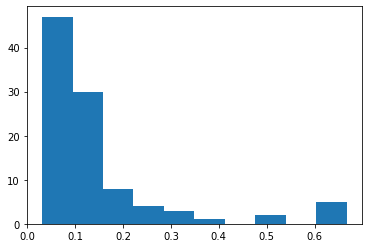

------
KLB
------


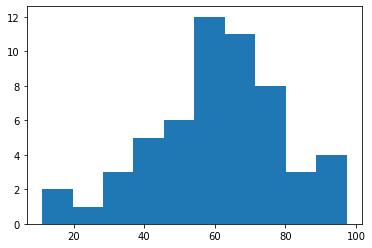

------
20topicsnews_lem_1
------
Количетсво тем: 10
------
Решения: (0, 2)
------
Jaccar
------


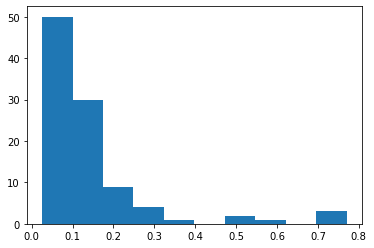

------
KLB
------


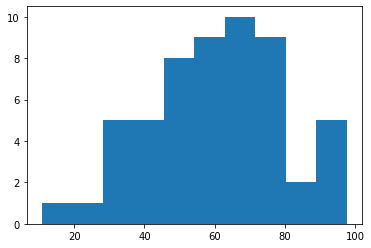

------
20topicsnews_lem_1
------
Количетсво тем: 10
------
Решения: (1, 2)
------
Jaccar
------


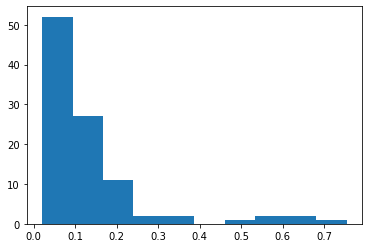

------
KLB
------


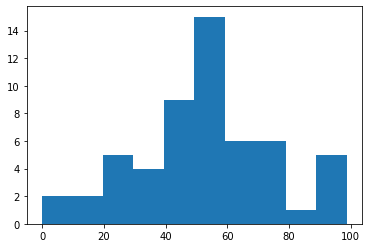

------
20topicsnews_lem_1
------
Количетсво тем: 12
------
Решения: (0, 1)
------
Jaccar
------


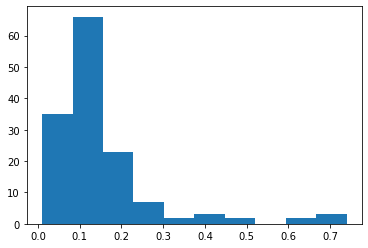

------
KLB
------


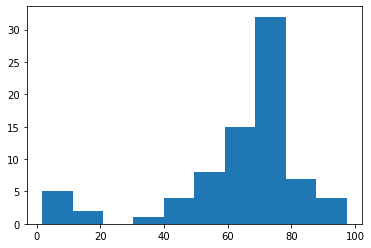

------
20topicsnews_lem_1
------
Количетсво тем: 12
------
Решения: (0, 2)
------
Jaccar
------


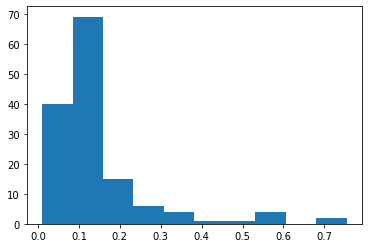

------
KLB
------


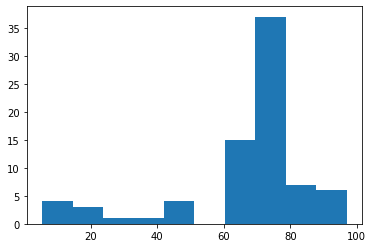

------
20topicsnews_lem_1
------
Количетсво тем: 12
------
Решения: (1, 2)
------
Jaccar
------


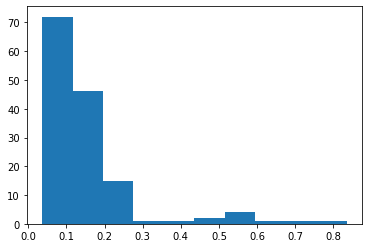

------
KLB
------


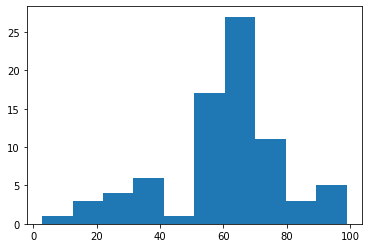

------
20topicsnews_lem_1
------
Количетсво тем: 14
------
Решения: (0, 1)
------
Jaccar
------


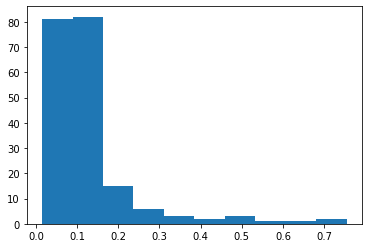

------
KLB
------


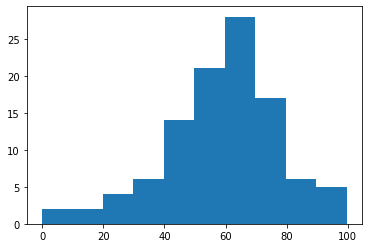

------
20topicsnews_lem_1
------
Количетсво тем: 14
------
Решения: (0, 2)
------
Jaccar
------


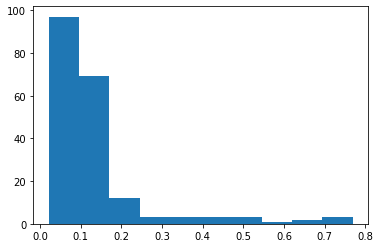

------
KLB
------


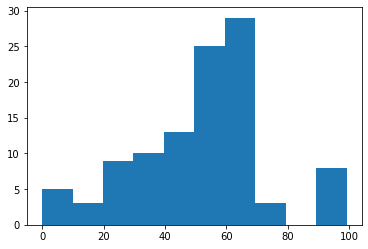

------
20topicsnews_lem_1
------
Количетсво тем: 14
------
Решения: (1, 2)
------
Jaccar
------


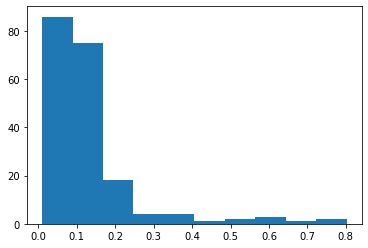

------
KLB
------


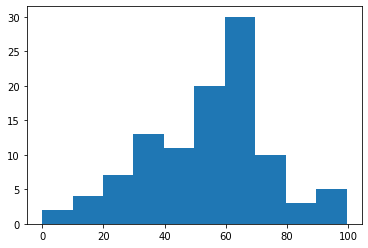

------
20topicsnews_lem_1
------
Количетсво тем: 16
------
Решения: (0, 1)
------
Jaccar
------


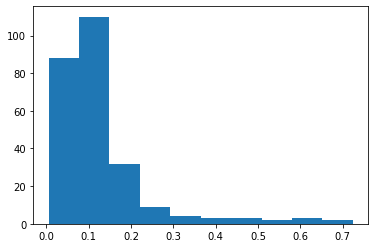

------
KLB
------


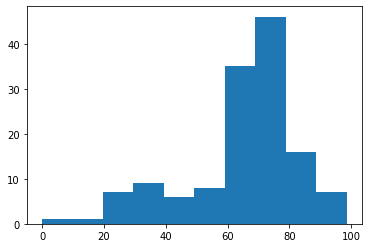

------
20topicsnews_lem_1
------
Количетсво тем: 16
------
Решения: (0, 2)
------
Jaccar
------


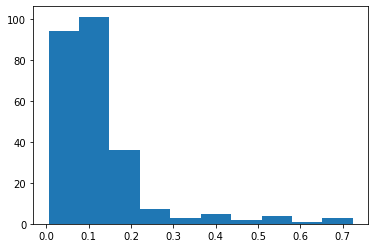

------
KLB
------


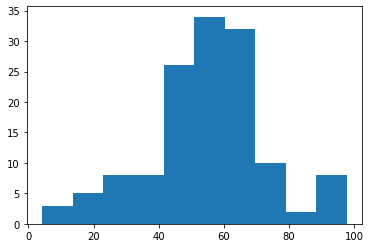

------
20topicsnews_lem_1
------
Количетсво тем: 16
------
Решения: (1, 2)
------
Jaccar
------


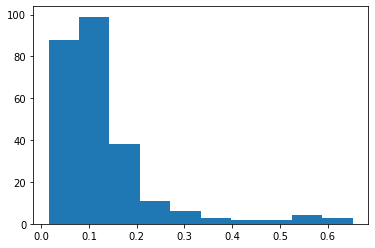

------
KLB
------


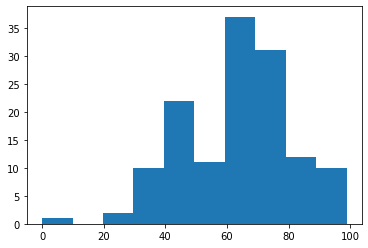

------
20topicsnews_lem_1
------
Количетсво тем: 18
------
Решения: (0, 1)
------
Jaccar
------


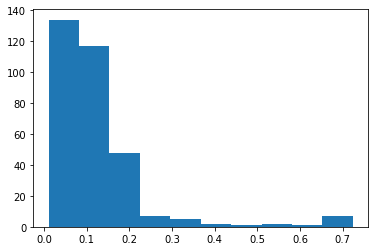

------
KLB
------


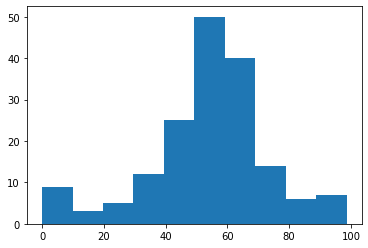

------
20topicsnews_lem_1
------
Количетсво тем: 18
------
Решения: (0, 2)
------
Jaccar
------


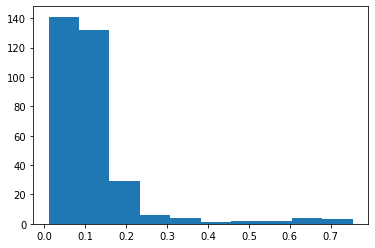

------
KLB
------


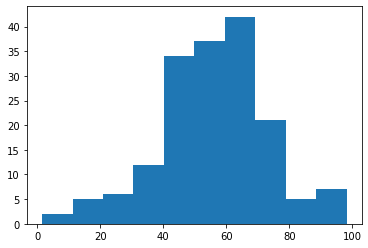

------
20topicsnews_lem_1
------
Количетсво тем: 18
------
Решения: (1, 2)
------
Jaccar
------


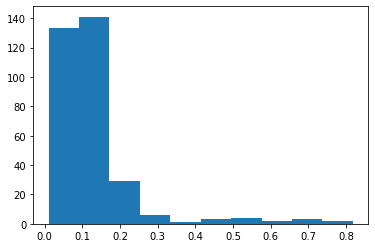

------
KLB
------


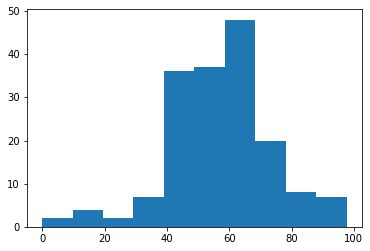

------
20topicsnews_lem_1
------
Количетсво тем: 20
------
Решения: (0, 1)
------
Jaccar
------


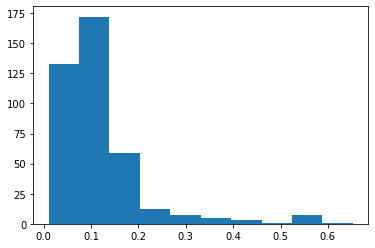

------
KLB
------


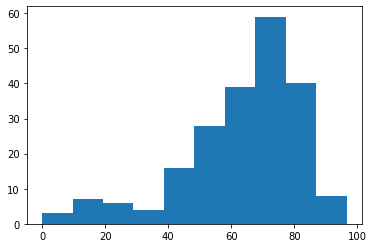

------
20topicsnews_lem_1
------
Количетсво тем: 20
------
Решения: (0, 2)
------
Jaccar
------


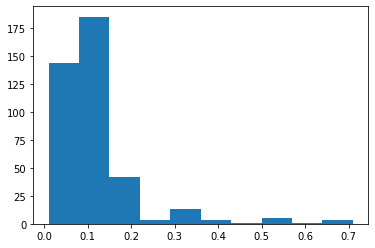

------
KLB
------


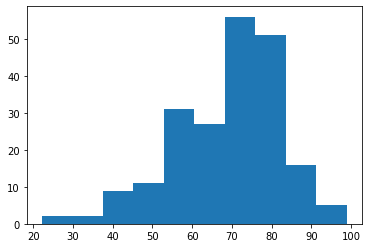

------
20topicsnews_lem_1
------
Количетсво тем: 20
------
Решения: (1, 2)
------
Jaccar
------


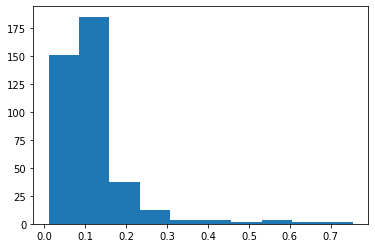

------
KLB
------


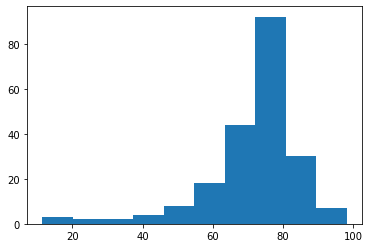

------
20topicsnews_lem_1
------
Количетсво тем: 22
------
Решения: (0, 1)
------
Jaccar
------


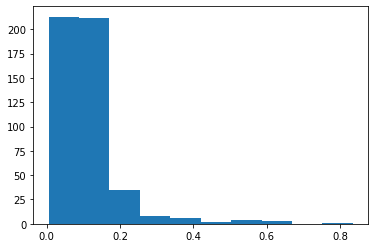

------
KLB
------


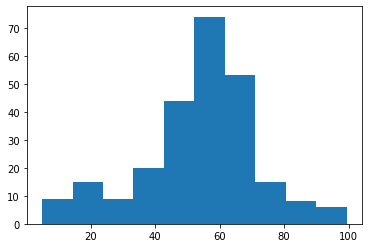

------
20topicsnews_lem_1
------
Количетсво тем: 22
------
Решения: (0, 2)
------
Jaccar
------


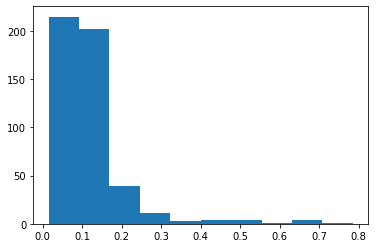

------
KLB
------


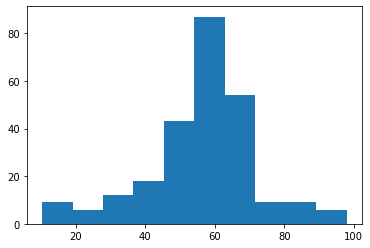

------
20topicsnews_lem_1
------
Количетсво тем: 22
------
Решения: (1, 2)
------
Jaccar
------


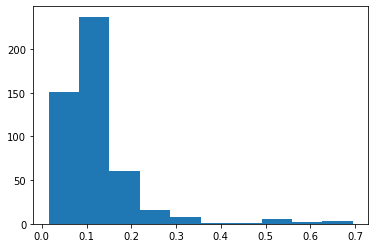

------
KLB
------


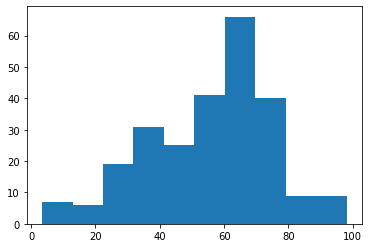

------
20topicsnews_lem_1
------
Количетсво тем: 24
------
Решения: (0, 1)
------
Jaccar
------


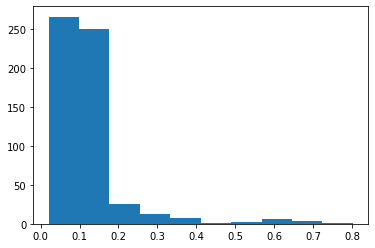

------
KLB
------


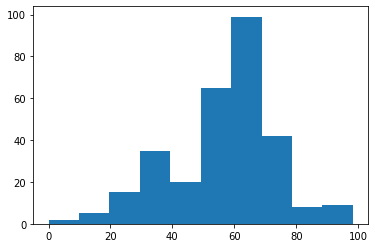

------
20topicsnews_lem_1
------
Количетсво тем: 24
------
Решения: (0, 2)
------
Jaccar
------


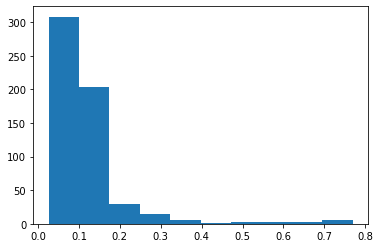

------
KLB
------


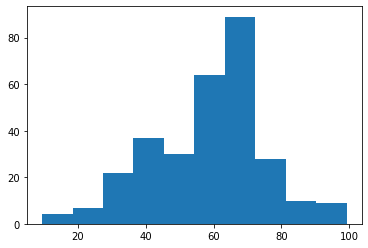

------
20topicsnews_lem_1
------
Количетсво тем: 24
------
Решения: (1, 2)
------
Jaccar
------


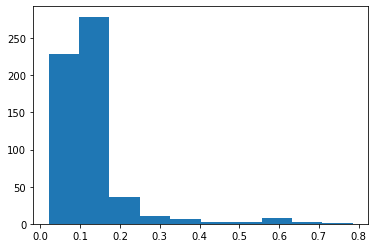

------
KLB
------


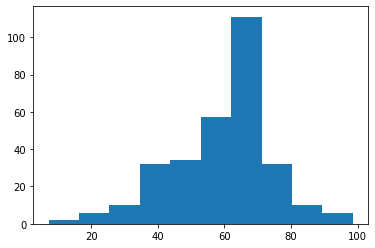

------
20topicsnews_lem_1
------
Количетсво тем: 26
------
Решения: (0, 1)
------
Jaccar
------


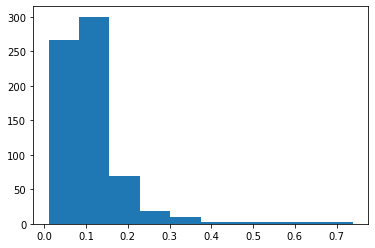

------
KLB
------


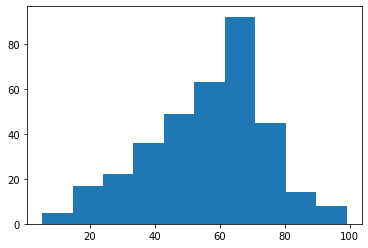

------
20topicsnews_lem_1
------
Количетсво тем: 26
------
Решения: (0, 2)
------
Jaccar
------


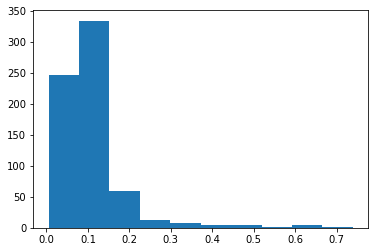

------
KLB
------


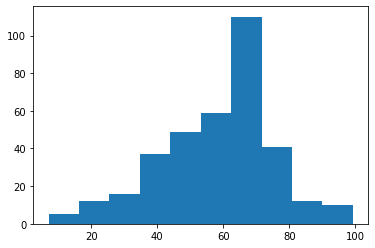

------
20topicsnews_lem_1
------
Количетсво тем: 26
------
Решения: (1, 2)
------
Jaccar
------


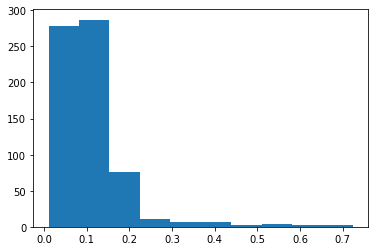

------
KLB
------


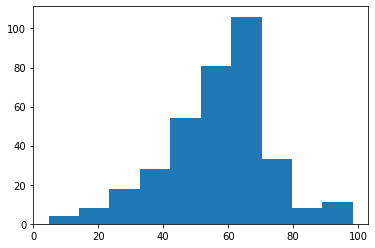

------
20topicsnews_lem_1
------
Количетсво тем: 28
------
Решения: (0, 1)
------
Jaccar
------


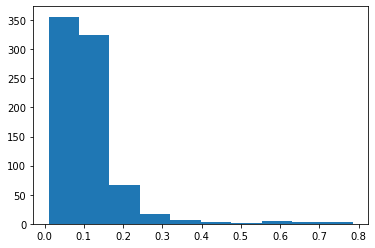

------
KLB
------


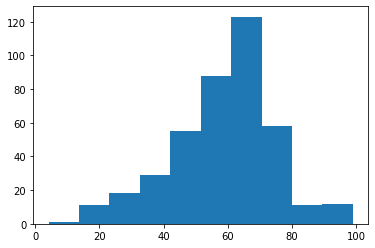

------
20topicsnews_lem_1
------
Количетсво тем: 28
------
Решения: (0, 2)
------
Jaccar
------


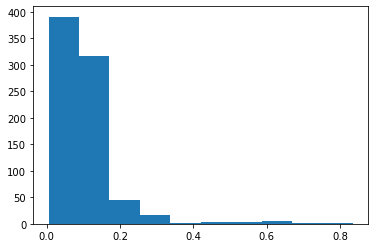

------
KLB
------


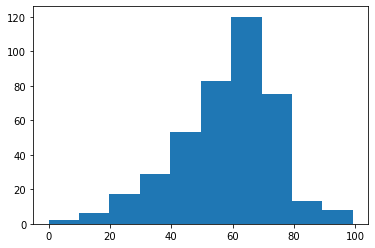

------
20topicsnews_lem_1
------
Количетсво тем: 28
------
Решения: (1, 2)
------
Jaccar
------


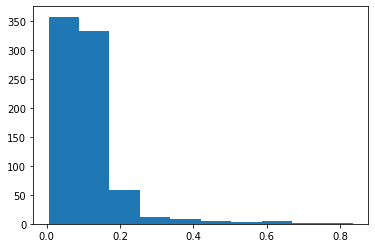

------
KLB
------


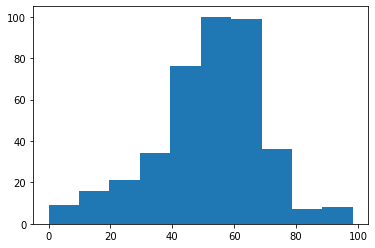

------
20topicsnews_lem_1
------
Количетсво тем: 30
------
Решения: (0, 1)
------
Jaccar
------


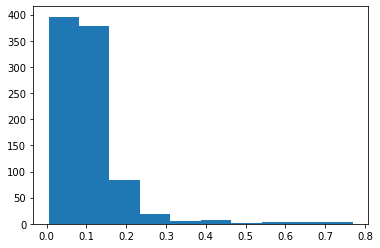

------
KLB
------


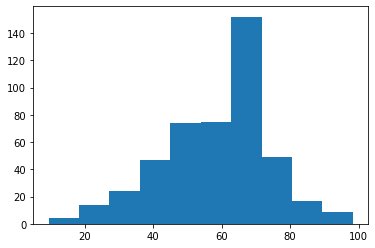

------
20topicsnews_lem_1
------
Количетсво тем: 30
------
Решения: (0, 2)
------
Jaccar
------


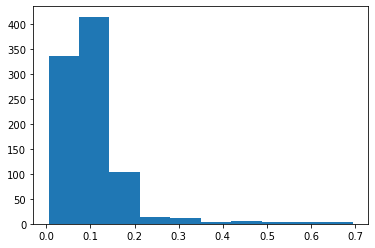

------
KLB
------


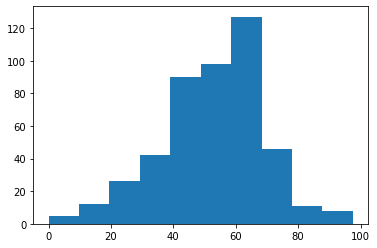

------
20topicsnews_lem_1
------
Количетсво тем: 30
------
Решения: (1, 2)
------
Jaccar
------


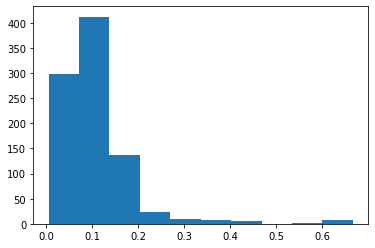

------
KLB
------


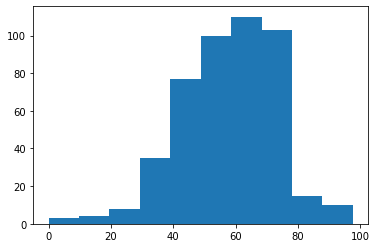

------
20topicsnews_lem_1
------
Количетсво тем: 32
------
Решения: (0, 1)
------
Jaccar
------


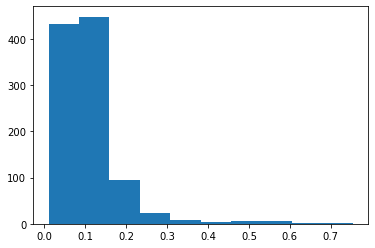

------
KLB
------


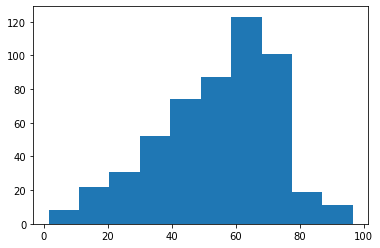

------
20topicsnews_lem_1
------
Количетсво тем: 32
------
Решения: (0, 2)
------
Jaccar
------


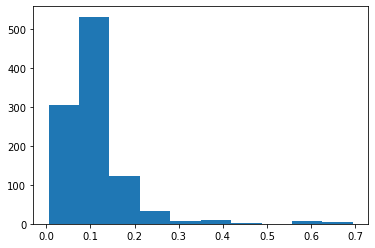

------
KLB
------


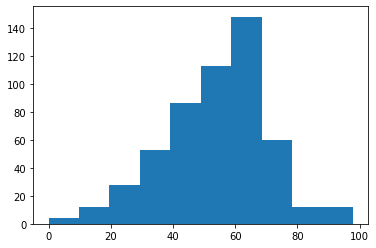

------
20topicsnews_lem_1
------
Количетсво тем: 32
------
Решения: (1, 2)
------
Jaccar
------


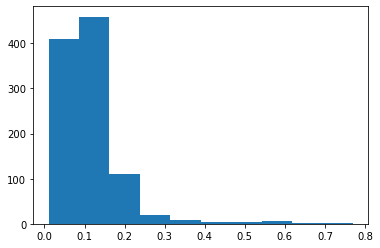

------
KLB
------


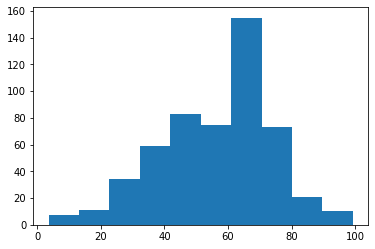

------
20topicsnews_lem_1
------
Количетсво тем: 34
------
Решения: (0, 1)
------
Jaccar
------


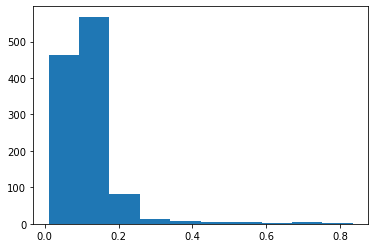

------
KLB
------


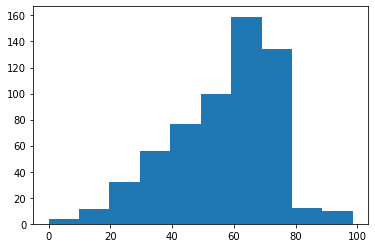

------
20topicsnews_lem_1
------
Количетсво тем: 34
------
Решения: (0, 2)
------
Jaccar
------


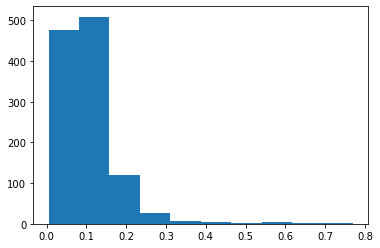

------
KLB
------


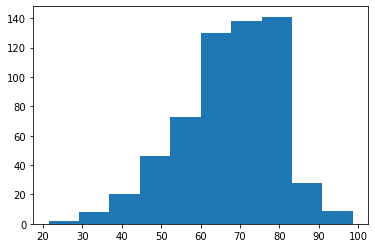

------
20topicsnews_lem_1
------
Количетсво тем: 34
------
Решения: (1, 2)
------
Jaccar
------


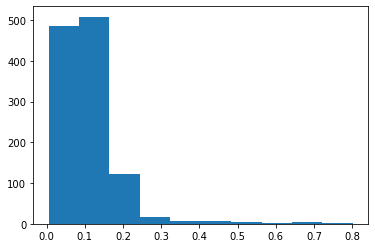

------
KLB
------


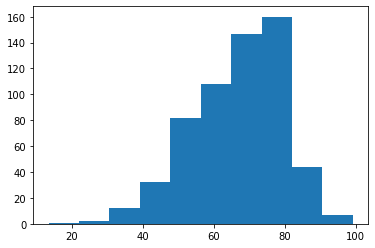

------
20topicsnews_lem_1
------
Количетсво тем: 36
------
Решения: (0, 1)
------
Jaccar
------


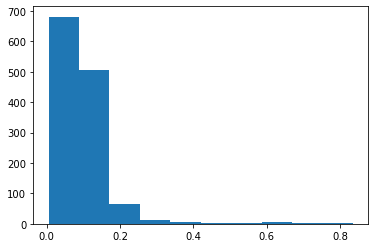

------
KLB
------


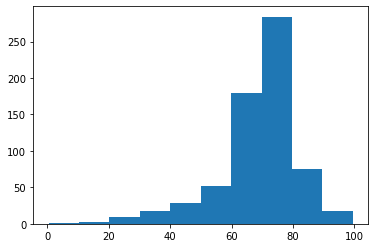

------
20topicsnews_lem_1
------
Количетсво тем: 36
------
Решения: (0, 2)
------
Jaccar
------


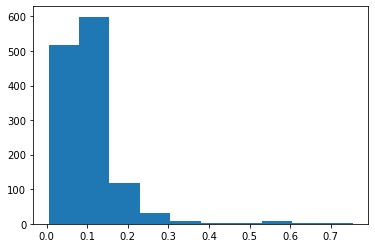

------
KLB
------


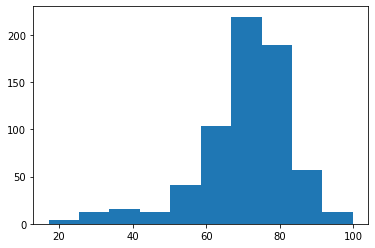

------
20topicsnews_lem_1
------
Количетсво тем: 36
------
Решения: (1, 2)
------
Jaccar
------


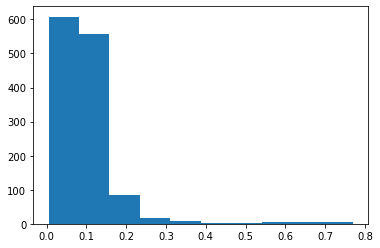

------
KLB
------


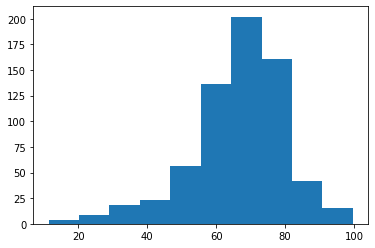

------
20topicsnews_lem_1
------
Количетсво тем: 38
------
Решения: (0, 1)
------
Jaccar
------


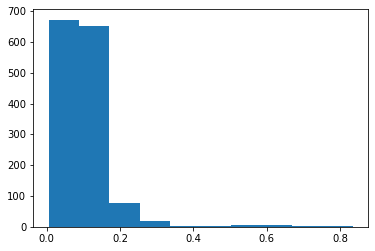

------
KLB
------


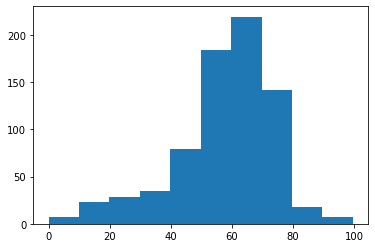

------
20topicsnews_lem_1
------
Количетсво тем: 38
------
Решения: (0, 2)
------
Jaccar
------


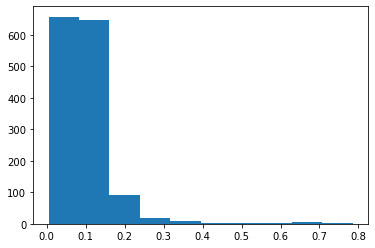

------
KLB
------


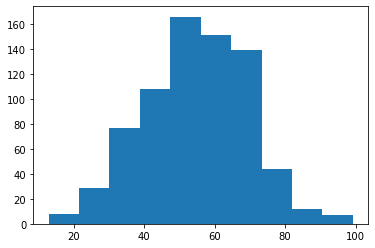

------
20topicsnews_lem_1
------
Количетсво тем: 38
------
Решения: (1, 2)
------
Jaccar
------


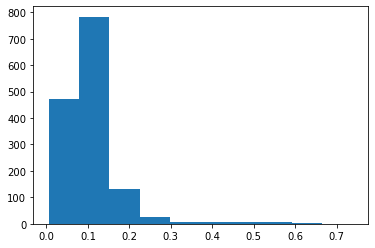

------
KLB
------


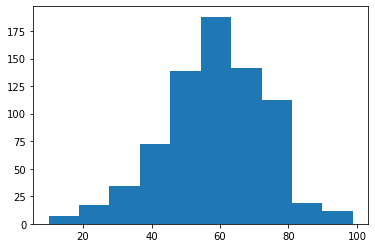

------
20topicsnews_lem_1
------
Количетсво тем: 40
------
Решения: (0, 1)
------
Jaccar
------


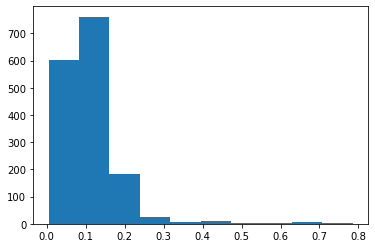

------
KLB
------


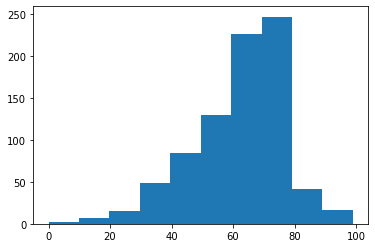

------
20topicsnews_lem_1
------
Количетсво тем: 40
------
Решения: (0, 2)
------
Jaccar
------


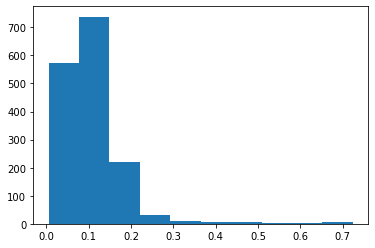

------
KLB
------


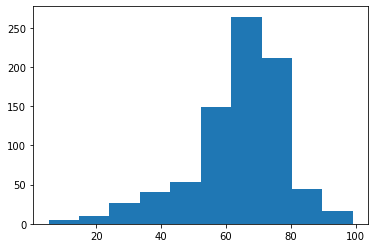

------
20topicsnews_lem_1
------
Количетсво тем: 40
------
Решения: (1, 2)
------
Jaccar
------


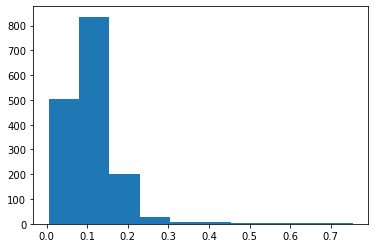

------
KLB
------


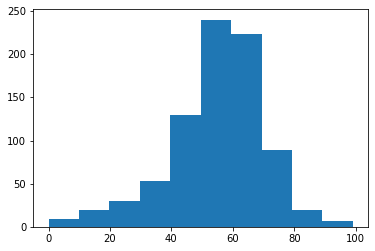

------
20topicsnews_lem_1
------
Количетсво тем: 42
------
Решения: (0, 1)
------
Jaccar
------


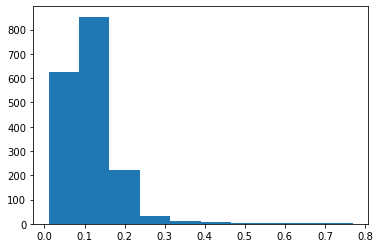

------
KLB
------


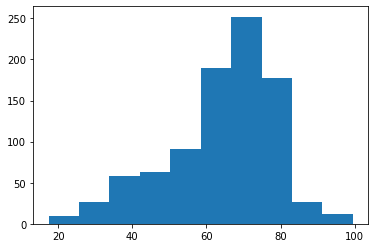

------
20topicsnews_lem_1
------
Количетсво тем: 42
------
Решения: (0, 2)
------
Jaccar
------


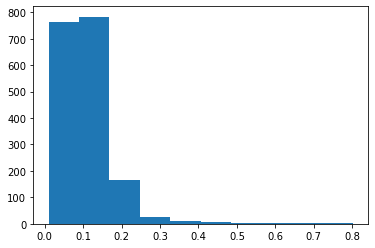

------
KLB
------


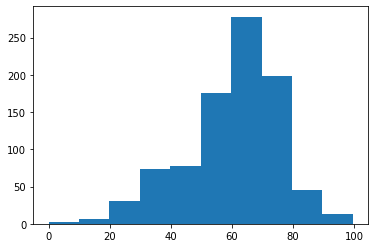

------
20topicsnews_lem_1
------
Количетсво тем: 42
------
Решения: (1, 2)
------
Jaccar
------


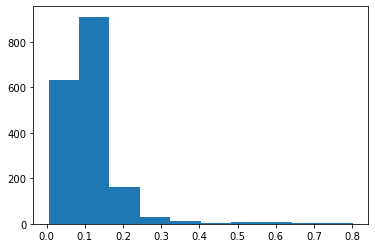

------
KLB
------


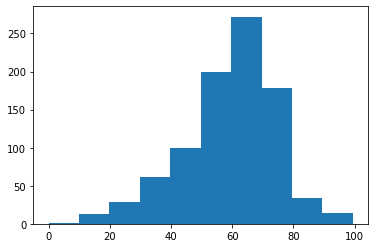

------
20topicsnews_lem_1
------
Количетсво тем: 44
------
Решения: (0, 1)
------
Jaccar
------


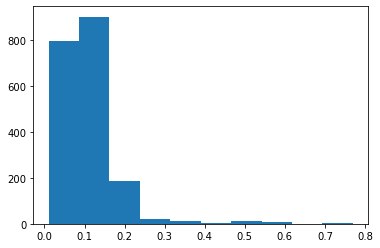

------
KLB
------


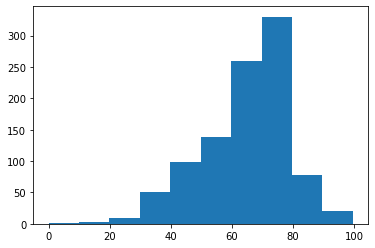

------
20topicsnews_lem_1
------
Количетсво тем: 44
------
Решения: (0, 2)
------
Jaccar
------


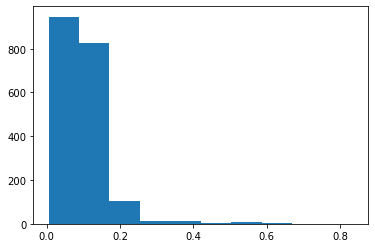

------
KLB
------


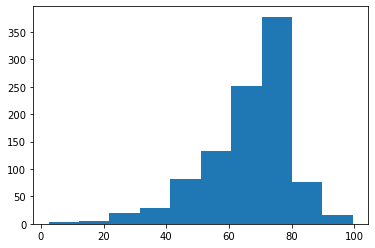

------
20topicsnews_lem_1
------
Количетсво тем: 44
------
Решения: (1, 2)
------
Jaccar
------


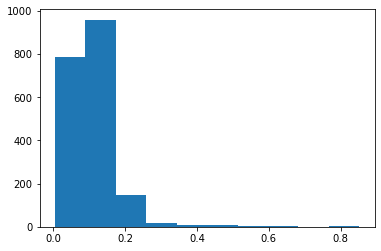

------
KLB
------


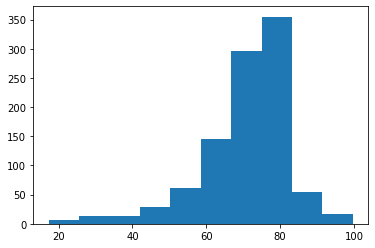

------
20topicsnews_lem_1
------
Количетсво тем: 46
------
Решения: (0, 1)
------
Jaccar
------


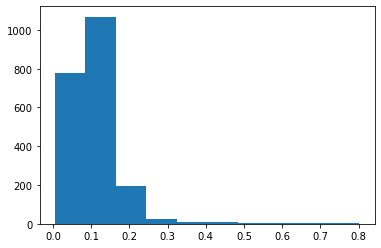

------
KLB
------


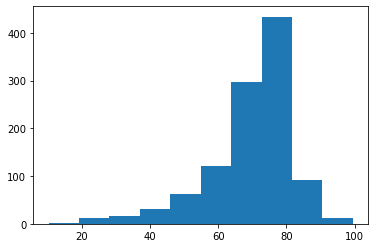

------
20topicsnews_lem_1
------
Количетсво тем: 46
------
Решения: (0, 2)
------
Jaccar
------


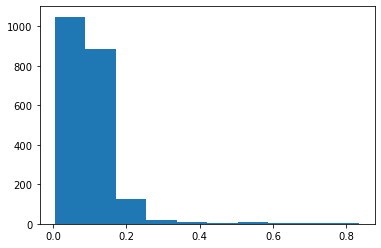

------
KLB
------


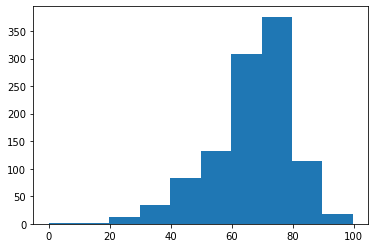

------
20topicsnews_lem_1
------
Количетсво тем: 46
------
Решения: (1, 2)
------
Jaccar
------


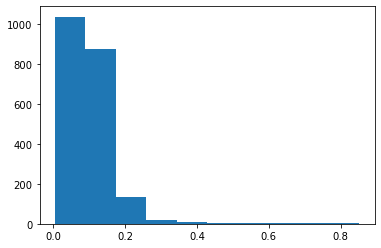

------
KLB
------


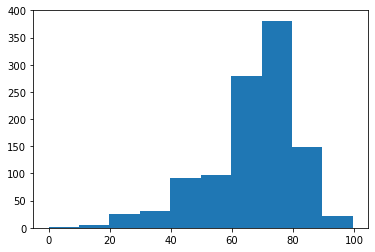

------
20topicsnews_lem_1
------
Количетсво тем: 48
------
Решения: (0, 1)
------
Jaccar
------


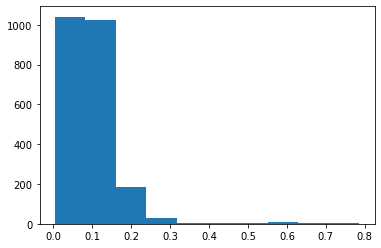

------
KLB
------


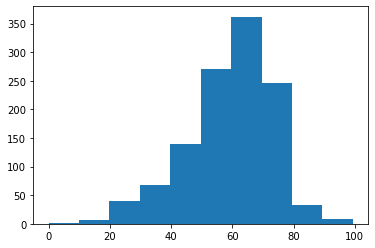

------
20topicsnews_lem_1
------
Количетсво тем: 48
------
Решения: (0, 2)
------
Jaccar
------


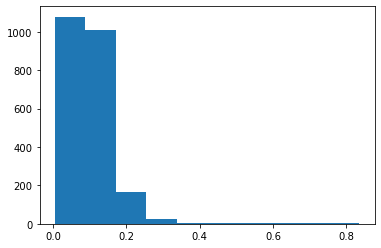

------
KLB
------


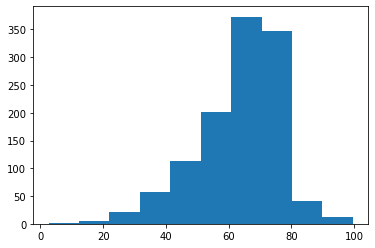

------
20topicsnews_lem_1
------
Количетсво тем: 48
------
Решения: (1, 2)
------
Jaccar
------


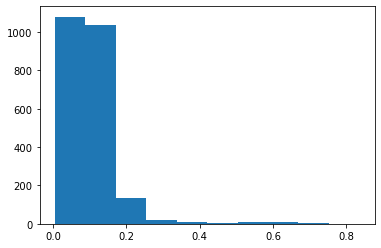

------
KLB
------


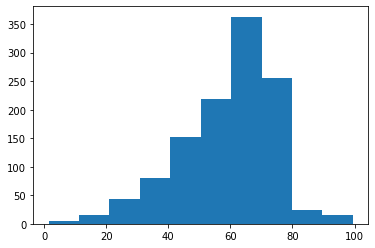

------
Processed 15423 documents.
20topicsnews_lem_2
------
Количетсво тем: 2
------
Решения: (0, 1)
------
Jaccar
------


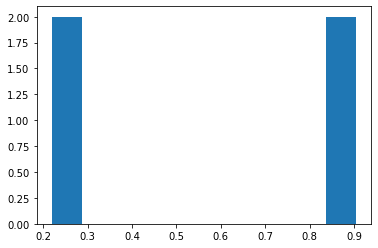

------
KLB
------


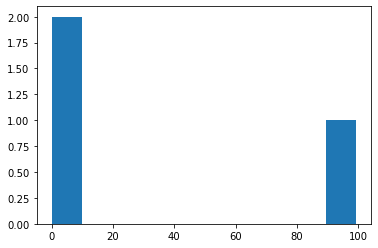

------
20topicsnews_lem_2
------
Количетсво тем: 2
------
Решения: (0, 2)
------
Jaccar
------


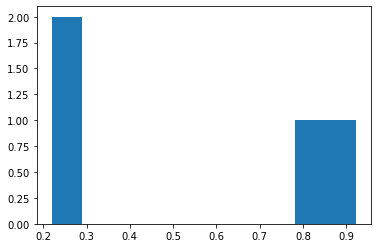

------
KLB
------


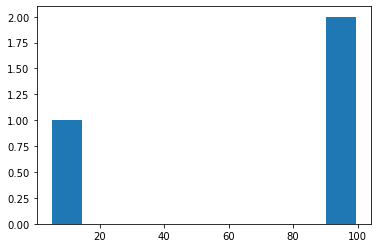

------
20topicsnews_lem_2
------
Количетсво тем: 2
------
Решения: (1, 2)
------
Jaccar
------


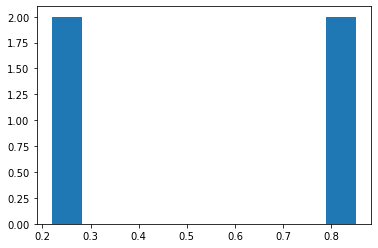

------
KLB
------


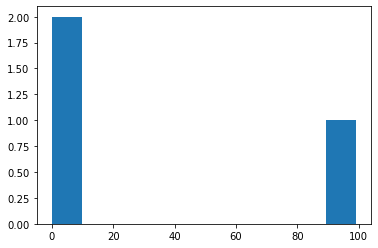

------
20topicsnews_lem_2
------
Количетсво тем: 4
------
Решения: (0, 1)
------
Jaccar
------


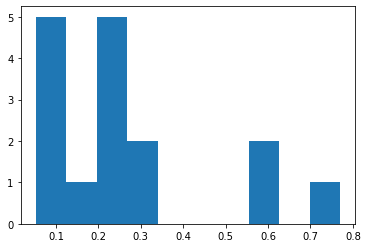

------
KLB
------


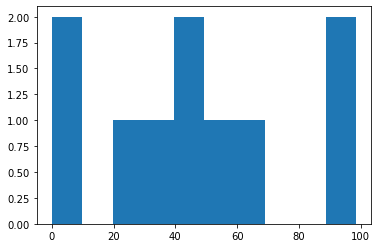

------
20topicsnews_lem_2
------
Количетсво тем: 4
------
Решения: (0, 2)
------
Jaccar
------


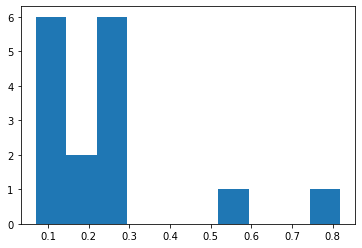

------
KLB
------


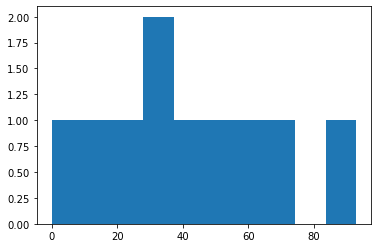

------
20topicsnews_lem_2
------
Количетсво тем: 4
------
Решения: (1, 2)
------
Jaccar
------


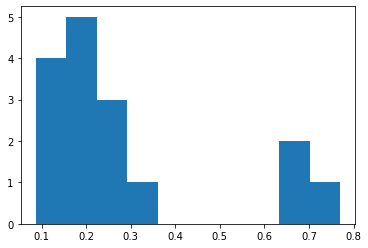

------
KLB
------


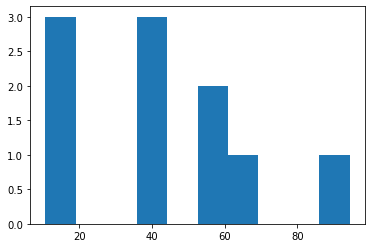

------
20topicsnews_lem_2
------
Количетсво тем: 6
------
Решения: (0, 1)
------
Jaccar
------


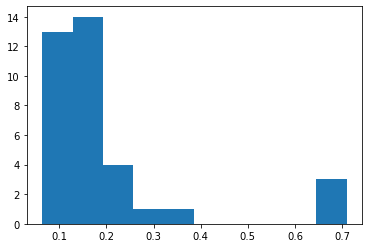

------
KLB
------


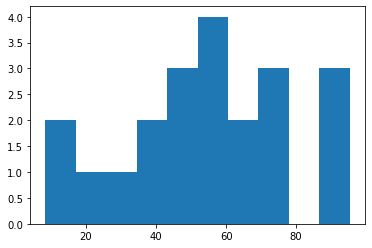

------
20topicsnews_lem_2
------
Количетсво тем: 6
------
Решения: (0, 2)
------
Jaccar
------


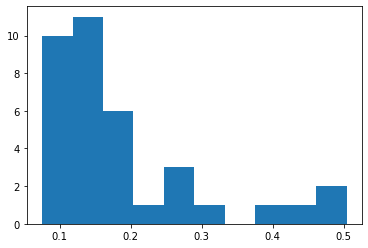

------
KLB
------


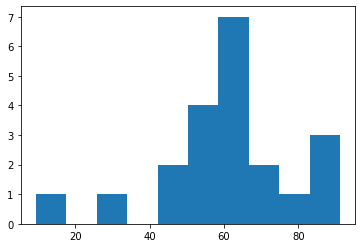

------
20topicsnews_lem_2
------
Количетсво тем: 6
------
Решения: (1, 2)
------
Jaccar
------


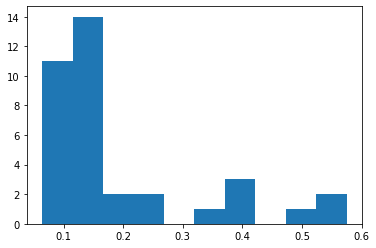

------
KLB
------


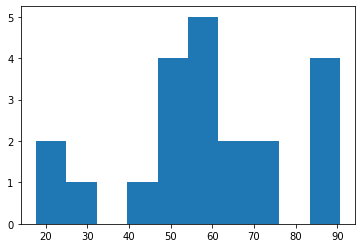

------
20topicsnews_lem_2
------
Количетсво тем: 8
------
Решения: (0, 1)
------
Jaccar
------


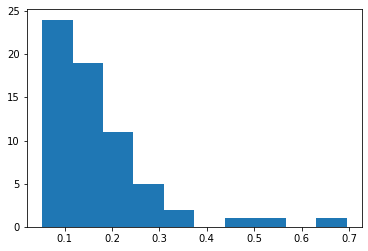

------
KLB
------


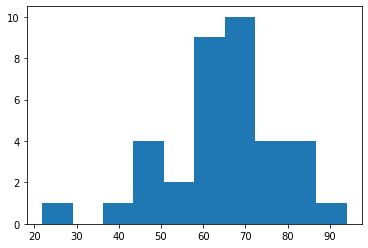

------
20topicsnews_lem_2
------
Количетсво тем: 8
------
Решения: (0, 2)
------
Jaccar
------


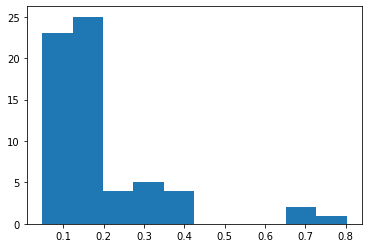

------
KLB
------


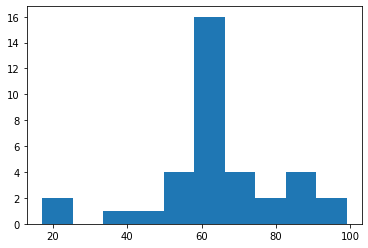

------
20topicsnews_lem_2
------
Количетсво тем: 8
------
Решения: (1, 2)
------
Jaccar
------


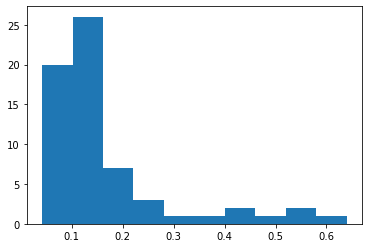

------
KLB
------


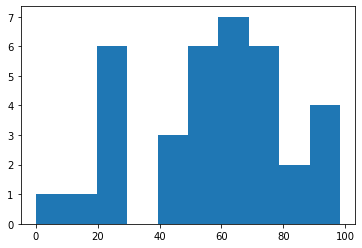

------
20topicsnews_lem_2
------
Количетсво тем: 10
------
Решения: (0, 1)
------
Jaccar
------


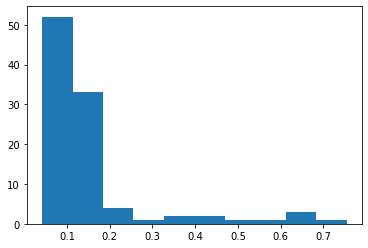

------
KLB
------


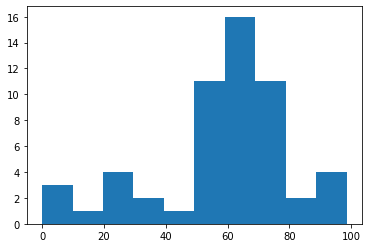

------
20topicsnews_lem_2
------
Количетсво тем: 10
------
Решения: (0, 2)
------
Jaccar
------


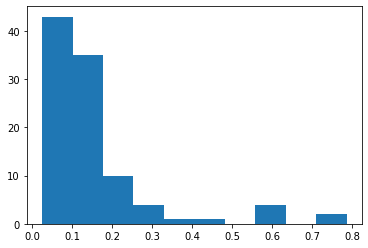

------
KLB
------


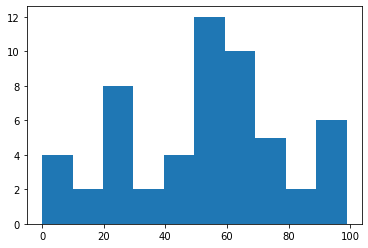

------
20topicsnews_lem_2
------
Количетсво тем: 10
------
Решения: (1, 2)
------
Jaccar
------


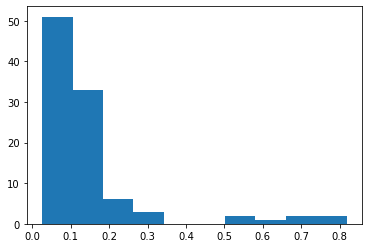

------
KLB
------


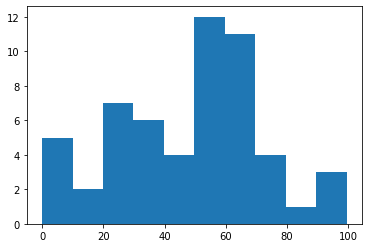

------
20topicsnews_lem_2
------
Количетсво тем: 12
------
Решения: (0, 1)
------
Jaccar
------


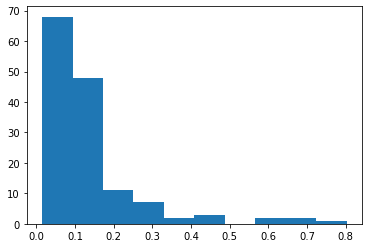

------
KLB
------


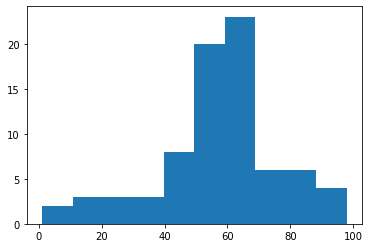

------
20topicsnews_lem_2
------
Количетсво тем: 12
------
Решения: (0, 2)
------
Jaccar
------


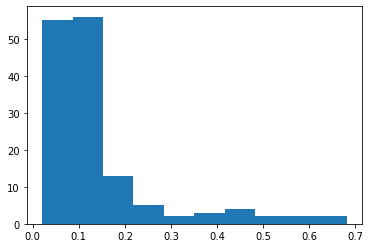

------
KLB
------


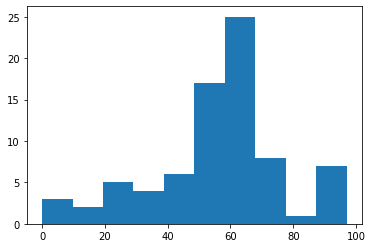

------
20topicsnews_lem_2
------
Количетсво тем: 12
------
Решения: (1, 2)
------
Jaccar
------


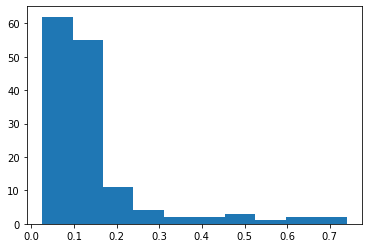

------
KLB
------


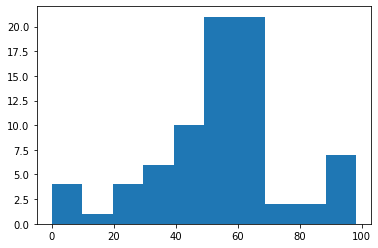

------
20topicsnews_lem_2
------
Количетсво тем: 14
------
Решения: (0, 1)
------
Jaccar
------


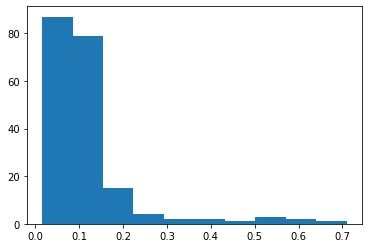

------
KLB
------


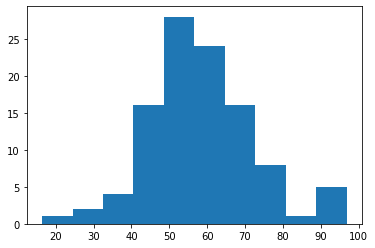

------
20topicsnews_lem_2
------
Количетсво тем: 14
------
Решения: (0, 2)
------
Jaccar
------


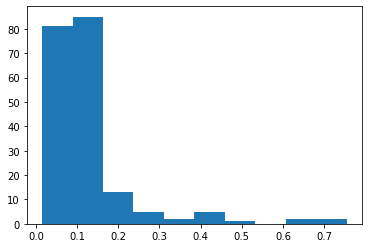

------
KLB
------


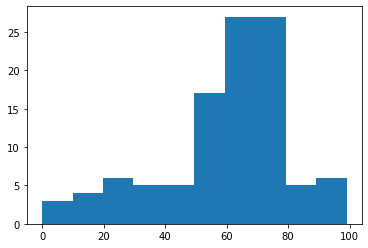

------
20topicsnews_lem_2
------
Количетсво тем: 14
------
Решения: (1, 2)
------
Jaccar
------


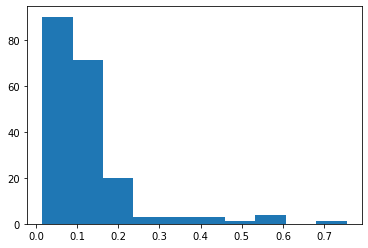

------
KLB
------


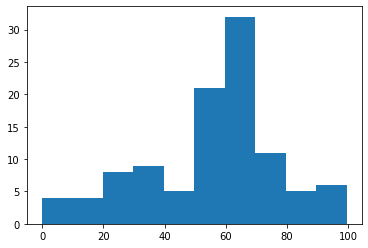

------
20topicsnews_lem_2
------
Количетсво тем: 16
------
Решения: (0, 1)
------
Jaccar
------


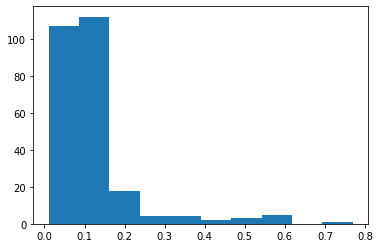

------
KLB
------


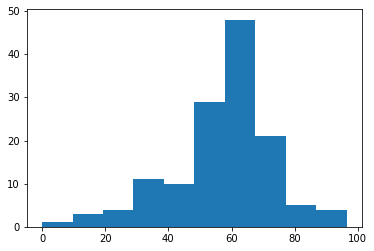

------
20topicsnews_lem_2
------
Количетсво тем: 16
------
Решения: (0, 2)
------
Jaccar
------


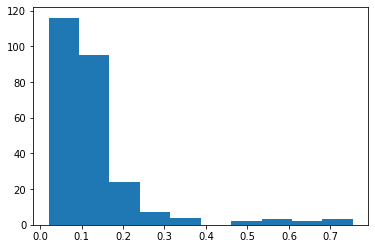

------
KLB
------


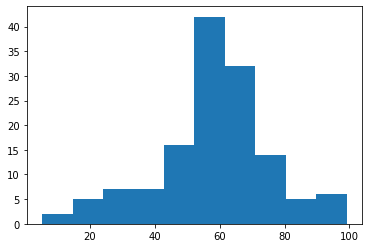

------
20topicsnews_lem_2
------
Количетсво тем: 16
------
Решения: (1, 2)
------
Jaccar
------


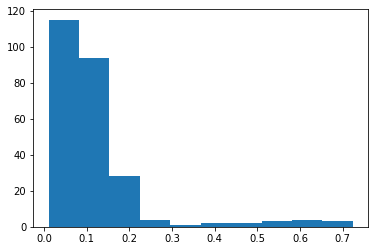

------
KLB
------


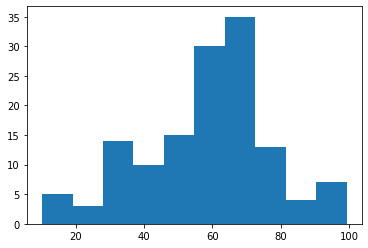

------
20topicsnews_lem_2
------
Количетсво тем: 18
------
Решения: (0, 1)
------
Jaccar
------


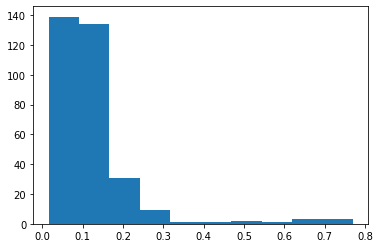

------
KLB
------


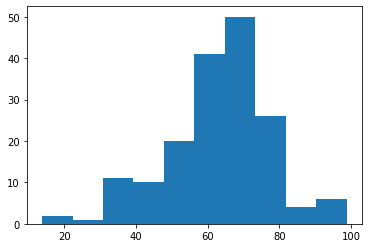

------
20topicsnews_lem_2
------
Количетсво тем: 18
------
Решения: (0, 2)
------
Jaccar
------


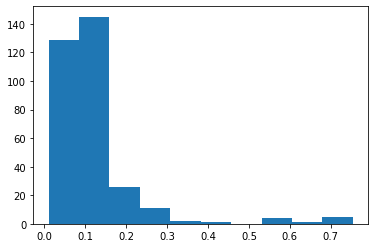

------
KLB
------


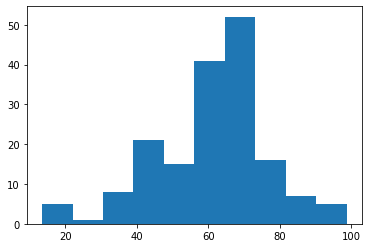

------
20topicsnews_lem_2
------
Количетсво тем: 18
------
Решения: (1, 2)
------
Jaccar
------


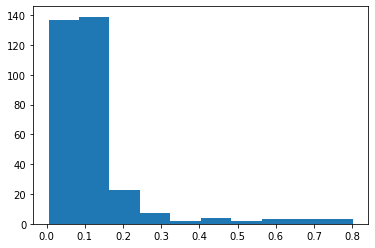

------
KLB
------


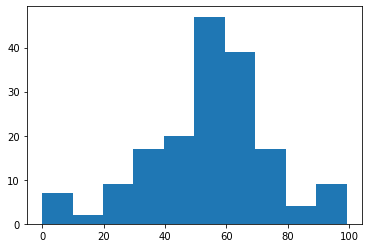

------
20topicsnews_lem_2
------
Количетсво тем: 20
------
Решения: (0, 1)
------
Jaccar
------


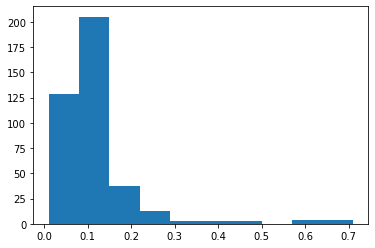

------
KLB
------


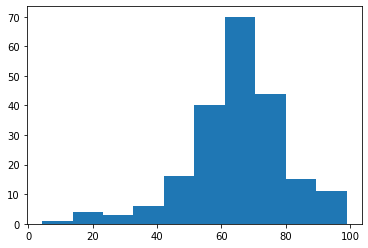

------
20topicsnews_lem_2
------
Количетсво тем: 20
------
Решения: (0, 2)
------
Jaccar
------


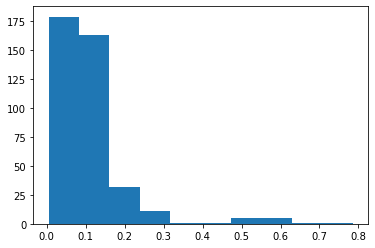

------
KLB
------


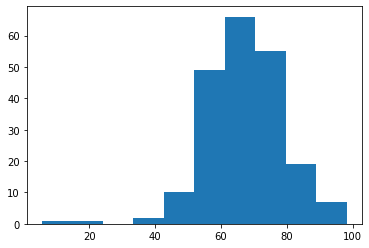

------
20topicsnews_lem_2
------
Количетсво тем: 20
------
Решения: (1, 2)
------
Jaccar
------


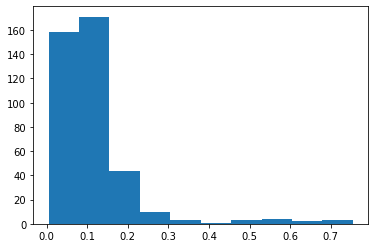

------
KLB
------


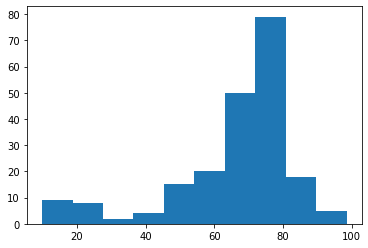

------
20topicsnews_lem_2
------
Количетсво тем: 22
------
Решения: (0, 1)
------
Jaccar
------


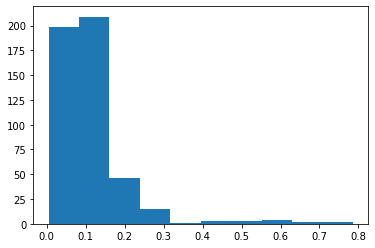

------
KLB
------


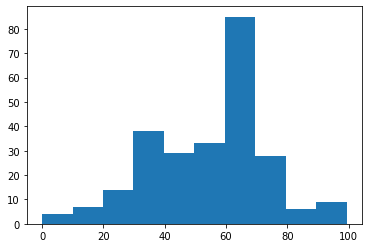

------
20topicsnews_lem_2
------
Количетсво тем: 22
------
Решения: (0, 2)
------
Jaccar
------


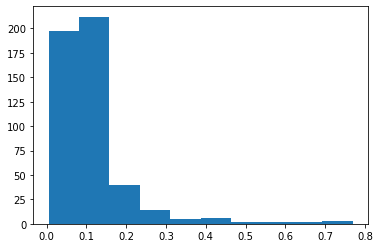

------
KLB
------


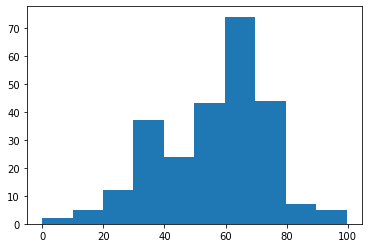

------
20topicsnews_lem_2
------
Количетсво тем: 22
------
Решения: (1, 2)
------
Jaccar
------


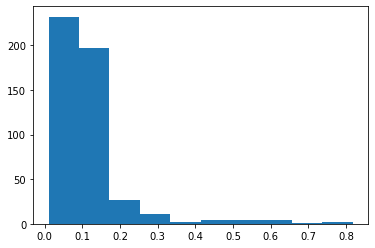

------
KLB
------


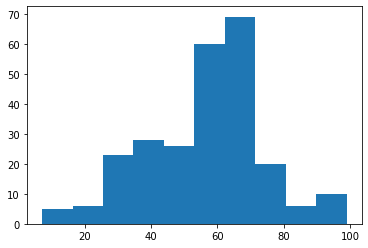

------
20topicsnews_lem_2
------
Количетсво тем: 24
------
Решения: (0, 1)
------
Jaccar
------


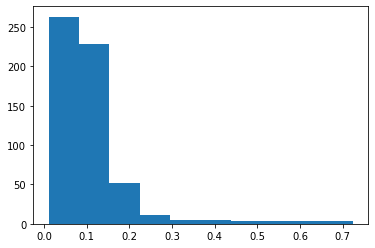

------
KLB
------


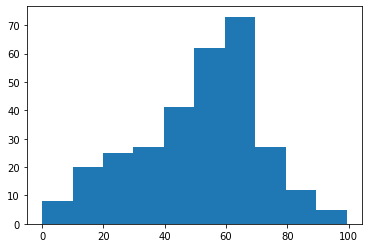

------
20topicsnews_lem_2
------
Количетсво тем: 24
------
Решения: (0, 2)
------
Jaccar
------


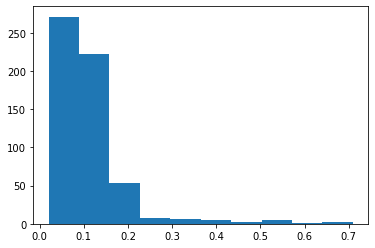

------
KLB
------


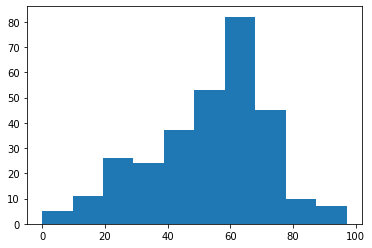

------
20topicsnews_lem_2
------
Количетсво тем: 24
------
Решения: (1, 2)
------
Jaccar
------


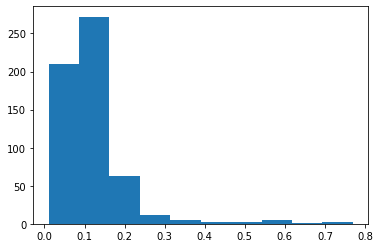

------
KLB
------


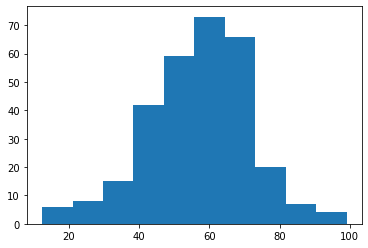

------
20topicsnews_lem_2
------
Количетсво тем: 26
------
Решения: (0, 1)
------
Jaccar
------


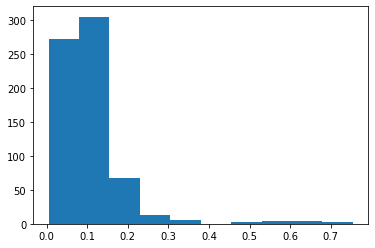

------
KLB
------


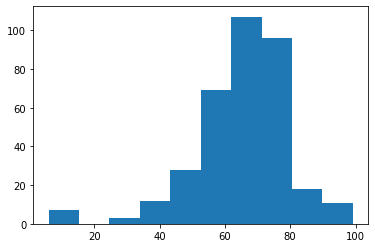

------
20topicsnews_lem_2
------
Количетсво тем: 26
------
Решения: (0, 2)
------
Jaccar
------


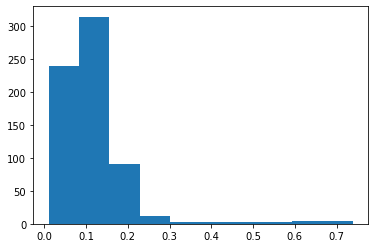

------
KLB
------


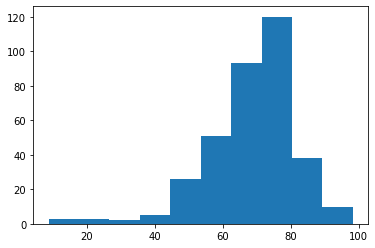

------
20topicsnews_lem_2
------
Количетсво тем: 26
------
Решения: (1, 2)
------
Jaccar
------


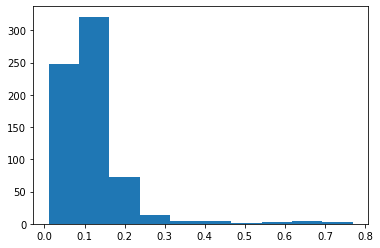

------
KLB
------


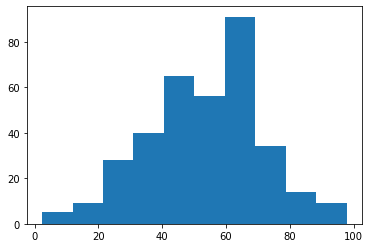

------
20topicsnews_lem_2
------
Количетсво тем: 28
------
Решения: (0, 1)
------
Jaccar
------


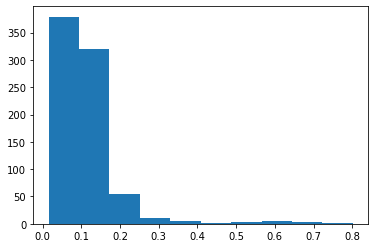

------
KLB
------


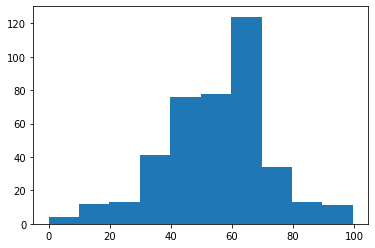

------
20topicsnews_lem_2
------
Количетсво тем: 28
------
Решения: (0, 2)
------
Jaccar
------


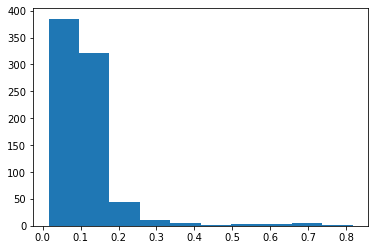

------
KLB
------


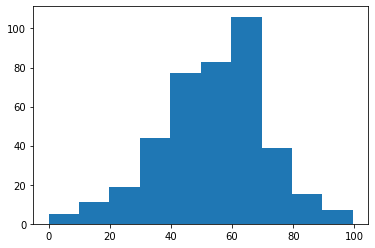

------
20topicsnews_lem_2
------
Количетсво тем: 28
------
Решения: (1, 2)
------
Jaccar
------


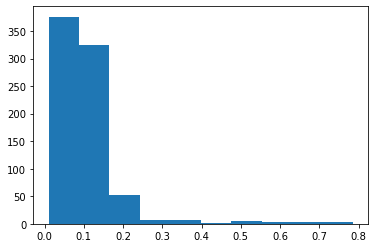

------
KLB
------


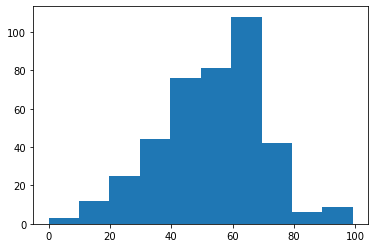

------
20topicsnews_lem_2
------
Количетсво тем: 30
------
Решения: (0, 1)
------
Jaccar
------


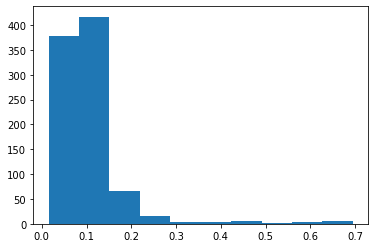

------
KLB
------


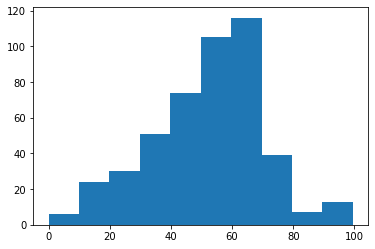

------
20topicsnews_lem_2
------
Количетсво тем: 30
------
Решения: (0, 2)
------
Jaccar
------


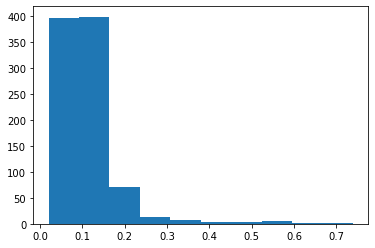

------
KLB
------


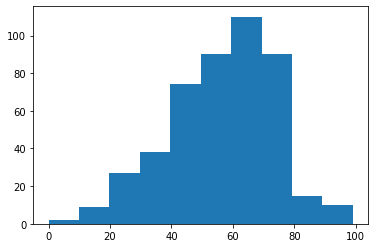

------
20topicsnews_lem_2
------
Количетсво тем: 30
------
Решения: (1, 2)
------
Jaccar
------


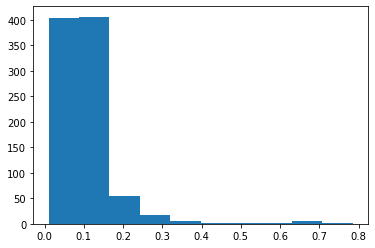

------
KLB
------


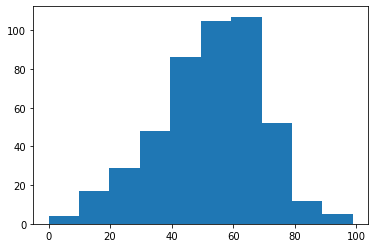

------
20topicsnews_lem_2
------
Количетсво тем: 32
------
Решения: (0, 1)
------
Jaccar
------


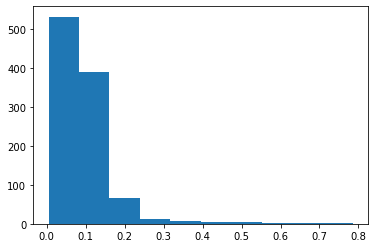

------
KLB
------


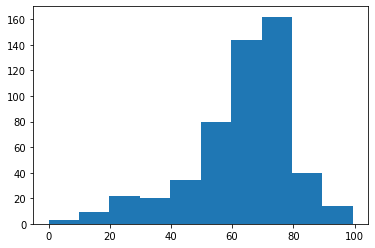

------
20topicsnews_lem_2
------
Количетсво тем: 32
------
Решения: (0, 2)
------
Jaccar
------


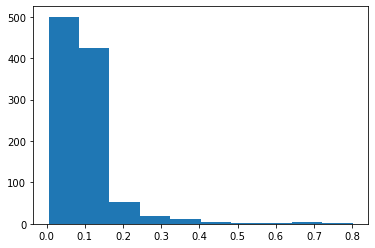

------
KLB
------


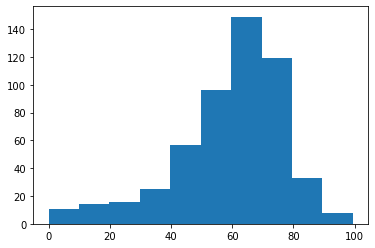

------
20topicsnews_lem_2
------
Количетсво тем: 32
------
Решения: (1, 2)
------
Jaccar
------


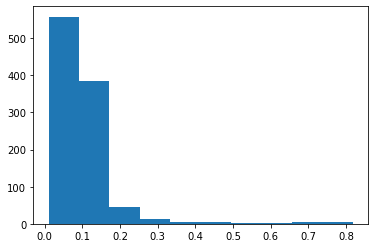

------
KLB
------


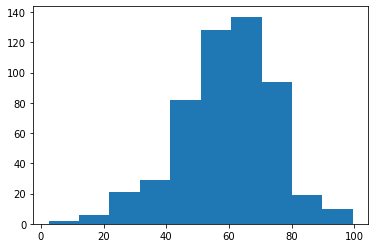

------
20topicsnews_lem_2
------
Количетсво тем: 34
------
Решения: (0, 1)
------
Jaccar
------


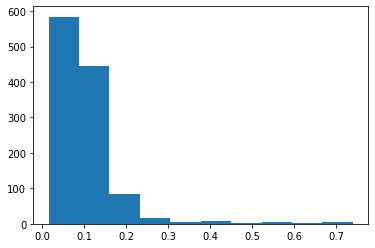

------
KLB
------


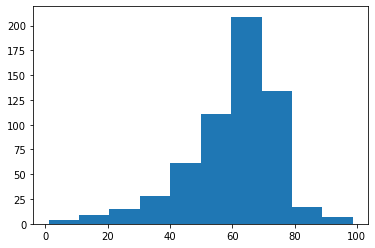

------
20topicsnews_lem_2
------
Количетсво тем: 34
------
Решения: (0, 2)
------
Jaccar
------


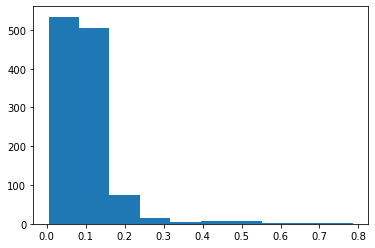

------
KLB
------


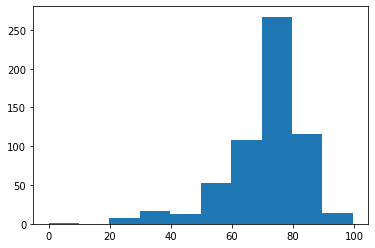

------
20topicsnews_lem_2
------
Количетсво тем: 34
------
Решения: (1, 2)
------
Jaccar
------


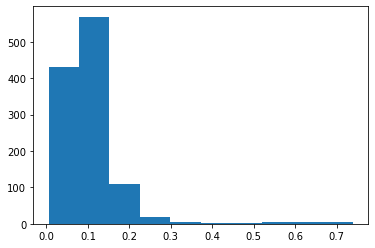

------
KLB
------


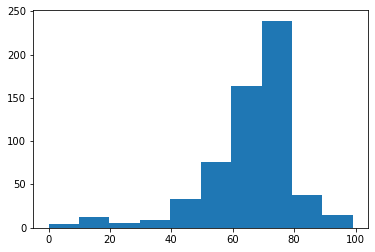

------
20topicsnews_lem_2
------
Количетсво тем: 36
------
Решения: (0, 1)
------
Jaccar
------


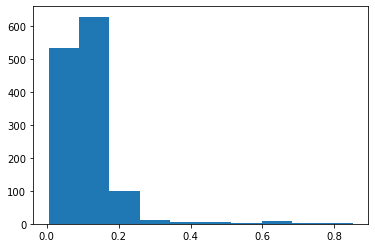

------
KLB
------


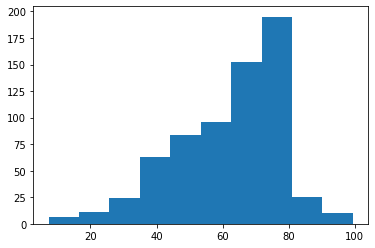

------
20topicsnews_lem_2
------
Количетсво тем: 36
------
Решения: (0, 2)
------
Jaccar
------


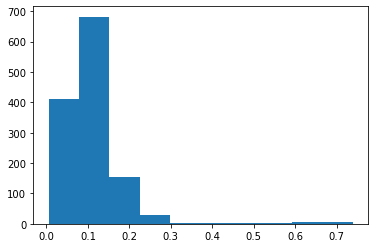

------
KLB
------


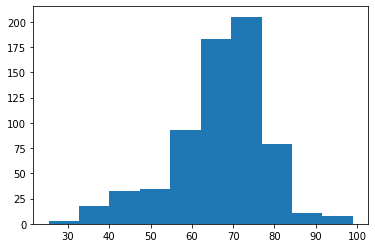

------
20topicsnews_lem_2
------
Количетсво тем: 36
------
Решения: (1, 2)
------
Jaccar
------


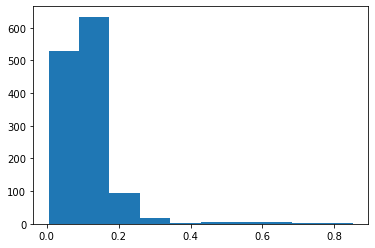

------
KLB
------


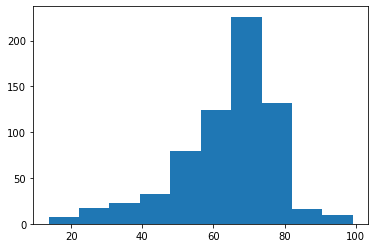

------
20topicsnews_lem_2
------
Количетсво тем: 38
------
Решения: (0, 1)
------
Jaccar
------


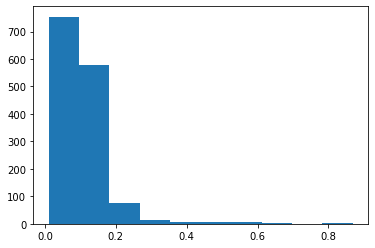

------
KLB
------


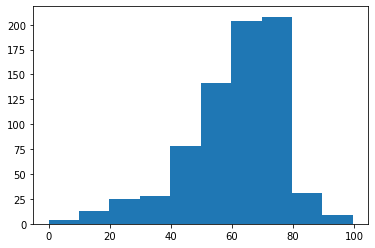

------
20topicsnews_lem_2
------
Количетсво тем: 38
------
Решения: (0, 2)
------
Jaccar
------


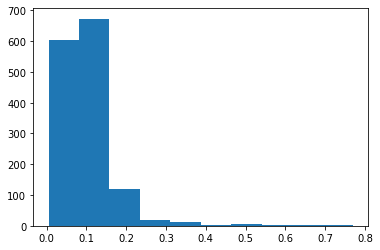

------
KLB
------


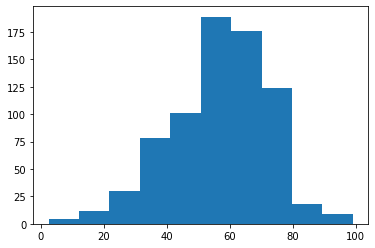

------
20topicsnews_lem_2
------
Количетсво тем: 38
------
Решения: (1, 2)
------
Jaccar
------


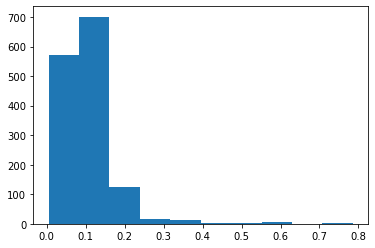

------
KLB
------


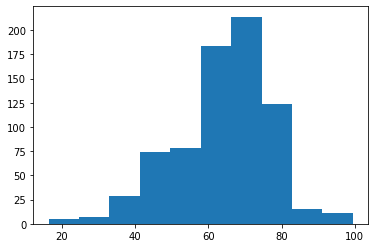

------
20topicsnews_lem_2
------
Количетсво тем: 40
------
Решения: (0, 1)
------
Jaccar
------


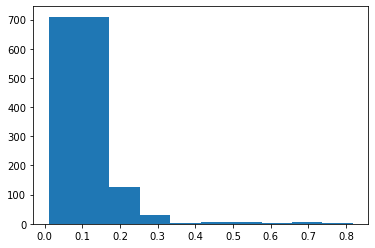

------
KLB
------


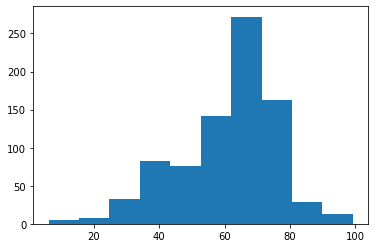

------
20topicsnews_lem_2
------
Количетсво тем: 40
------
Решения: (0, 2)
------
Jaccar
------


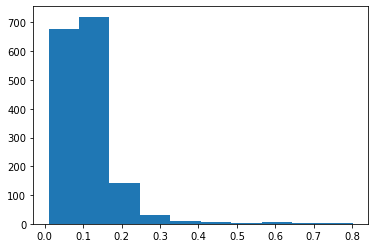

------
KLB
------


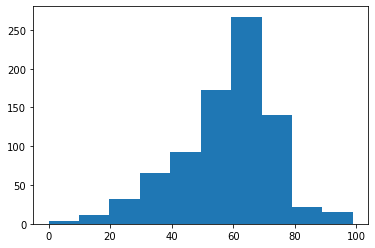

------
20topicsnews_lem_2
------
Количетсво тем: 40
------
Решения: (1, 2)
------
Jaccar
------


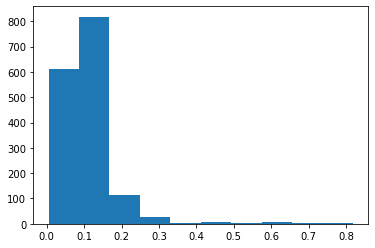

------
KLB
------


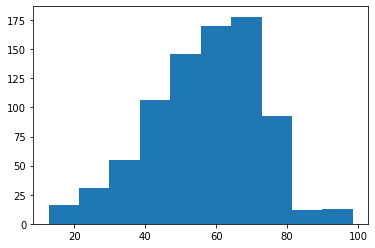

------
20topicsnews_lem_2
------
Количетсво тем: 42
------
Решения: (0, 1)
------
Jaccar
------


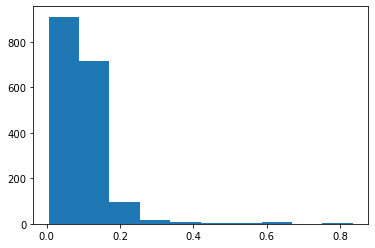

------
KLB
------


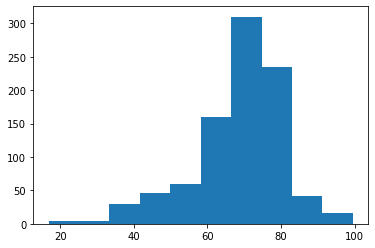

------
20topicsnews_lem_2
------
Количетсво тем: 42
------
Решения: (0, 2)
------
Jaccar
------


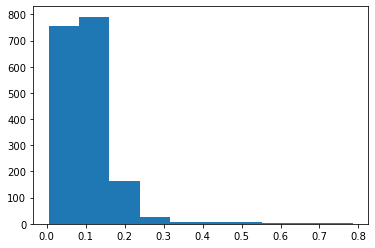

------
KLB
------


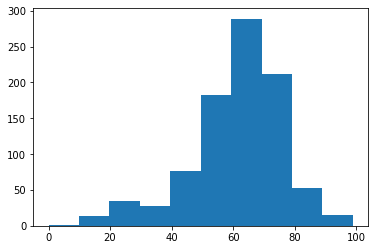

------
20topicsnews_lem_2
------
Количетсво тем: 42
------
Решения: (1, 2)
------
Jaccar
------


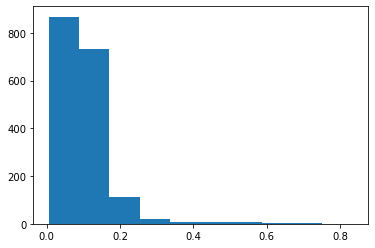

------
KLB
------


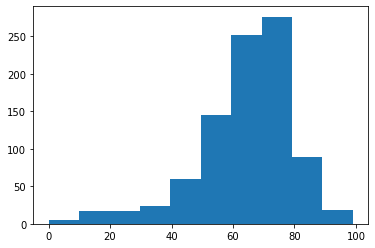

------
20topicsnews_lem_2
------
Количетсво тем: 44
------
Решения: (0, 1)
------
Jaccar
------


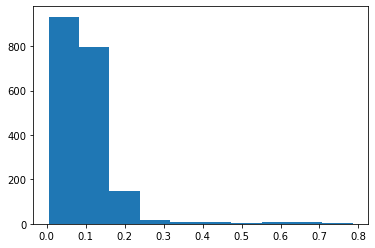

------
KLB
------


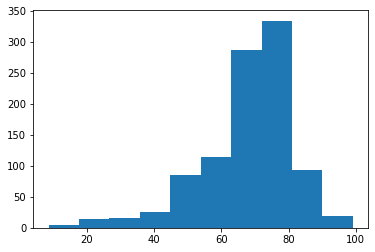

------
20topicsnews_lem_2
------
Количетсво тем: 44
------
Решения: (0, 2)
------
Jaccar
------


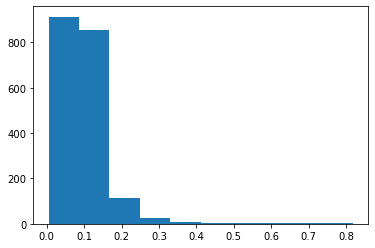

------
KLB
------


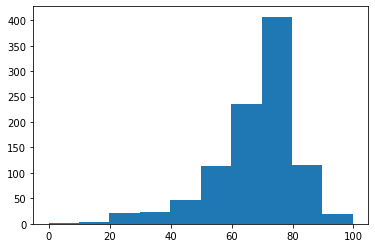

------
20topicsnews_lem_2
------
Количетсво тем: 44
------
Решения: (1, 2)
------
Jaccar
------


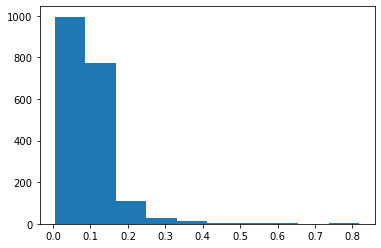

------
KLB
------


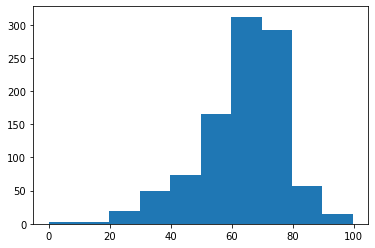

------
20topicsnews_lem_2
------
Количетсво тем: 46
------
Решения: (0, 1)
------
Jaccar
------


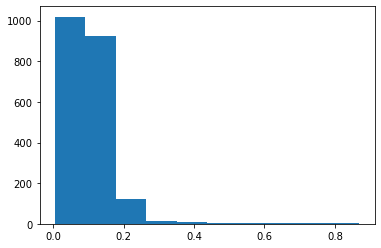

------
KLB
------


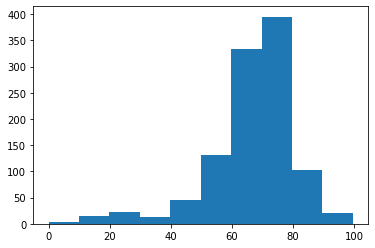

------
20topicsnews_lem_2
------
Количетсво тем: 46
------
Решения: (0, 2)
------
Jaccar
------


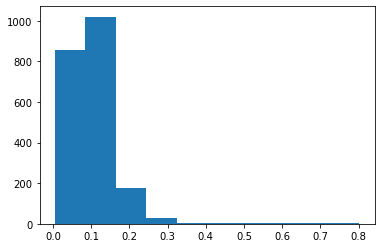

------
KLB
------


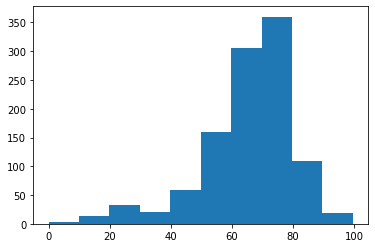

------
20topicsnews_lem_2
------
Количетсво тем: 46
------
Решения: (1, 2)
------
Jaccar
------


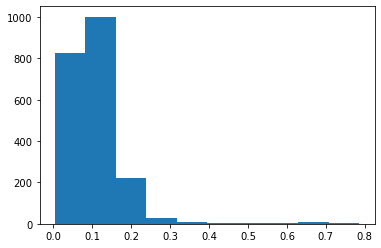

------
KLB
------


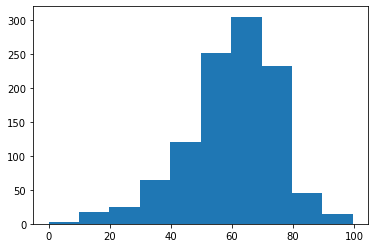

------
20topicsnews_lem_2
------
Количетсво тем: 48
------
Решения: (0, 1)
------
Jaccar
------


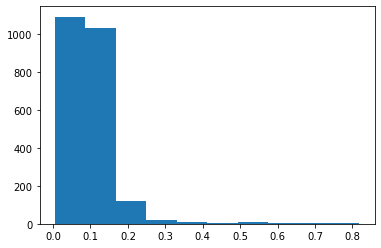

------
KLB
------


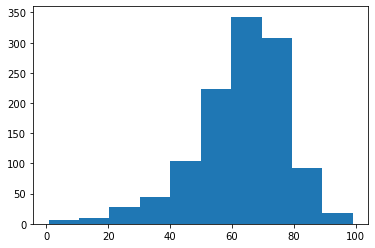

------
20topicsnews_lem_2
------
Количетсво тем: 48
------
Решения: (0, 2)
------
Jaccar
------


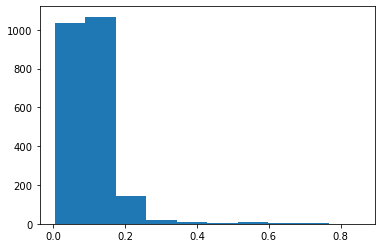

------
KLB
------


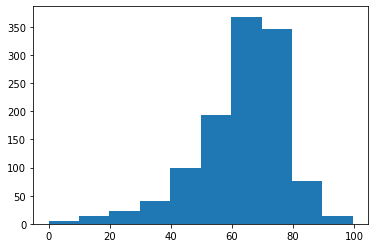

------
20topicsnews_lem_2
------
Количетсво тем: 48
------
Решения: (1, 2)
------
Jaccar
------


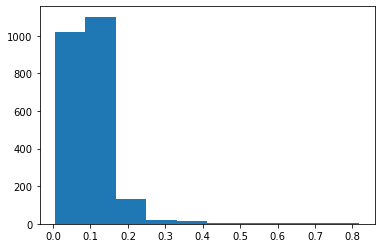

------
KLB
------


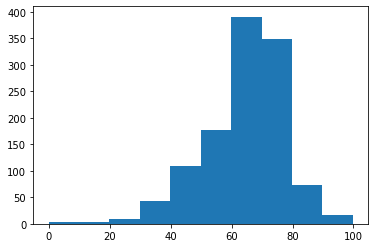

------


In [5]:
n=4 ### количество решений
sh=0.0001 ### срез маленьких по вероятности слов 
KLB_fresh=0 ### порог KLB
jac_fresh=0 ### порог жаккара

n=3
tasknames = ['lenta_lem_1', 'lenta_lem_2', '20topicsnews_lem_1', '20topicsnews_lem_2']

for taskname in tasknames:
    docSet = DocDataset(taskname,no_below=10,no_above=0.7,rebuild=False,use_tfidf=False)
    vocab = [i for i in docSet.dictionary.id2token.values()]
    for topic in range(2,50,2): ### поставить от 2 до 50
        dictionary = {}
        unique_words = []
        for index in range(1,n+1):
            model = torch.load('results/WTM-MMD/WTM-MMD_' + taskname + '_' + str(topic) + '_' + str(index))
            dictionary[index-1] = pd.DataFrame(model.get_topic_word_dist(), columns=vocab)
            dictionary[index-1] = dictionary[index-1].T
            dictionary[index-1] = stablize(dictionary[index-1],sh)
            unique_words.extend(list(dictionary[index-1].index))
            
        unique_words = sorted(np.unique(unique_words))
        #print('ok')
        for i in range(n):
            dictionary[i] = equalize(dictionary[i], dictionary[i].shape[1], sh)
            #print(len(dictionary[i])) ### проверяем на одинаковую длину
    
        dictionary_with_KLB = {}

        for i in range(n): 
            for j in range(n):
                #if j == i or i>j: если не нужна последняя матрица
                if j == i:   
                    continue
                else:
                    dictionary_with_KLB[(i, j)] = KLB(dictionary[i], dictionary[j])

        #print('ok')
        
        similar_solutions = get_similar_topic(n, KLB_fresh=KLB_fresh, jac_fresh=jac_fresh)
        similar_solutions_cutted = similar_solutions.iloc[:,0:4] #необязательно
        similar_solutions_cutted.sort_values('First_solution', 0, inplace=True) 
        all_similar_topics = get_stable_matrix(similar_solutions_cutted, sh)

In [43]:
similar_solutions

,First_solution,Second_solution,topic_from_first,topic_from_second,KLB,Jaccard_index
0,0,1,4,17,92.917303,0.342282
1,0,1,4,19,96.834141,0.612903
2,0,1,4,21,96.368066,0.526718
3,0,1,4,47,90.442679,0.315789
4,0,1,7,9,89.742131,0.379310
...,...,...,...,...,...,...
211,2,1,44,19,92.655622,0.369863
212,2,1,44,21,96.556231,0.562500
213,2,1,44,41,91.925444,0.379310
214,2,1,45,36,94.038203,0.369863


In [44]:
all_similar_topics

,Solution:Topic,Count,None_zero_words_in_first_topic
0,2:6__1:2__0:15,3,1523
1,0:20__2:36__1:16,3,87
2,1:37__2:24__0:31,3,951
3,0:4__1:17__2:44__2:23__2:18__1:47__1:21__1:19,8,1523
4,0:21__2:18__2:44__2:1__1:7__1:47__1:19,7,1420
...,...,...,...
93,1:12__2:46__0:37,3,1079
94,0:35__2:9,2,1722
95,0:15__2:6__1:2,3,1535
96,0:45__2:16__1:15,3,1250


In [45]:
print('Всего стабильных тем:', len(all_similar_topics))

Всего стабильных тем: 98


In [46]:
sp=np.zeros(n, dtype=int)

for i in all_similar_topics['Solution:Topic']:
    for j in range(n):
        if i[0]==str(j):
            sp[j] = sp[j]+1

In [47]:
for i in range(n):
    print(sp[i], 'стабильных тем в', i+1, 'решении')

33 стабильных тем в 1 решении
34 стабильных тем в 2 решении
31 стабильных тем в 3 решении
